
<center>
<table>
    <tr>
       <td>
           <img src="logo.png" width="200">
        </td>
        <td>
            <center> <font color = gray size=3> <b> Automotive industry company &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</b> </font> </center>
        </td>
    </tr>
</table> 
</center>

In [1]:
# import pandas, pd is an alias
import pandas as pd

# import numpy, np is an alias
import numpy as np

# import matplotlib.pyplot, plt is an alias
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

> # <font color=blue> 1. Data Sourcing </font>

> ## 1.1. Enter CSV Data File location

In [1]:
# Store file location
Location = "./"

#Store Datafile name in CSV File format
FileName = "CarPrice_Assignment.csv"

LocationCarPrice = Location + FileName
print("File '{0}' available in location '{1}' will be used as Data File".format(FileName,LocationCarPrice))

File 'CarPrice_Assignment.csv' available in location './CarPrice_Assignment.csv' will be used as Data File


> ## 1.2. Read CSV Data File

In [3]:
# Read Data File in CSV File Format
dfCarPrice = pd.read_csv(LocationCarPrice, sep=',', encoding = "utf-8")
dfCarPrice.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

> # <font color=blue> 2. Data Cleaning </font>

> ## 2.1 Fixing Rows and Columns

> <font color=Navy> <b> 
    The data file contains 205 Rows and 26 columns and there are no null values on each columns <br> &nbsp;&nbsp;&nbsp;&nbsp; 1. Treating missing values are not required <br> &nbsp;&nbsp;&nbsp;&nbsp; 2. Treating Null Values are not required
  </b></font>

In [4]:
dfCarPrice.shape

(205, 26)

In [5]:
dfCarPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

> ## 2.2 Column Split 

> <font color=Navy> <b> 
    Column CarCompany has been split into: <br> 
    &nbsp;&nbsp;&nbsp;&nbsp; 1. CarCompany <br> 
    &nbsp;&nbsp;&nbsp;&nbsp; 2. CarModel
  </b></font>

In [6]:
# Store CarCompany data into varaible CarCompany
CarCompany = dfCarPrice.CarName.str.split(' ',1).str[0]

# Store CarModel data into varaible CarModel
CarModel = dfCarPrice.CarName.str.split(' ',1).str[1]

# Add Column CarCompany and CarModel into dataset
dfCarPrice.insert(3,'CarCompany',CarCompany)
dfCarPrice.insert(4,'CarModel',CarModel)

dfCarPrice.head()

car_ID  symboling                   CarName   CarCompany      CarModel  \
0       1          3        alfa-romero giulia  alfa-romero        giulia   
1       2          3       alfa-romero stelvio  alfa-romero       stelvio   
2       3          1  alfa-romero Quadrifoglio  alfa-romero  Quadrifoglio   
3       4          2               audi 100 ls         audi        100 ls   
4       5          2                audi 100ls         audi         100ls   

  fueltype aspiration doornumber      carbody drivewheel  ... enginesize  \
0      gas        std        two  convertible        rwd  ...        130   
1      gas        std        two  convertible        rwd  ...        130   
2      gas        std        two    hatchback        rwd  ...        152   
3      gas        std       four        sedan        fwd  ...        109   
4      gas        std       four        sedan        4wd  ...        136   

   fuelsystem  boreratio  stroke  compressionratio  horsepower peakrpm  \
0        mpfi       3.47    2.68               9.0         111    5000   
1        mpfi       3.47    2.68               9.0         111    5000   
2        mpfi       2.68    3.47               9.0         154    5000   
3        mpfi       3.19    3.40              10.0         102    5500   
4        mpfi       3.19    3.40               8.0         115    5500   

  citympg  highwaympg    price  
0      21          27  13495.0  
1      21          27  16500.0  
2      19          26  16500.0  
3      24          30  13950.0  
4      18          22  17450.0  

[5 rows x 28 columns]

> ## 2.3 Convert incorrect data types

> <font color=Navy>
    Column CarModel has 100 ls two entry of same category has been converted in <b> from 100 ls to 100ls </b>
  </font>

In [7]:
dfCarPrice["CarModel"] = dfCarPrice.CarModel.str.replace("100 ls","100ls")
dfCarPrice["CarCompany"] = dfCarPrice.CarCompany.str.replace("porcshce","porsche")
dfCarPrice["CarCompany"] = dfCarPrice.CarCompany.str.replace("toyouta","toyota")
dfCarPrice["CarCompany"] = dfCarPrice.CarCompany.str.replace("vw","volkswagen")
dfCarPrice.head()

car_ID  symboling                   CarName   CarCompany      CarModel  \
0       1          3        alfa-romero giulia  alfa-romero        giulia   
1       2          3       alfa-romero stelvio  alfa-romero       stelvio   
2       3          1  alfa-romero Quadrifoglio  alfa-romero  Quadrifoglio   
3       4          2               audi 100 ls         audi         100ls   
4       5          2                audi 100ls         audi         100ls   

  fueltype aspiration doornumber      carbody drivewheel  ... enginesize  \
0      gas        std        two  convertible        rwd  ...        130   
1      gas        std        two  convertible        rwd  ...        130   
2      gas        std        two    hatchback        rwd  ...        152   
3      gas        std       four        sedan        fwd  ...        109   
4      gas        std       four        sedan        4wd  ...        136   

   fuelsystem  boreratio  stroke  compressionratio  horsepower peakrpm  \
0        mpfi       3.47    2.68               9.0         111    5000   
1        mpfi       3.47    2.68               9.0         111    5000   
2        mpfi       2.68    3.47               9.0         154    5000   
3        mpfi       3.19    3.40              10.0         102    5500   
4        mpfi       3.19    3.40               8.0         115    5500   

  citympg  highwaympg    price  
0      21          27  13495.0  
1      21          27  16500.0  
2      19          26  16500.0  
3      24          30  13950.0  
4      18          22  17450.0  

[5 rows x 28 columns]

> ## 2.4 Outliner

> <font color=Navy> <b> 
    2.4.1. CompressionRatio: <br> 
  </b></font>

CompressionRatio - Total Number of Records 205, Record count after removing outliner 185, Percentage record dropped 9.76%


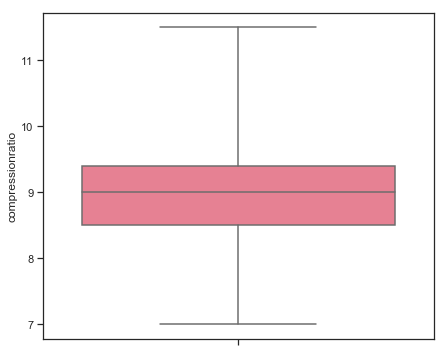

In [8]:
sns.set(style="ticks")
plt.subplots(figsize=(7, 6), sharex=True)
# Total record count of column
totalCount = dfCarPrice['compressionratio'].count()

sns.boxplot(y=dfCarPrice['compressionratio'],whis="range", palette="husl")
plt.show()

# Applying outliner condition and storing results in new dataset
dfCarPrice=dfCarPrice[dfCarPrice['compressionratio']<21]

# Total record count after removing outliner
removeCount = dfCarPrice['compressionratio'].count()

# Dropped records Percentage Calcualtion
perCalc=0
perCalc = round(100*(1- removeCount/totalCount),2)
print("CompressionRatio - Total Number of Records {0}, Record count after removing outliner {1}, Percentage record dropped {2}%".format(totalCount, removeCount, perCalc))

#Box Plot
plt.subplots(figsize=(7, 6), sharex=True)
sns.boxplot(y=dfCarPrice['compressionratio'],whis="range", palette="husl")
plt.show()

> <font color=Navy> <b> 
    2.4.2. Horsepower: <br> 
  </b></font>

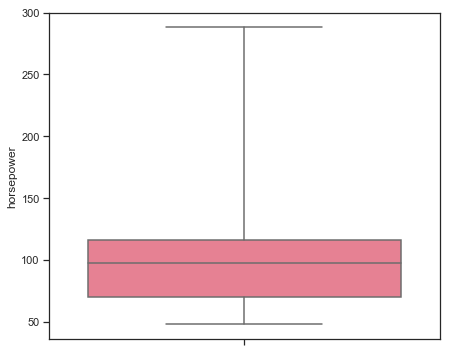

HorsePower - Total Number of Records 185, Record count after removing outliner 183, Percentage record dropped 1.08%


In [9]:
sns.set(style="ticks")
plt.subplots(figsize=(7, 6), sharex=True)
# Total record count of column
totalCount = dfCarPrice['horsepower'].count()

sns.boxplot(y=dfCarPrice['horsepower'],whis="range", palette="husl")
plt.show()

# Applying outliner condition and storing results in new dataset
dfCarPrice=dfCarPrice[dfCarPrice['horsepower']<250]

# Total record count after removing outliner
removeCount = dfCarPrice['horsepower'].count()

# Dropped records Percentage Calcualtion
perCalc=0
perCalc = round(100*(1- removeCount/totalCount),2)
print("HorsePower - Total Number of Records {0}, Record count after removing outliner {1}, Percentage record dropped {2}%".format(totalCount, removeCount, perCalc))

#Box Plot
plt.subplots(figsize=(7, 6), sharex=True)
sns.boxplot(y=dfCarPrice['horsepower'],whis="range", palette="husl")
plt.show()

In [10]:
dfCarPrice.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  183.000000  183.000000  183.000000  183.000000  183.000000  183.000000   
mean   100.672131    0.918033   98.125137  173.073770   65.680874   53.544262   
std     59.998458    1.253063    5.636656   12.134085    1.994282    2.374697   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   48.800000   
25%     46.500000    0.000000   94.500000  166.300000   64.000000   51.600000   
50%    100.000000    1.000000   96.500000  172.400000   65.400000   53.700000   
75%    151.500000    2.000000  100.400000  178.450000   66.500000   55.450000   
max    205.000000    3.000000  120.900000  208.100000   72.000000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   183.000000  183.000000  183.000000  183.000000        183.000000   
mean   2506.005464  124.442623    3.320383    3.233770          8.839454   
std     488.258922   39.646595    0.266696    0.318173          0.660159   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2125.000000   97.000000    3.150000    3.100000          8.500000   
50%    2403.000000  110.000000    3.310000    3.255000          9.000000   
75%    2838.500000  140.500000    3.580000    3.400000          9.400000   
max    4066.000000  308.000000    3.940000    4.170000         10.100000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  183.000000   183.000000  183.000000  183.000000    183.000000  
mean   104.398907  5197.814208   24.775956   30.404372  12773.563754  
std     36.291697   434.906367    6.259856    6.513754   7722.232889  
min     48.000000  4200.000000   14.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7649.000000  
50%     97.000000  5200.000000   24.000000   30.000000   9988.000000  
75%    116.000000  5500.000000   30.000000   34.000000  15867.500000  
max    207.000000  6600.000000   49.000000   54.000000  45400.000000

> # <font color=blue> 3. Univariate Analysis </font>

> ## 3.1 DataSet Metadata prepration

In [11]:
# research each columns in dataframe datatype
print(dfCarPrice.shape)

print("-" * 98)
print("| Column Name".ljust(20), '|', "Data Type", '|', "Null count", '\t','|', "Unique Record count", '\t','|', 
      "Sample Unique Records |")
print("-" * 98)

for col in dfCarPrice: 
    
    # for each column store unique recores in list x
    x=dfCarPrice[col].unique().tolist() 
    
    # Print Column name, Data Type, Null record count, Unique Record count and first 10 unique records 
    print("|",col.ljust(18), '|', dfCarPrice[col].dtypes, '\t','|', dfCarPrice[col].isnull().sum(), '\t\t','|', 
          dfCarPrice[col].nunique(), '\t\t\t','|', x[0:5])


(183, 28)
--------------------------------------------------------------------------------------------------
| Column Name        | Data Type | Null count 	 | Unique Record count 	 | Sample Unique Records |
--------------------------------------------------------------------------------------------------
| car_ID             | int64 	 | 0 		 | 183 			 | [1, 2, 3, 4, 5]
| symboling          | int64 	 | 0 		 | 6 			 | [3, 1, 2, 0, -1]
| CarName            | object 	 | 0 		 | 133 			 | ['alfa-romero giulia', 'alfa-romero stelvio', 'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls']
| CarCompany         | object 	 | 0 		 | 24 			 | ['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge']
| CarModel           | object 	 | 2 		 | 127 			 | ['giulia', 'stelvio', 'Quadrifoglio', '100ls', 'fox']
| fueltype           | object 	 | 0 		 | 1 			 | ['gas']
| aspiration         | object 	 | 0 		 | 2 			 | ['std', 'turbo']
| doornumber         | object 	 | 0 		 | 2 			 | ['two', 'four']
| carbody    

> ## 3.2 Categorical Variable

> <font color=Navy>
    <b> Unordered Categorical Variables: </b><br>
    &nbsp;&nbsp;&nbsp;&nbsp; 1. CarCompany <br> 
    &nbsp;&nbsp;&nbsp;&nbsp; 2. CarModel <br> 
    &nbsp;&nbsp;&nbsp;&nbsp; 3. fueltype <br> 
    &nbsp;&nbsp;&nbsp;&nbsp; 4. aspiration <br> 
    &nbsp;&nbsp;&nbsp;&nbsp; 5. doornumber <br> 
    &nbsp;&nbsp;&nbsp;&nbsp; 6. carbody <br> 
    &nbsp;&nbsp;&nbsp;&nbsp; 7. drivewheel <br> 
    &nbsp;&nbsp;&nbsp;&nbsp; 8. enginelocation <br> 
    &nbsp;&nbsp;&nbsp;&nbsp; 9. enginetype <br> 
    &nbsp;&nbsp;&nbsp;&nbsp; 10. cylindernumber <br> 
    &nbsp;&nbsp;&nbsp;&nbsp; 11. fuelsystem <br> 
    
  </font>

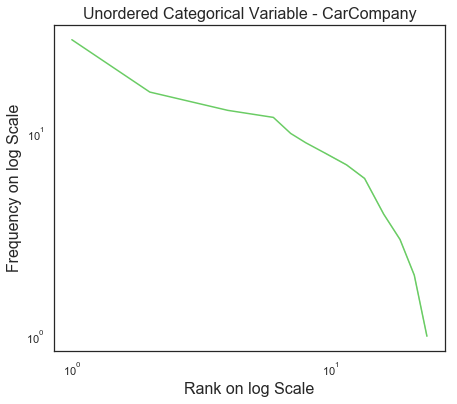

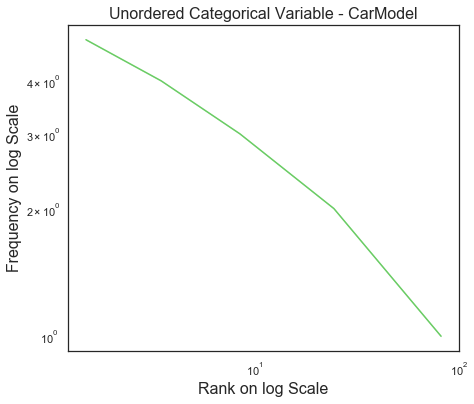

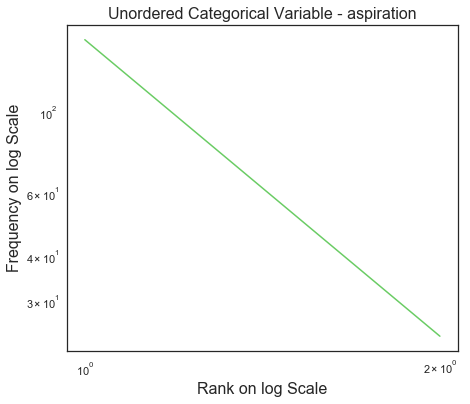

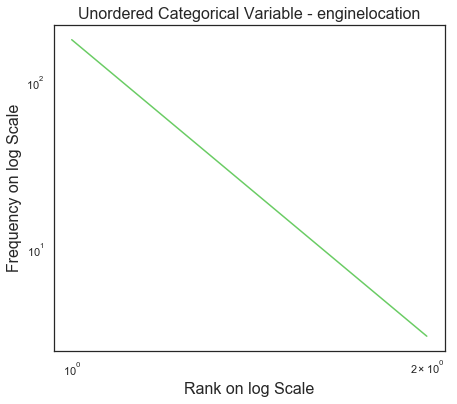

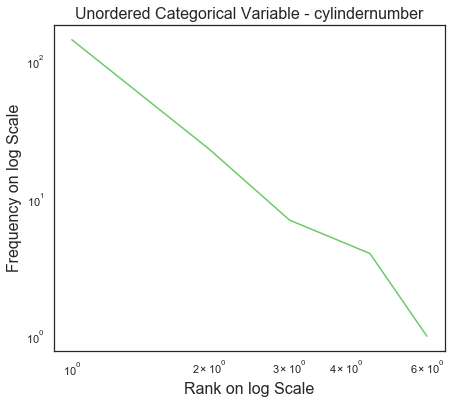

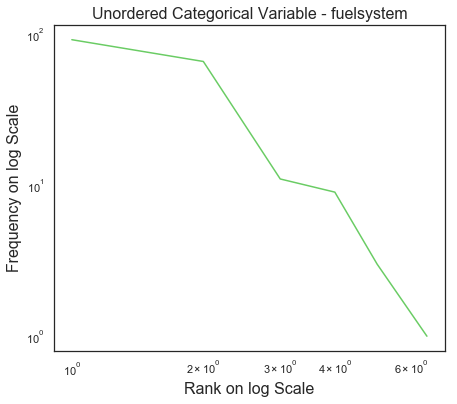

In [12]:
#Unordered Categorical Variables
unOrdered = ['CarCompany','CarModel','aspiration','doornumber','carbody','drivewheel',
             'enginelocation','enginetype','cylindernumber','fuelsystem']

# Set Graph background white
sns.set(style="white", palette="muted", color_codes=True)

for cols in unOrdered:
    # plotting X and Y axis
    plt.subplots(figsize=(7, 6), sharex=True)
    s = sns.lineplot(x=dfCarPrice[cols].value_counts().rank(ascending=False).sort_values(ascending=True), 
                     y=dfCarPrice[cols].value_counts().sort_values(ascending=False), markers=True, dashes=False, 
                     data=dfCarPrice, color="g")
    
    #setting Scale as Log
    s.set_xscale('log')
    s.set_yscale('log')
    
    # Providing Label
    plt.xlabel('Rank on log Scale', fontsize=16)
    plt.ylabel('Frequency on log Scale', fontsize=16)
    plt.title("Unordered Categorical Variable - "+ cols, fontsize=16)
    plt.show()
    

> <font color=Navy>
    <b> Variable distributed Bin Creation: </b> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; 1. wheelbase <br> 
    &nbsp;&nbsp;&nbsp;&nbsp; 2. carlength <br> 
    &nbsp;&nbsp;&nbsp;&nbsp; 3. carwidth <br> 
    &nbsp;&nbsp;&nbsp;&nbsp; 4. carheight <br> 
    &nbsp;&nbsp;&nbsp;&nbsp; 5. curbweight <br> 
    &nbsp;&nbsp;&nbsp;&nbsp; 6. enginesize <br> 
    &nbsp;&nbsp;&nbsp;&nbsp; 7. boreratio <br> 
    &nbsp;&nbsp;&nbsp;&nbsp; 8. stroke <br> 
    &nbsp;&nbsp;&nbsp;&nbsp; 9. compressionratio <br> 
    &nbsp;&nbsp;&nbsp;&nbsp; 10. horsepower <br> 
    &nbsp;&nbsp;&nbsp;&nbsp; 11. peakrpm <br> 
    &nbsp;&nbsp;&nbsp;&nbsp; 12. citympg <br> 
    &nbsp;&nbsp;&nbsp;&nbsp; 13. highwaympg <br> 
  </font>

wheelbase


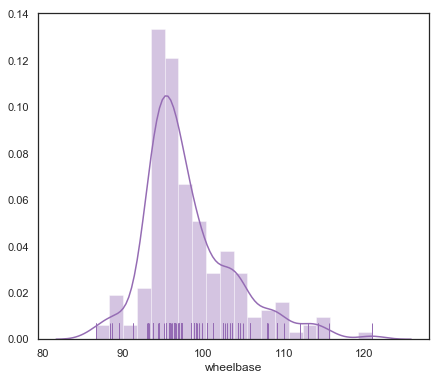

carlength


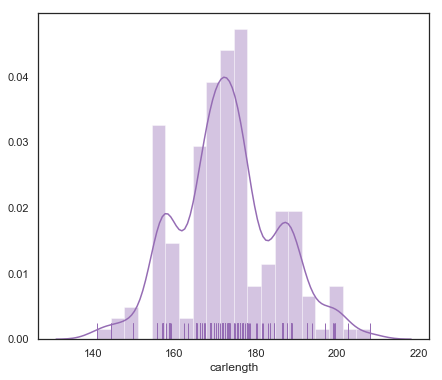

carwidth


carheight


curbweight


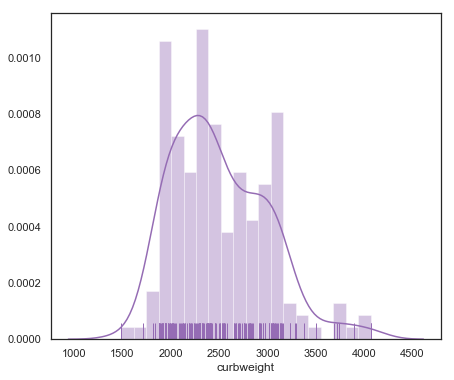

enginesize


boreratio


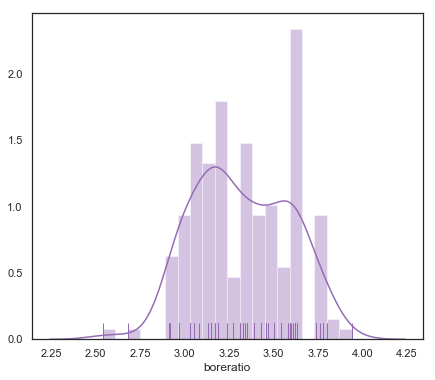

stroke


compressionratio


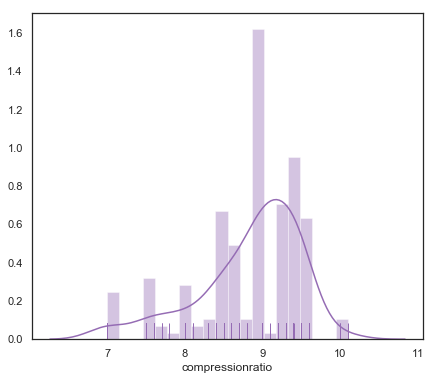

horsepower


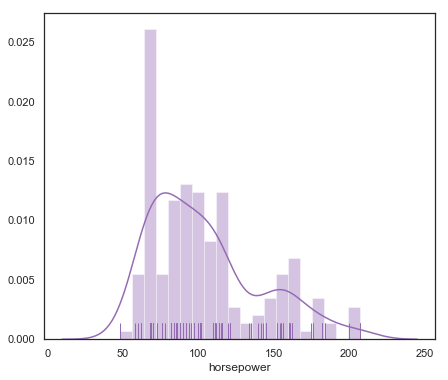

peakrpm


citympg


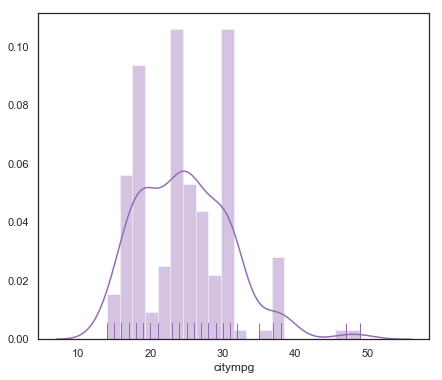

highwaympg


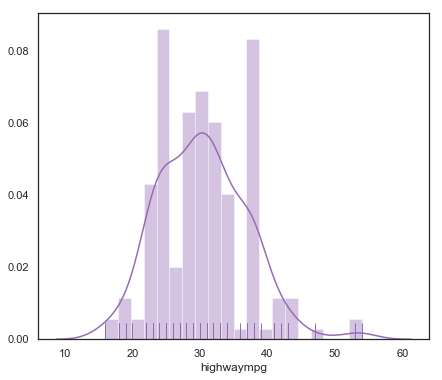

In [13]:
# creating list of cols required Bin
bincols = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke',
           'compressionratio','horsepower','peakrpm','citympg','highwaympg']

# Histrogram chart in loop
for col in bincols:
    print(col)
    plt.subplots(figsize=(7, 6), sharex=True)
    sns.distplot(dfCarPrice[col], color="m",  kde=True, rug=True, bins=20)
    plt.show()
    
    

> <font color=Navy>
    <b> Ordered Categorical Variables: </b> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; 1. symboling <br> 
    <br>
    Categorical: -3 that it is probably pretty safe not available  
  </font>

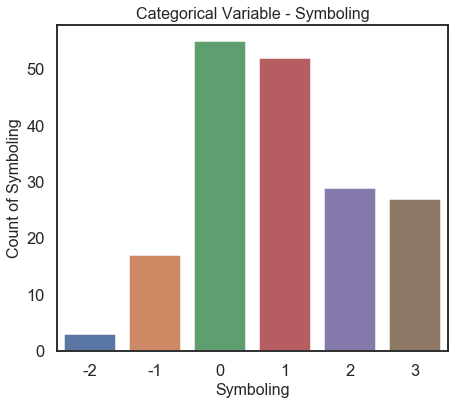

In [14]:
# Set Graph background white
sns.set(style="white", context="talk", palette="deep", color_codes=True)

# plotting X and Y axis
plt.subplots(figsize=(7, 6), sharex=True)
sns.countplot(x=dfCarPrice["symboling"], data=dfCarPrice)


# Providing Label
plt.xlabel('Symboling', fontsize=16)
plt.ylabel('Count of Symboling', fontsize=16)
plt.title("Categorical Variable - Symboling", fontsize=16)
plt.show()

> # <font color=blue> 4. Segmented Univariate Analysis </font>

> <font color=Navy>
    <b> Segmented Univariate Variable Analysis: </b> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; 1. fueltype <br>
    &nbsp;&nbsp;&nbsp;&nbsp; 2. aspiration <br>
    &nbsp;&nbsp;&nbsp;&nbsp; 3. doornumber <br>
    &nbsp;&nbsp;&nbsp;&nbsp; 4. carbody <br>
    &nbsp;&nbsp;&nbsp;&nbsp; 5. drivewheel <br>
    &nbsp;&nbsp;&nbsp;&nbsp; 6. enginelocation <br>
    &nbsp;&nbsp;&nbsp;&nbsp; 7. enginetype <br>
    &nbsp;&nbsp;&nbsp;&nbsp; 8. cylindernumber <br>
    &nbsp;&nbsp;&nbsp;&nbsp; 9. fuelsystem <br>
    &nbsp;&nbsp;&nbsp;&nbsp; 10. symboling <br>
  </font>

fueltype


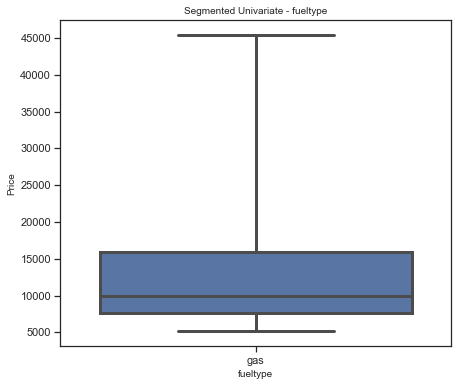

aspiration


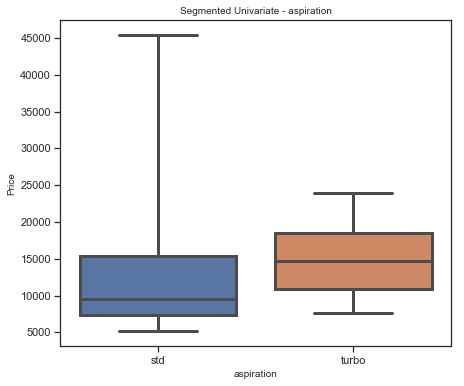

doornumber


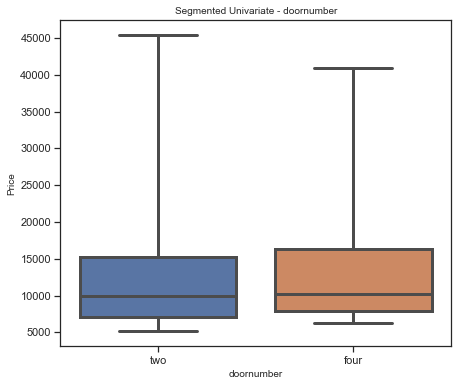

carbody


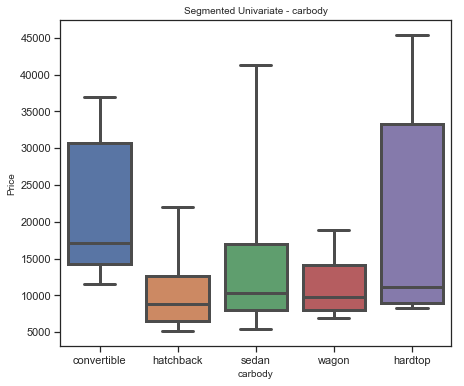

drivewheel


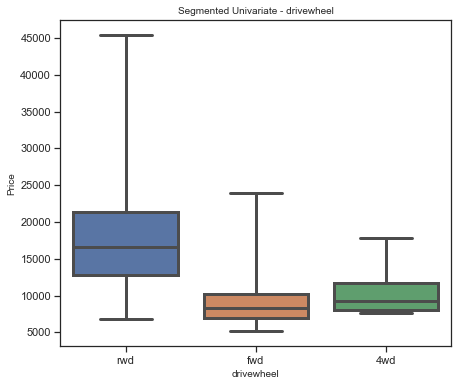

enginelocation


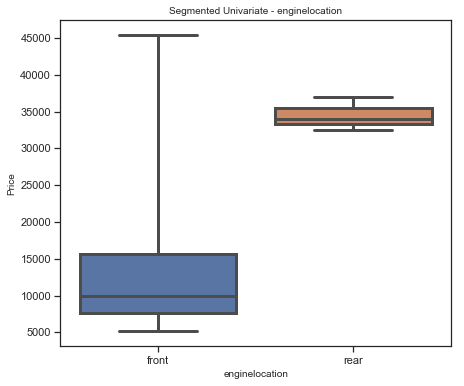

enginetype


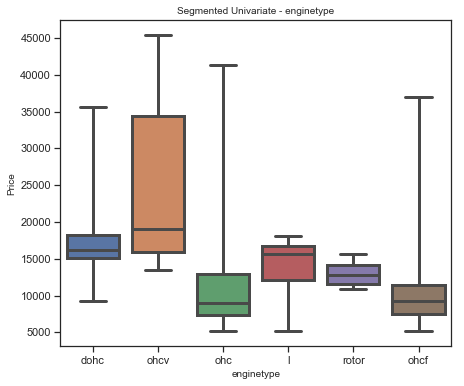

cylindernumber


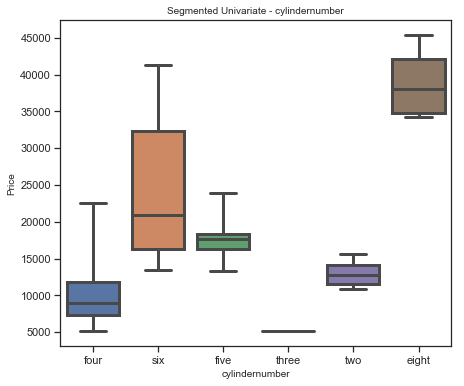

fuelsystem


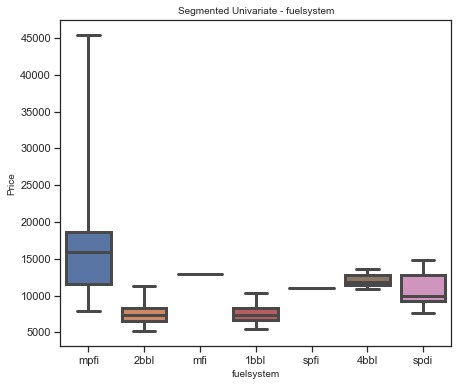

symboling


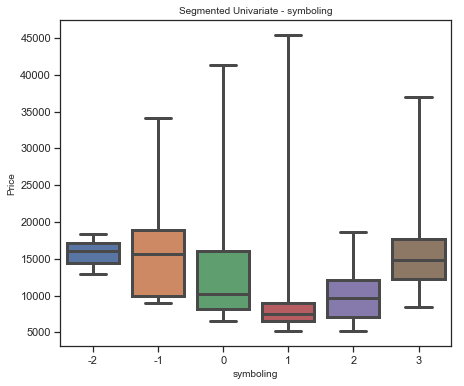

In [15]:
#Creating list of Segmented Variables
segmented = ['fueltype','aspiration','doornumber','carbody','drivewheel',
             'enginelocation','enginetype','cylindernumber','fuelsystem','symboling']

#Box Plot
sns.set(style="ticks", rc={"axes.labelsize":10})
for col in segmented:
    print(col)
    plt.subplots(figsize=(7, 6))
    sns.boxplot(x=dfCarPrice[col], y=dfCarPrice['price'].sort_values(ascending=False), whis="range", 
                color="y", linewidth=3, palette="deep")
    plt.ylabel('Price', fontsize=10)
    plt.title("Segmented Univariate - "+col, fontsize=10)
    plt.show()


> # <font color=blue> 5. Bivariate Analysis </font>

> ## 5.1. Continous Variable

In [16]:
# create list of Bivariate continous variable list
continousVariable = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize',
             'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

#check Correlation relationship between Continous variable list
dfCarPrice[continousVariable].corr()


symboling  wheelbase  carlength  carwidth  carheight  \
symboling          1.000000  -0.498664  -0.309761 -0.159378  -0.556969   
wheelbase         -0.498664   1.000000   0.862396  0.793683   0.562020   
carlength         -0.309761   0.862396   1.000000  0.844243   0.473176   
carwidth          -0.159378   0.793683   0.844243  1.000000   0.268395   
carheight         -0.556969   0.562020   0.473176  0.268395   1.000000   
curbweight        -0.147856   0.749365   0.872474  0.842801   0.277949   
enginesize        -0.045164   0.581486   0.689482  0.719373   0.106175   
boreratio         -0.088032   0.467365   0.604289  0.533104   0.165670   
stroke             0.046809   0.076983   0.078806  0.147191  -0.175362   
compressionratio   0.061850  -0.290984  -0.305552 -0.358677  -0.014302   
horsepower         0.101247   0.430612   0.626949  0.661359  -0.015322   
peakrpm            0.200811  -0.231689  -0.197596 -0.127509  -0.211781   
citympg           -0.049986  -0.558265  -0.754981 -0.721361  -0.135091   
highwaympg         0.000044  -0.603890  -0.764794 -0.747722  -0.169463   
price             -0.004781   0.564337   0.675016  0.723283   0.132937   

                  curbweight  enginesize  boreratio    stroke  \
symboling          -0.147856   -0.045164  -0.088032  0.046809   
wheelbase           0.749365    0.581486   0.467365  0.076983   
carlength           0.872474    0.689482   0.604289  0.078806   
carwidth            0.842801    0.719373   0.533104  0.147191   
carheight           0.277949    0.106175   0.165670 -0.175362   
curbweight          1.000000    0.852001   0.633404  0.131494   
enginesize          0.852001    1.000000   0.573697  0.237009   
boreratio           0.633404    0.573697   1.000000 -0.091517   
stroke              0.131494    0.237009  -0.091517  1.000000   
compressionratio   -0.420362   -0.333613  -0.247792 -0.278011   
horsepower          0.820221    0.821126   0.585843  0.171028   
peakrpm            -0.172894   -0.245742  -0.245471  0.068059   
citympg            -0.847796   -0.680550  -0.602492 -0.111838   
highwaympg         -0.870605   -0.702977  -0.603912 -0.093954   
price               0.822568    0.870022   0.541253  0.061696   

                  compressionratio  horsepower   peakrpm   citympg  \
symboling                 0.061850    0.101247  0.200811 -0.049986   
wheelbase                -0.290984    0.430612 -0.231689 -0.558265   
carlength                -0.305552    0.626949 -0.197596 -0.754981   
carwidth                 -0.358677    0.661359 -0.127509 -0.721361   
carheight                -0.014302   -0.015322 -0.211781 -0.135091   
curbweight               -0.420362    0.820221 -0.172894 -0.847796   
enginesize               -0.333613    0.821126 -0.245742 -0.680550   
boreratio                -0.247792    0.585843 -0.245471 -0.602492   
stroke                   -0.278011    0.171028  0.068059 -0.111838   
compressionratio          1.000000   -0.401426  0.189064  0.485162   
horsepower               -0.401426    1.000000  0.068495 -0.817707   
peakrpm                   0.189064    0.068495  1.000000 -0.023289   
citympg                   0.485162   -0.817707 -0.023289  1.000000   
highwaympg                0.495477   -0.806284  0.000217  0.977429   
price                    -0.280364    0.835615 -0.030011 -0.721022   

                  highwaympg     price  
symboling           0.000044 -0.004781  
wheelbase          -0.603890  0.564337  
carlength          -0.764794  0.675016  
carwidth           -0.747722  0.723283  
carheight          -0.169463  0.132937  
curbweight         -0.870605  0.822568  
enginesize         -0.702977  0.870022  
boreratio          -0.603912  0.541253  
stroke             -0.093954  0.061696  
compressionratio    0.495477 -0.280364  
horsepower         -0.806284  0.835615  
peakrpm             0.000217 -0.030011  
citympg             0.977429 -0.721022  
highwaympg          1.000000 -0.729535  
price              -0.729535  1.000000

In [17]:
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(round(dfCarPrice[continousVariable].corr(),2),cmap="vlag", annot=True, linewidths=.5, ax=ax)
plt.show()

> ## 5.2. Categorical Variable

> <font color=Navy>
    <b> 5.2.1. FuelType correlation with other categorical variable </b> <br>
  </font>

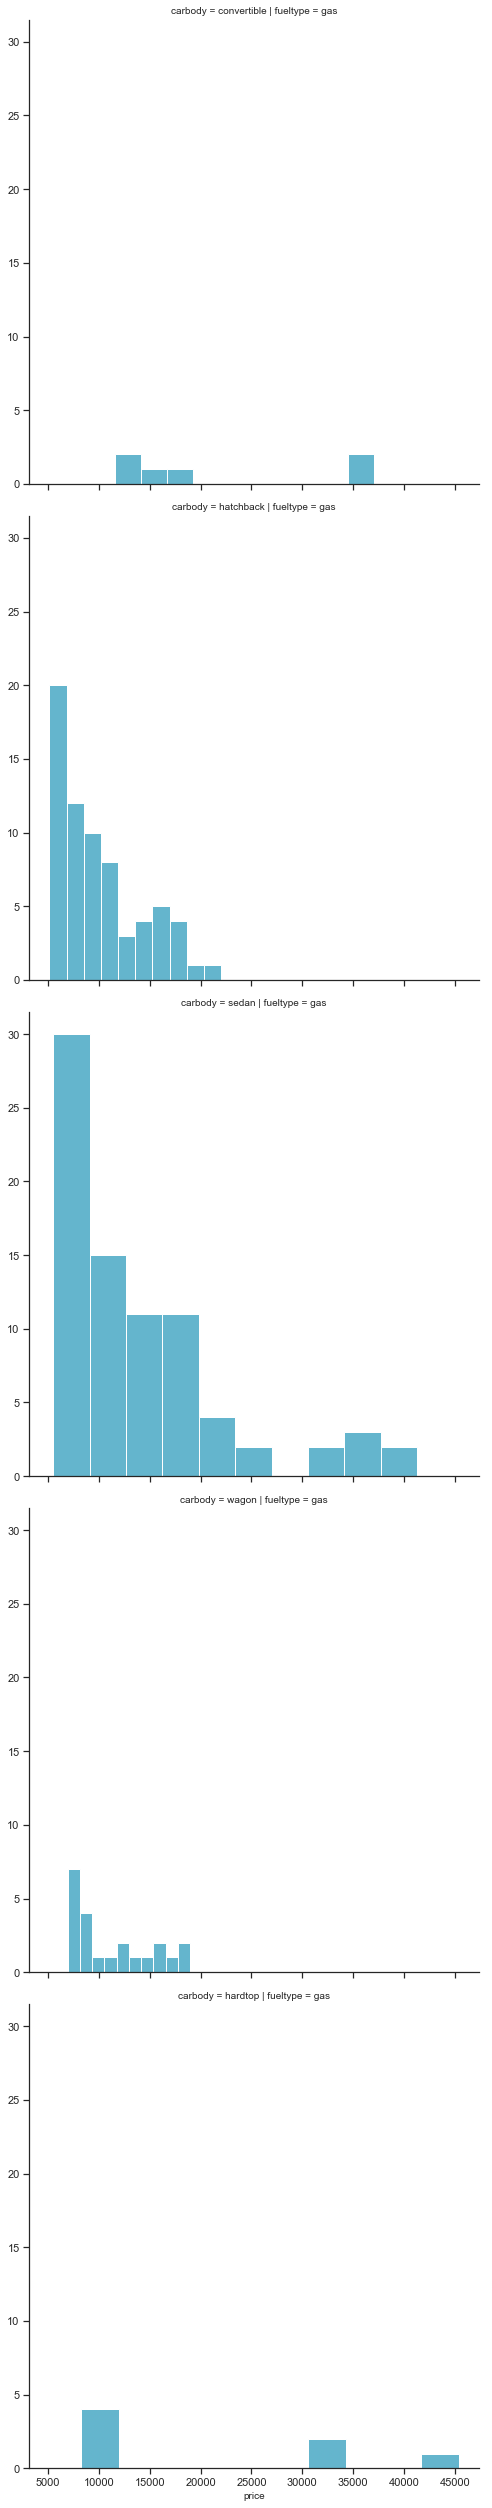

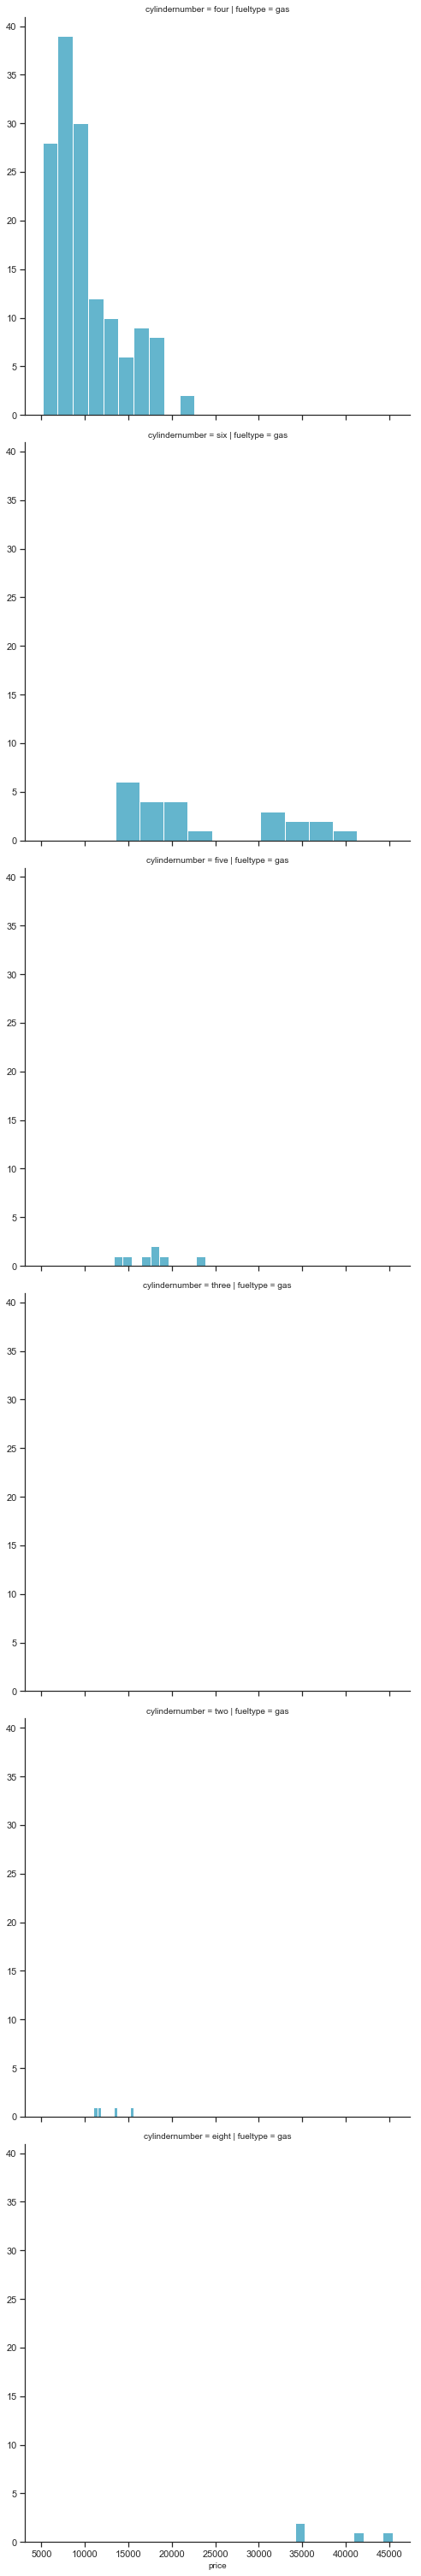

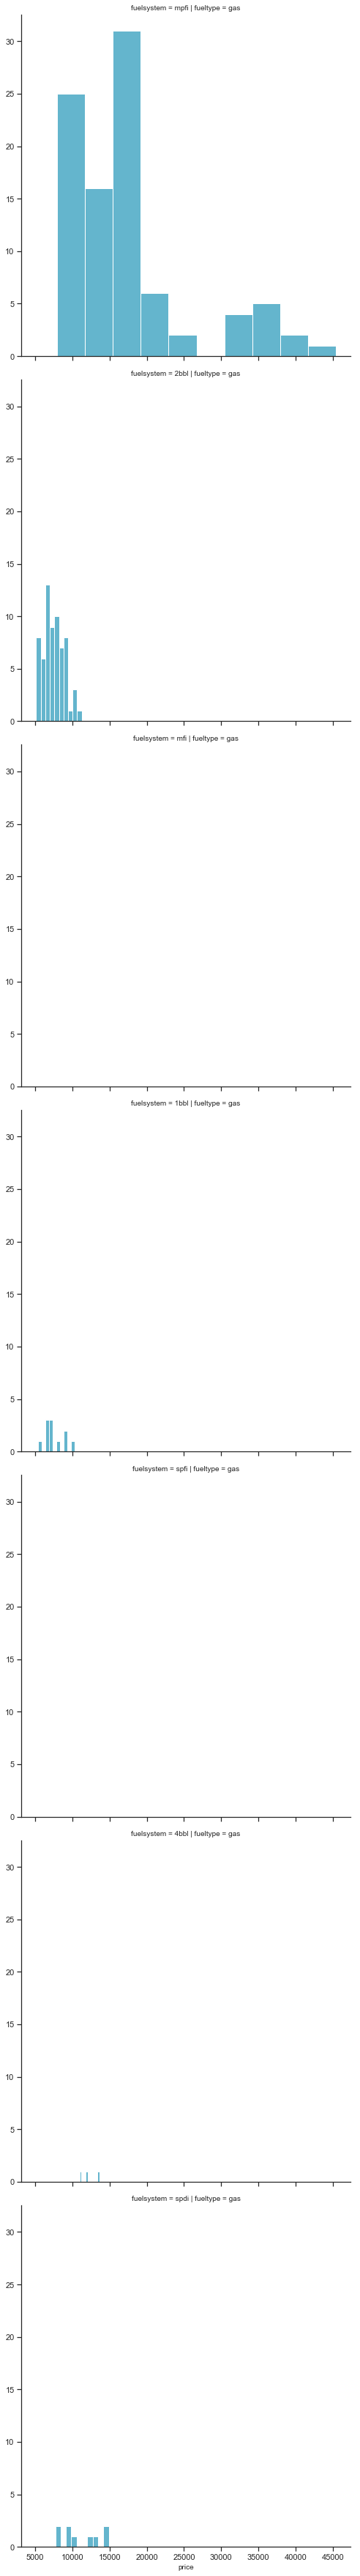

In [18]:
# FuelType correlation with other categorical variable
categoricalVaraible = ['aspiration','doornumber','carbody','drivewheel','enginelocation',
                       'enginetype','cylindernumber','fuelsystem']

#Plotting FacetGrid
for cols in categoricalVaraible:
    g=sns.FacetGrid(dfCarPrice, col="fueltype", row=cols, height=7)
    g.map(plt.hist, "price", color="c")

> <font color=Navy>
    <b> 5.2.2. Aspiration correlation with other categorical variable </b> <br>
  </font>

In [1]:
# Aspiration correlation with other categorical variable
categoricalVaraible = ['fueltype','doornumber','carbody','drivewheel','enginelocation',
                       'enginetype','cylindernumber','fuelsystem']

#Plotting FacetGrid
for cols in categoricalVaraible:
    g=sns.FacetGrid(dfCarPrice, col="aspiration", row=cols, height=7)
    g.map(plt.hist, "price", color="c")
    

NameError: name 'sns' is not defined

> <font color=Navy>
    <b> 5.2.3. DoorNumber correlation with other categorical variable </b> <br>
  </font>

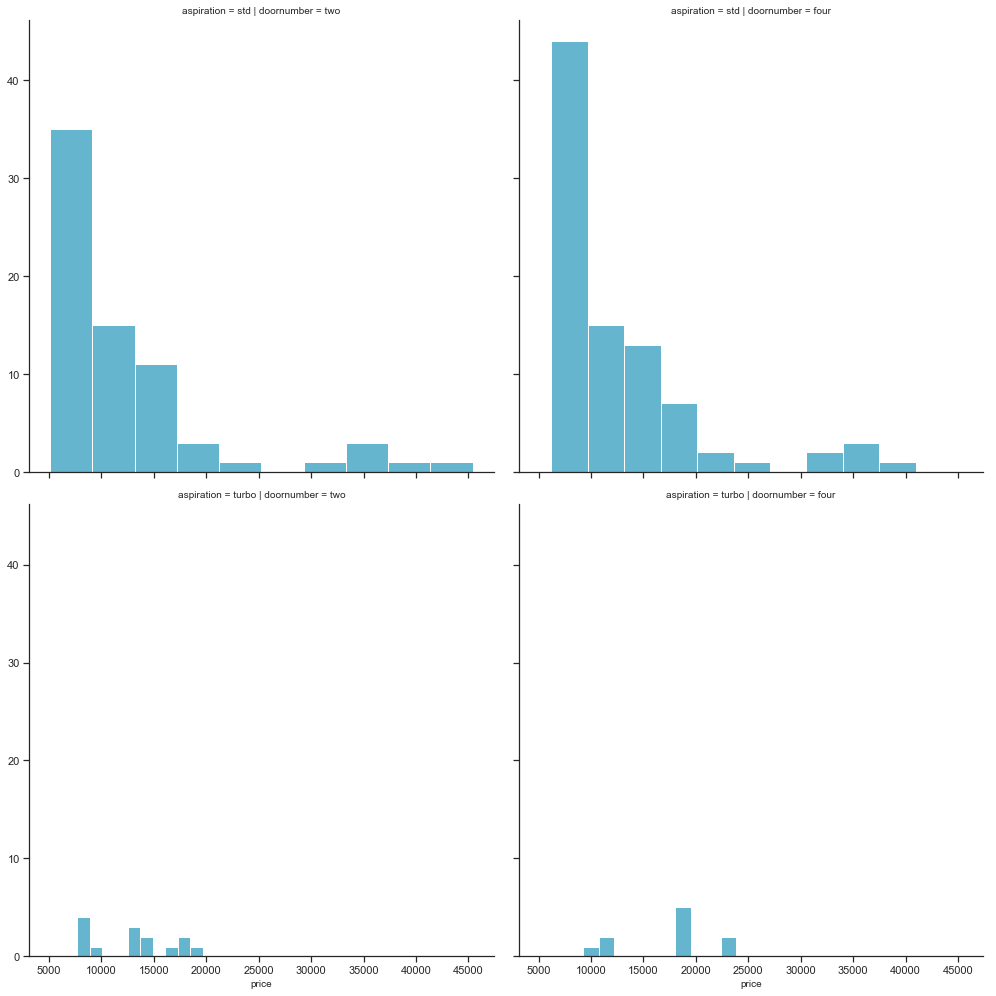

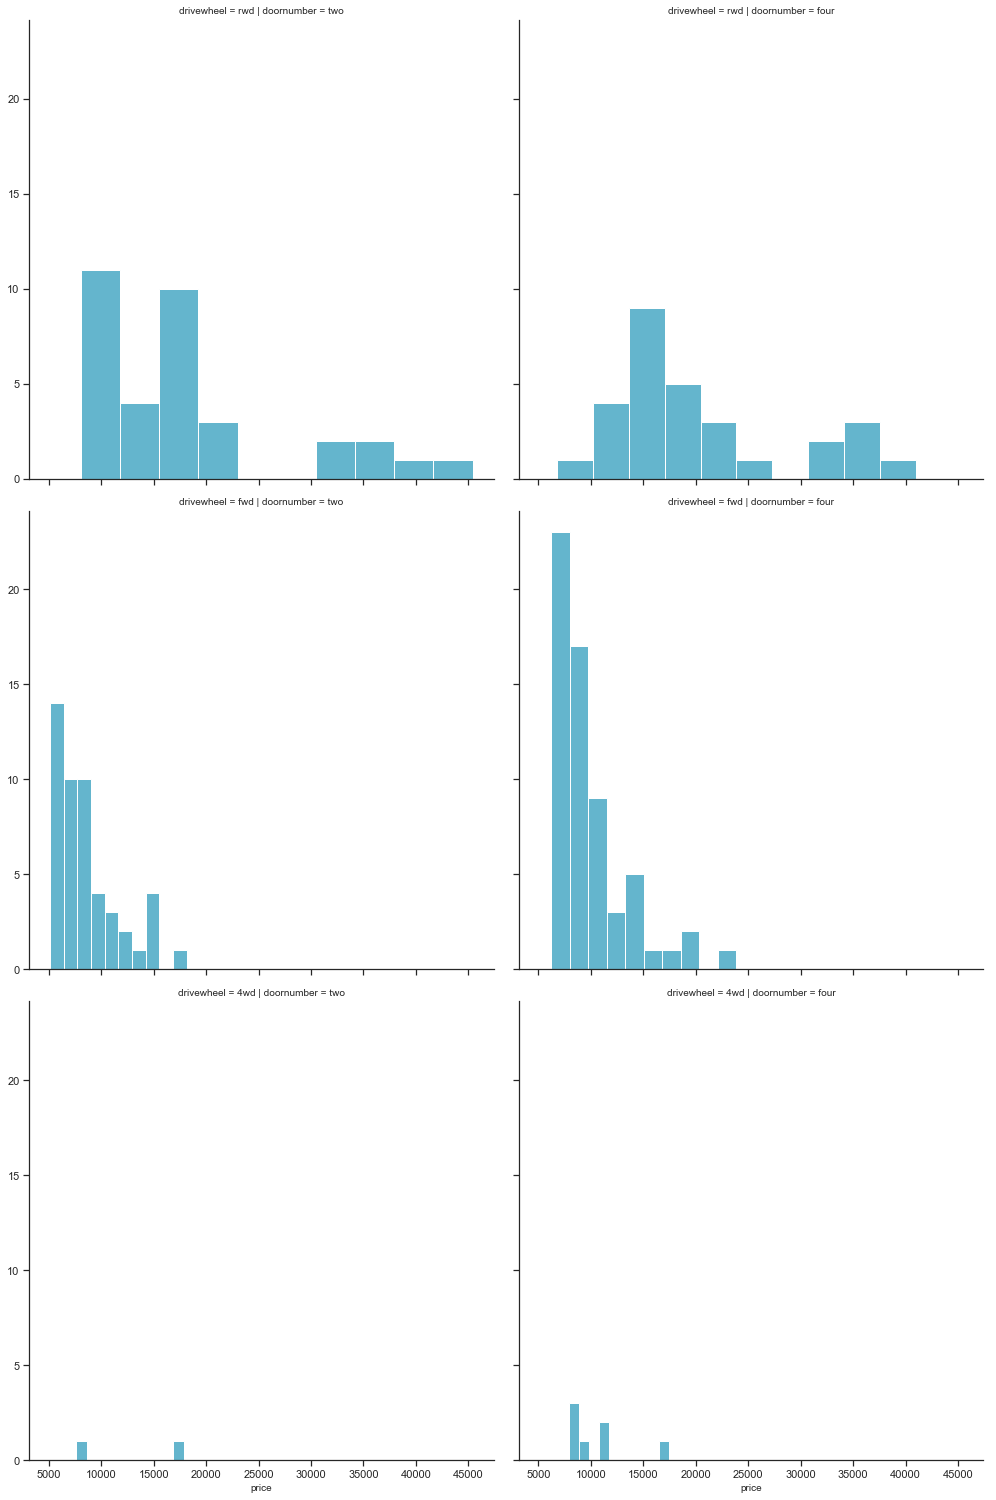

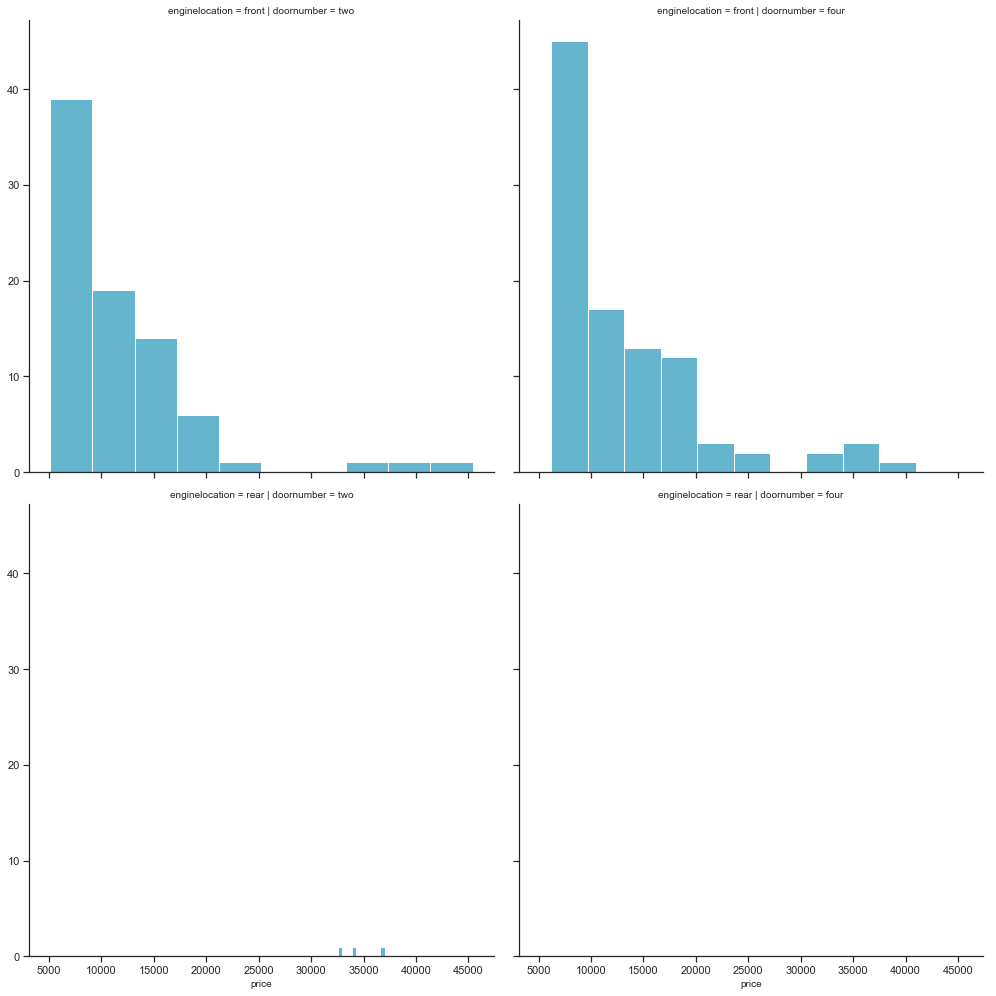

In [20]:
# doornumber correlation with other categorical variable
categoricalVaraible = ['fueltype','aspiration','carbody','drivewheel','enginelocation',
                       'enginetype','cylindernumber','fuelsystem']

#Plotting FacetGrid
for cols in categoricalVaraible:
    g=sns.FacetGrid(dfCarPrice, col="doornumber", row=cols, height=7)
    g.map(plt.hist, "price", color="c")


> <font color=Navy>
    <b> 5.2.4. carbody correlation with other categorical variable </b> <br>
  </font>

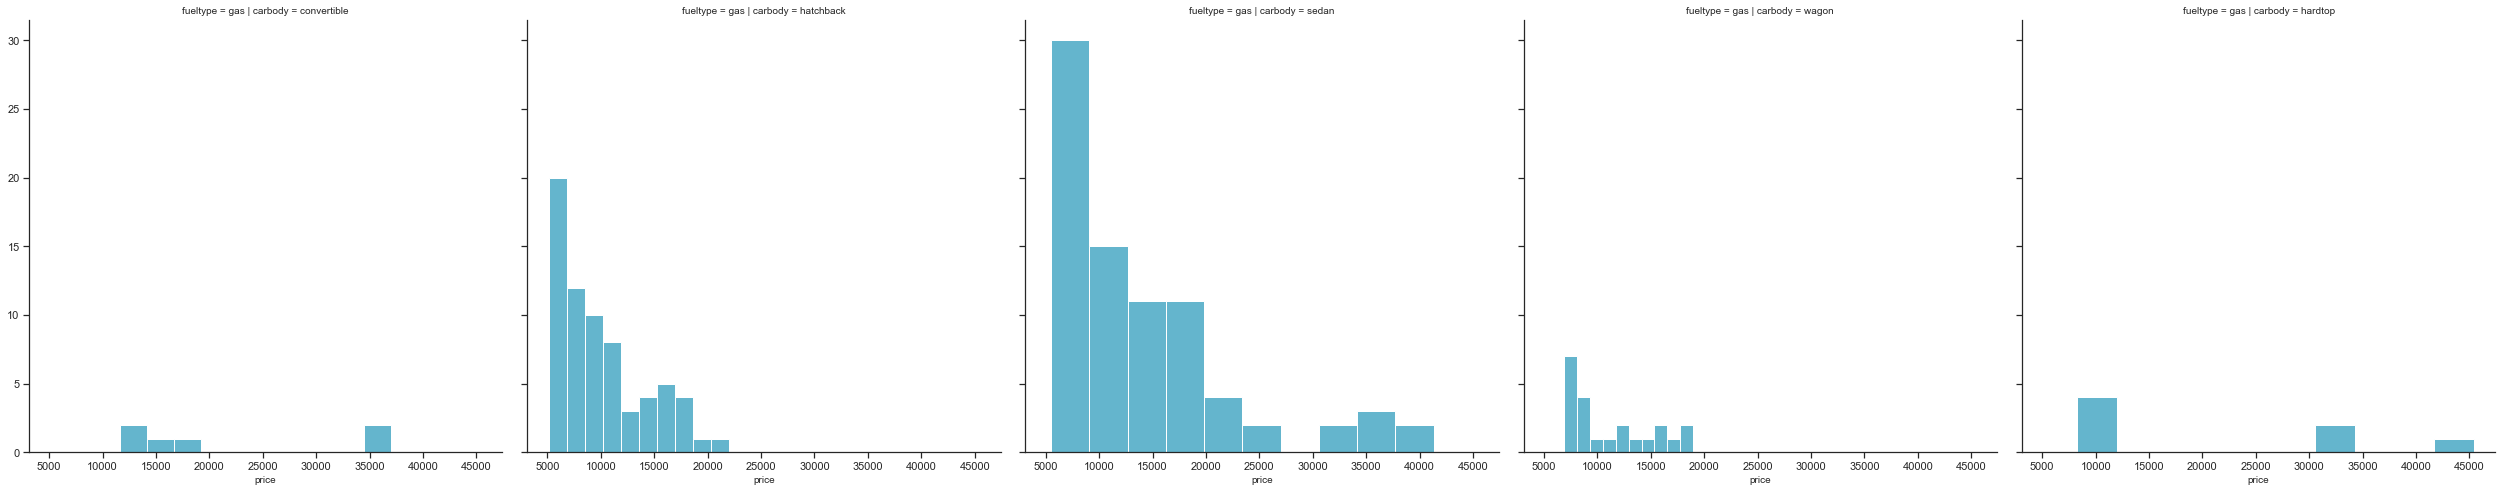

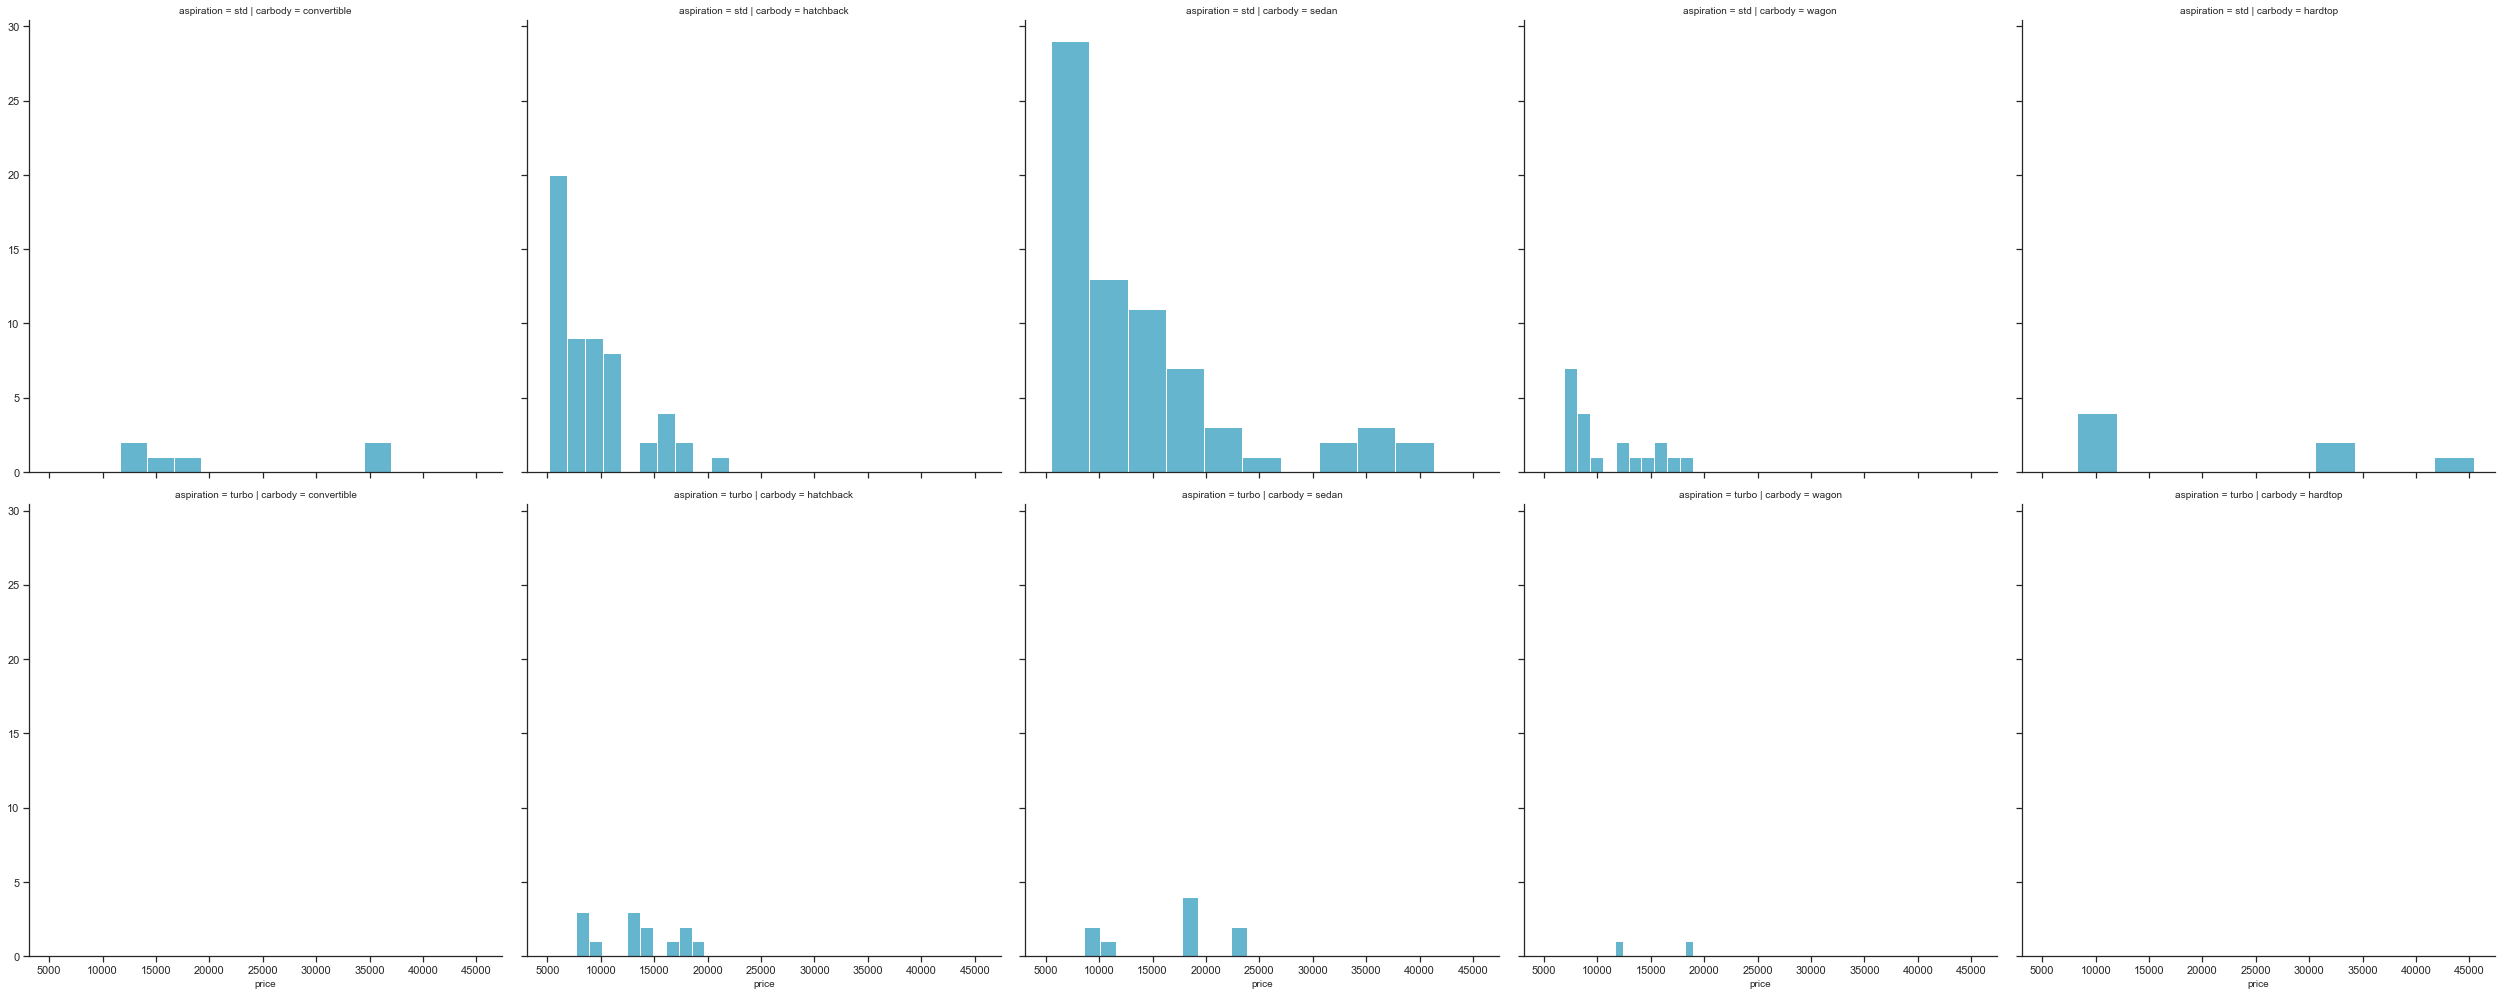

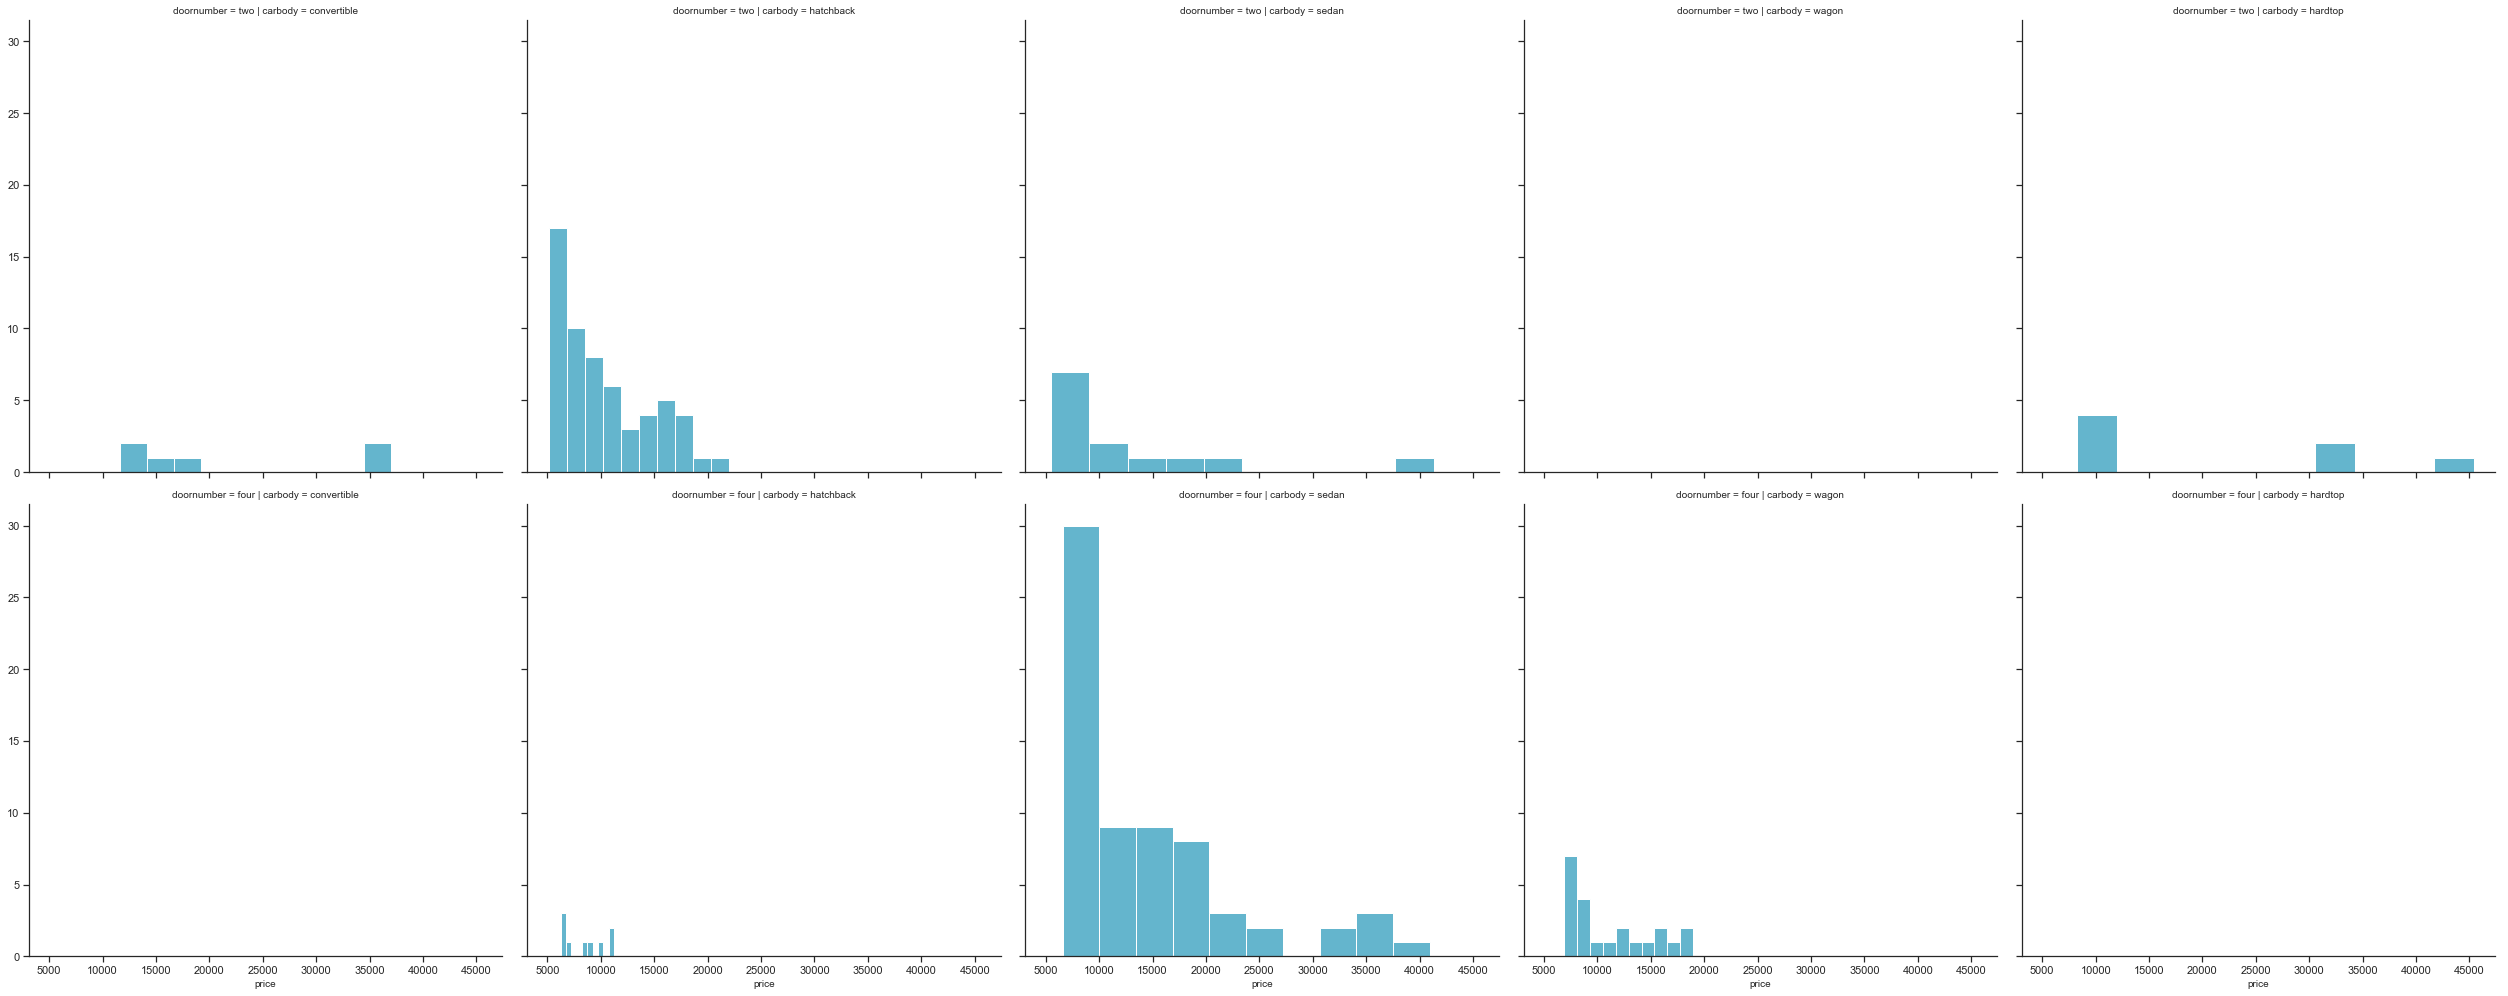

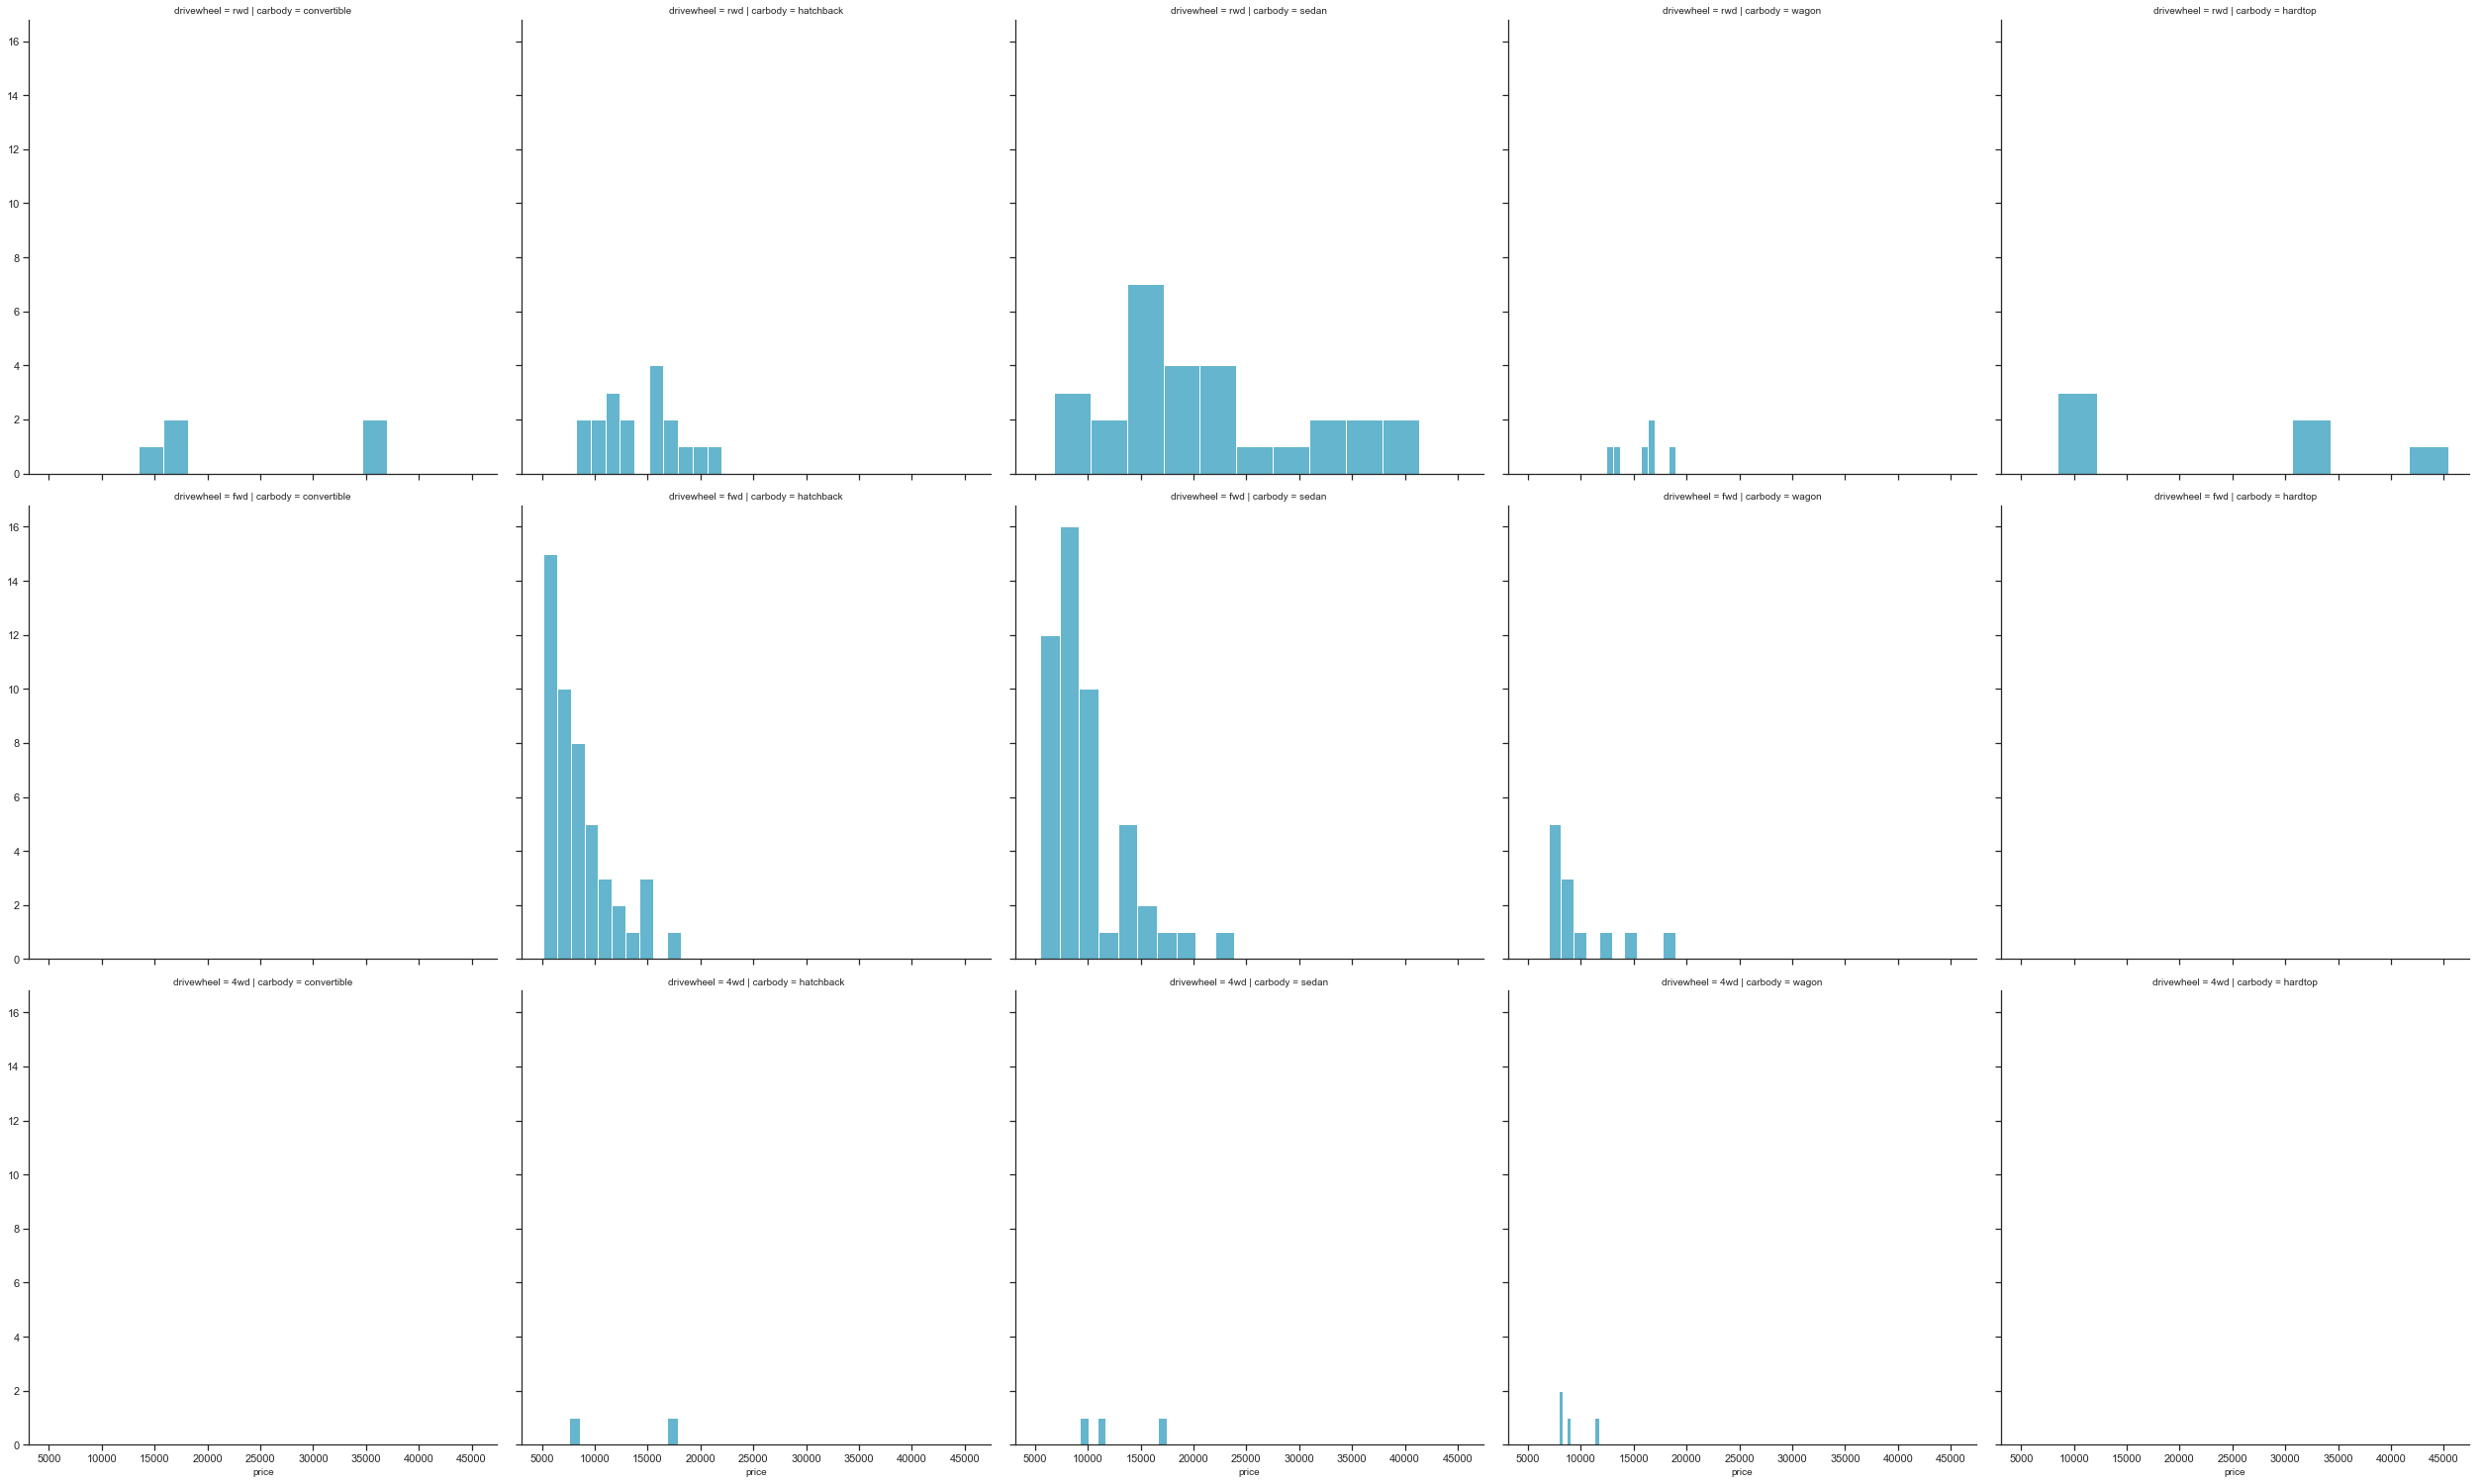

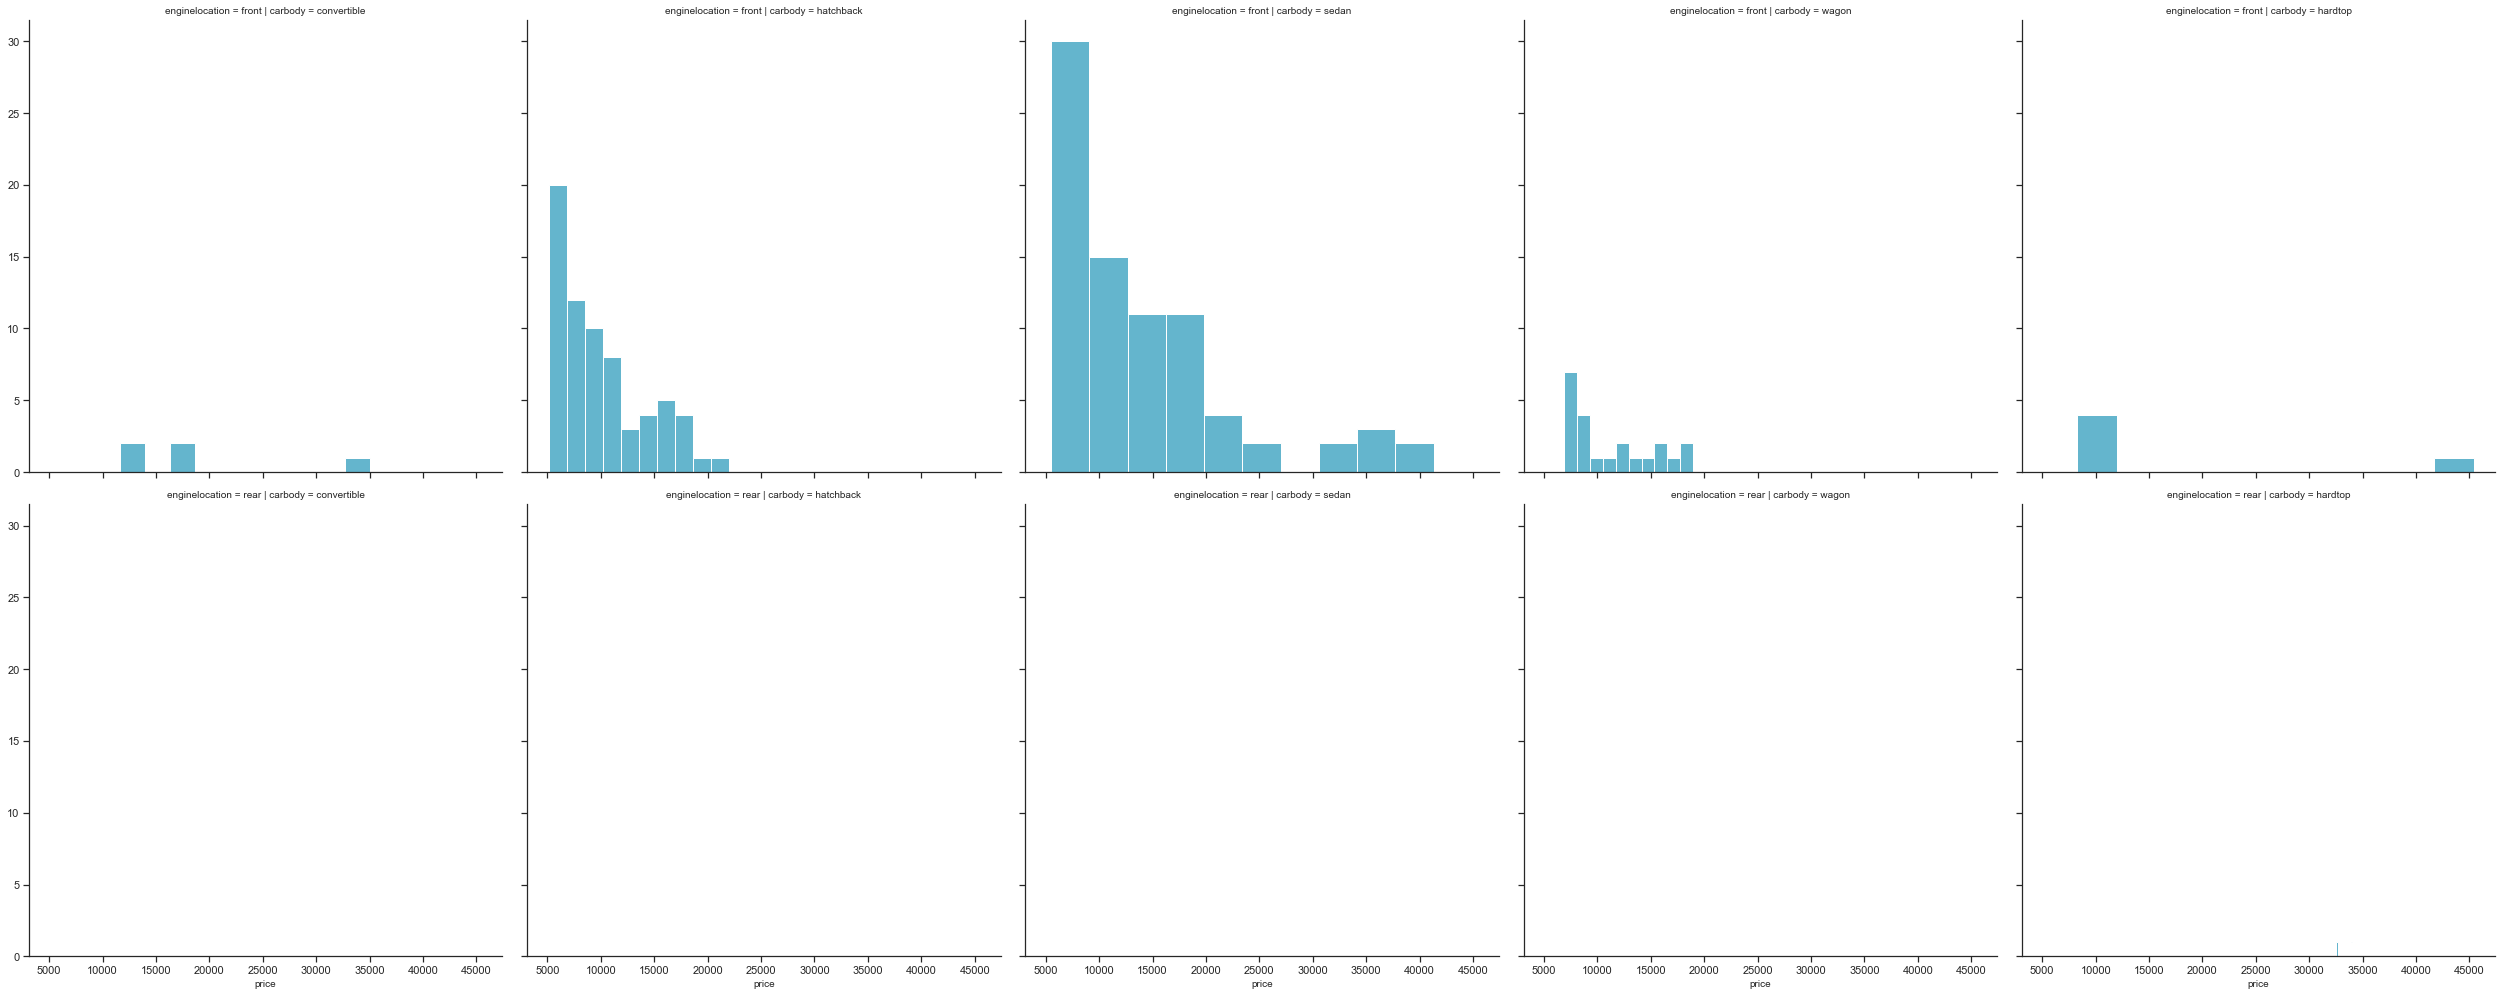

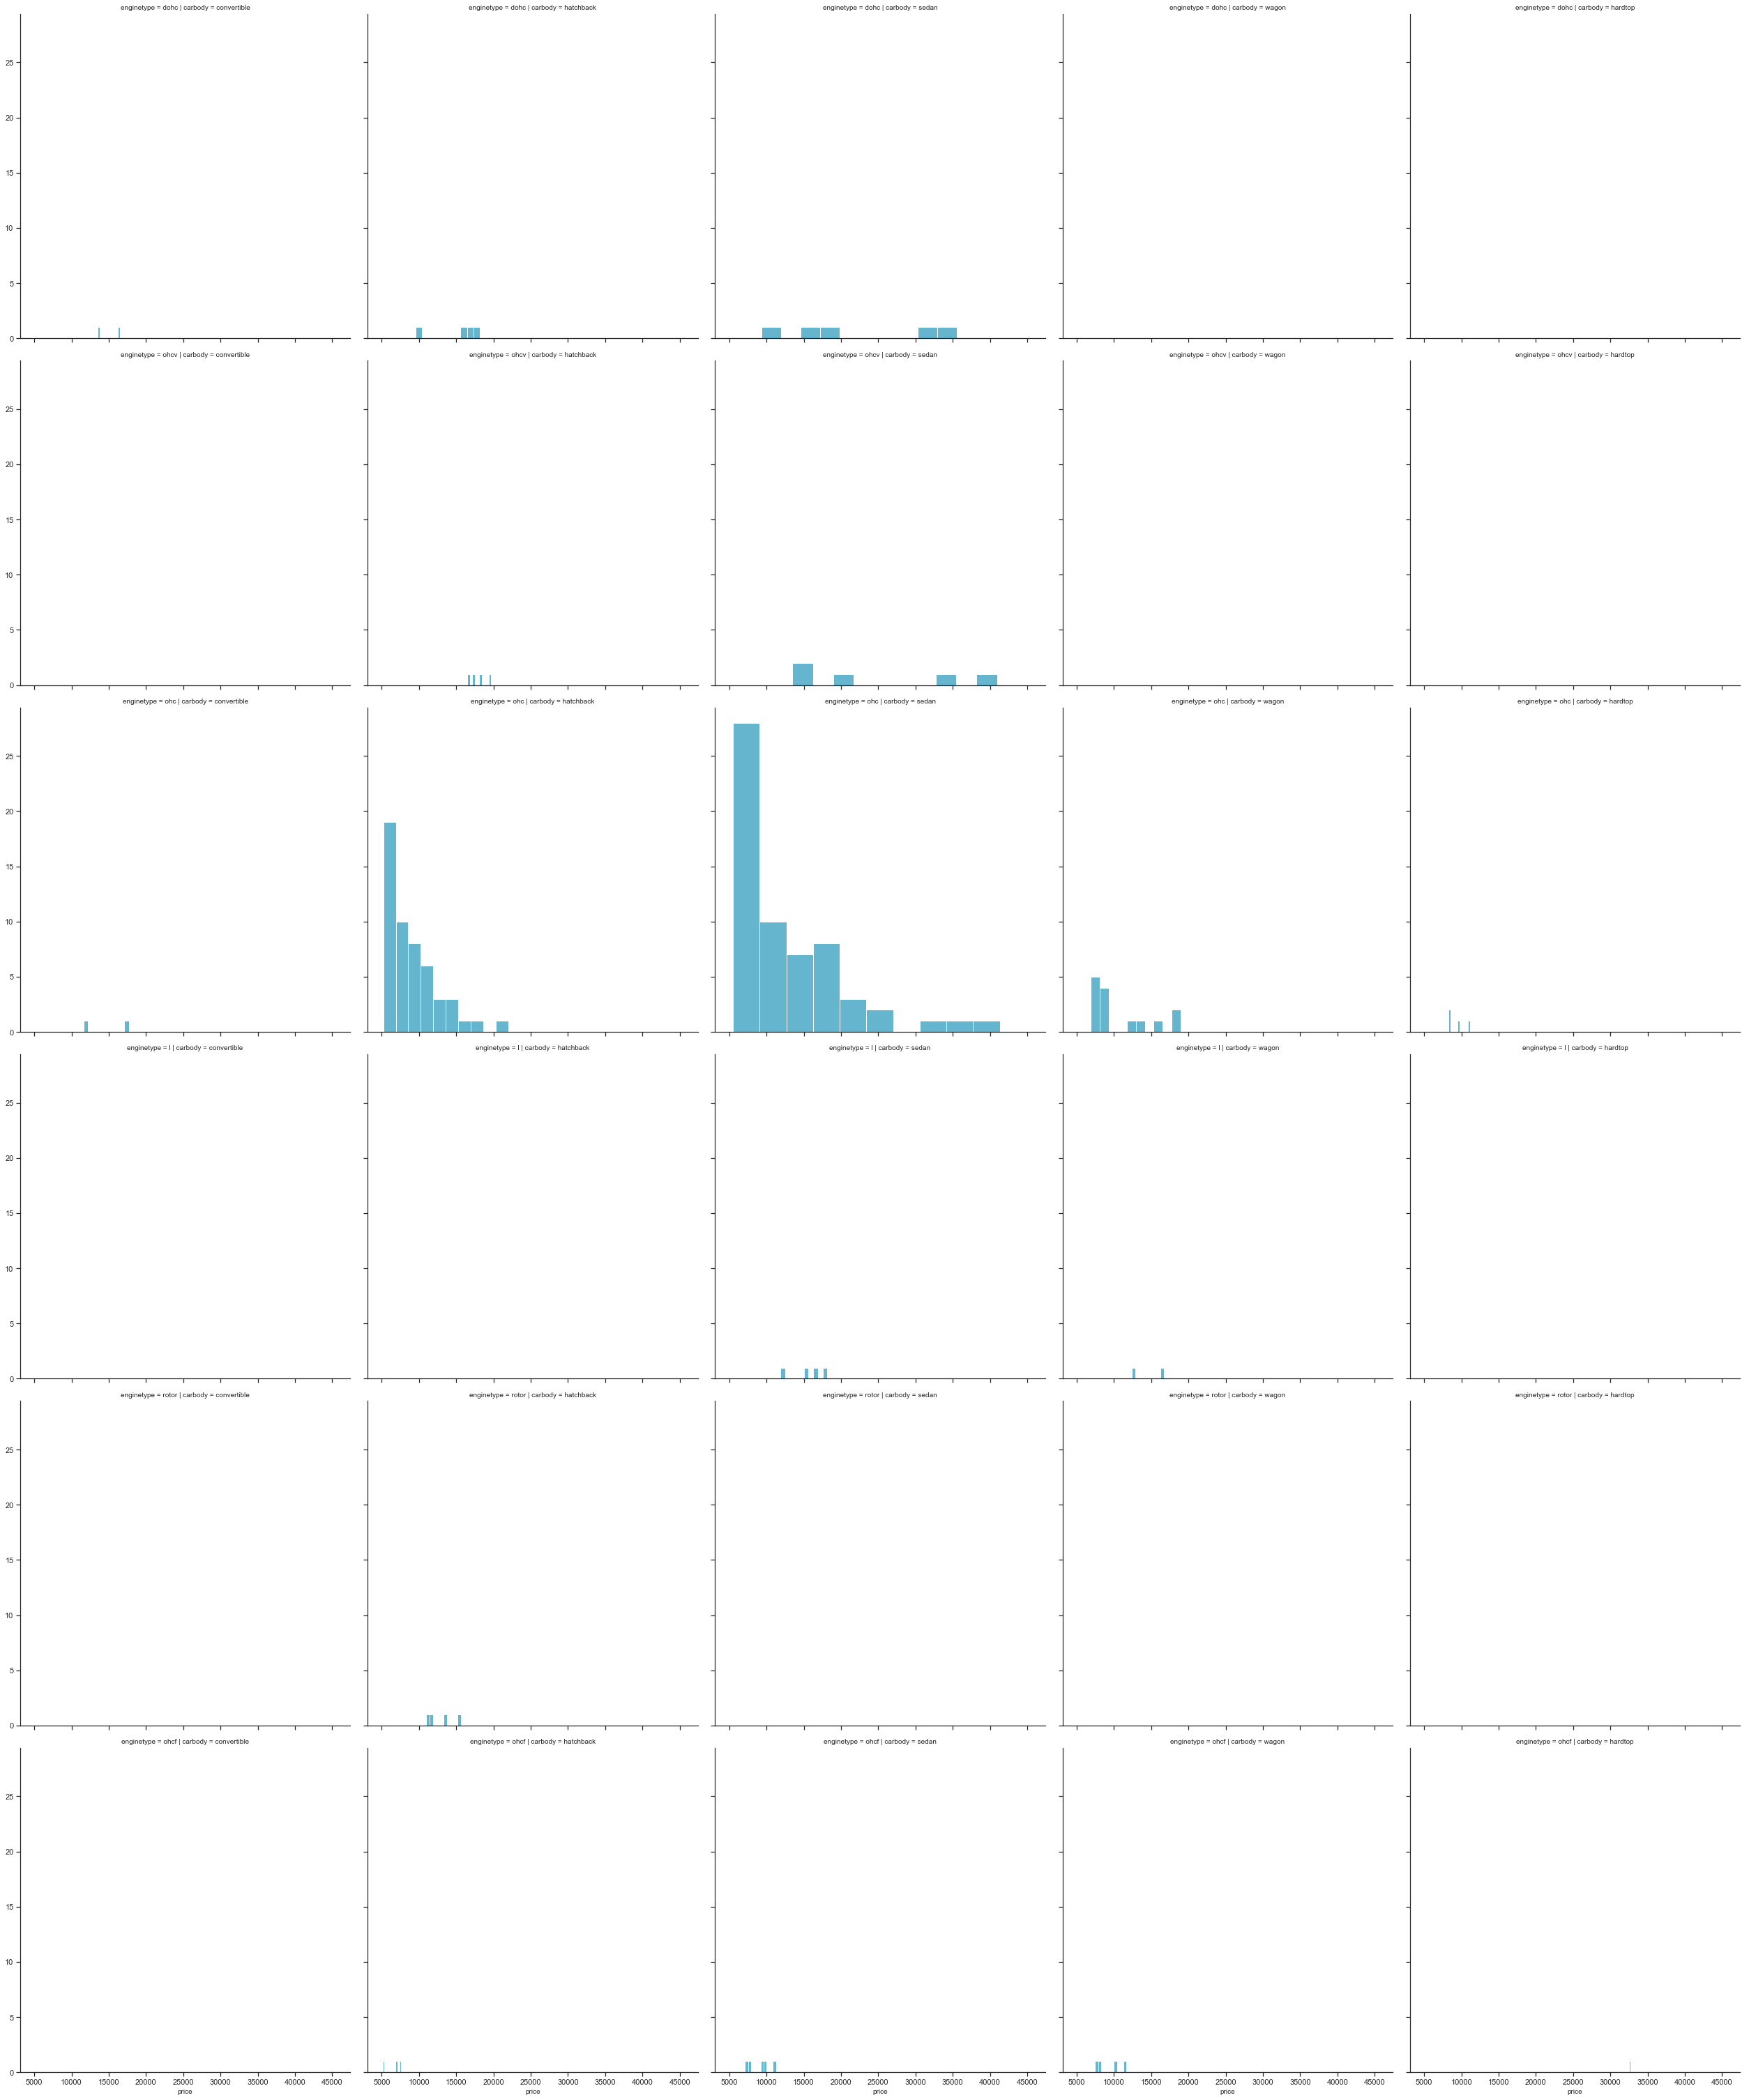

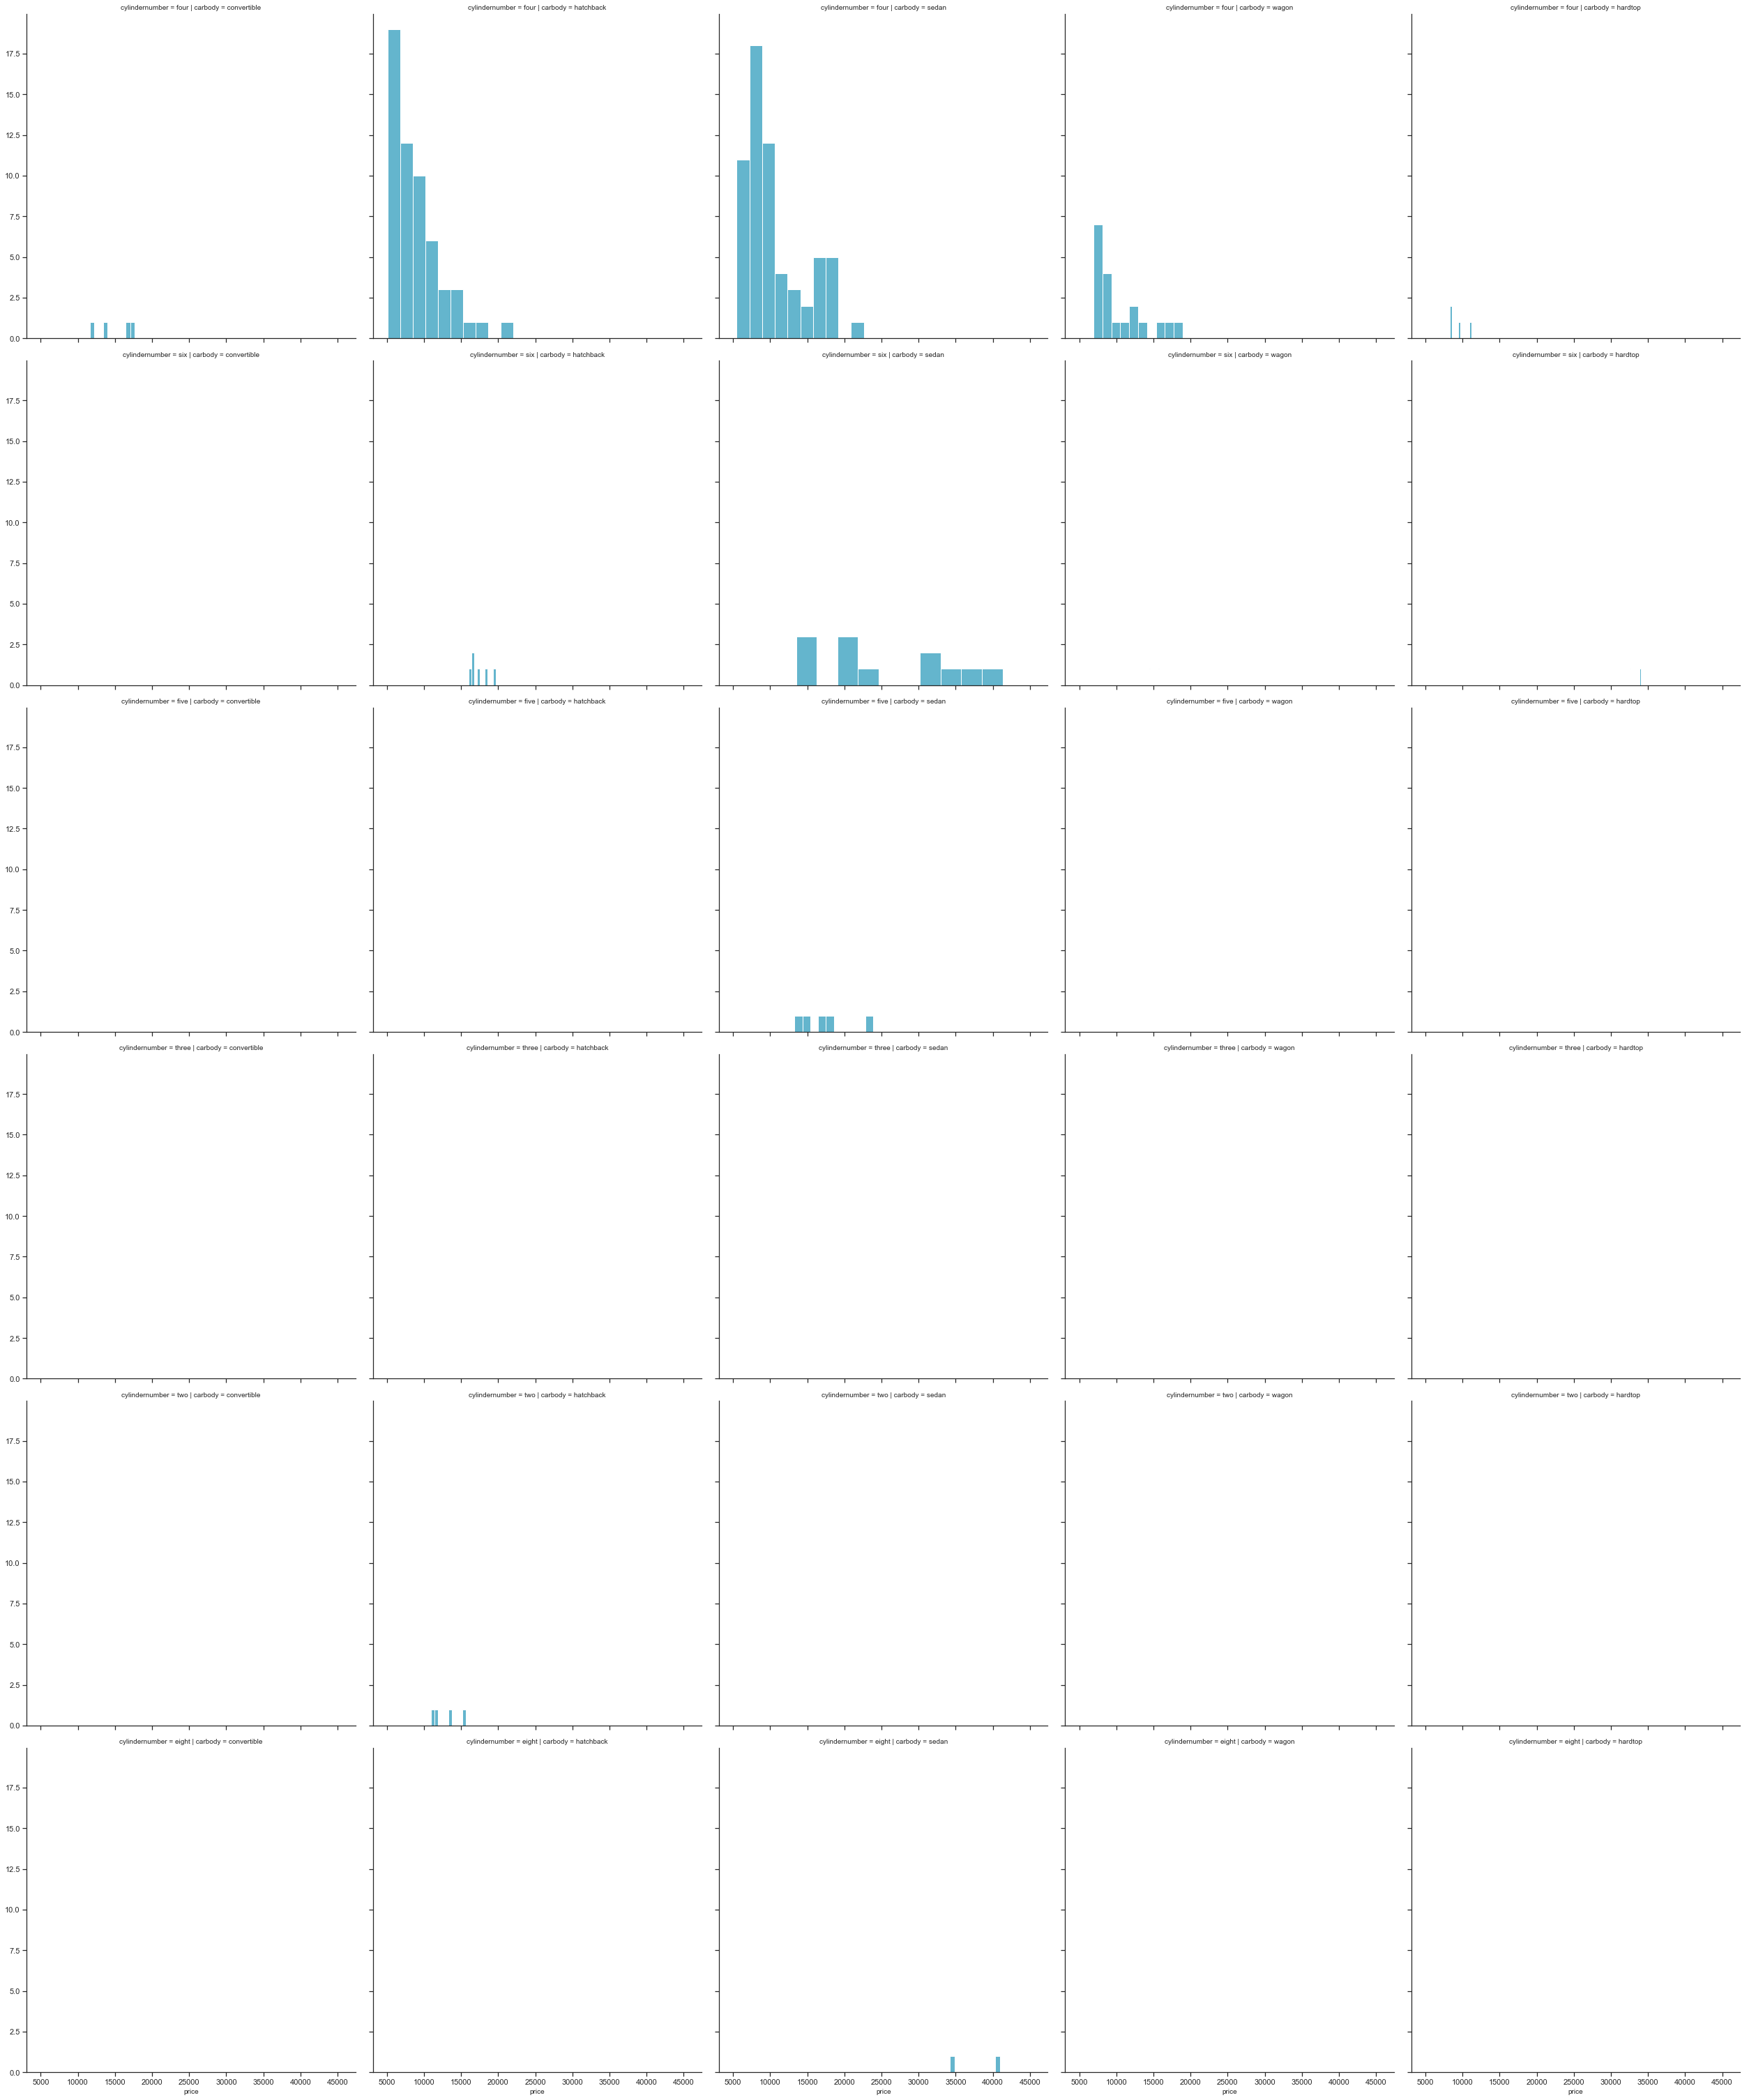

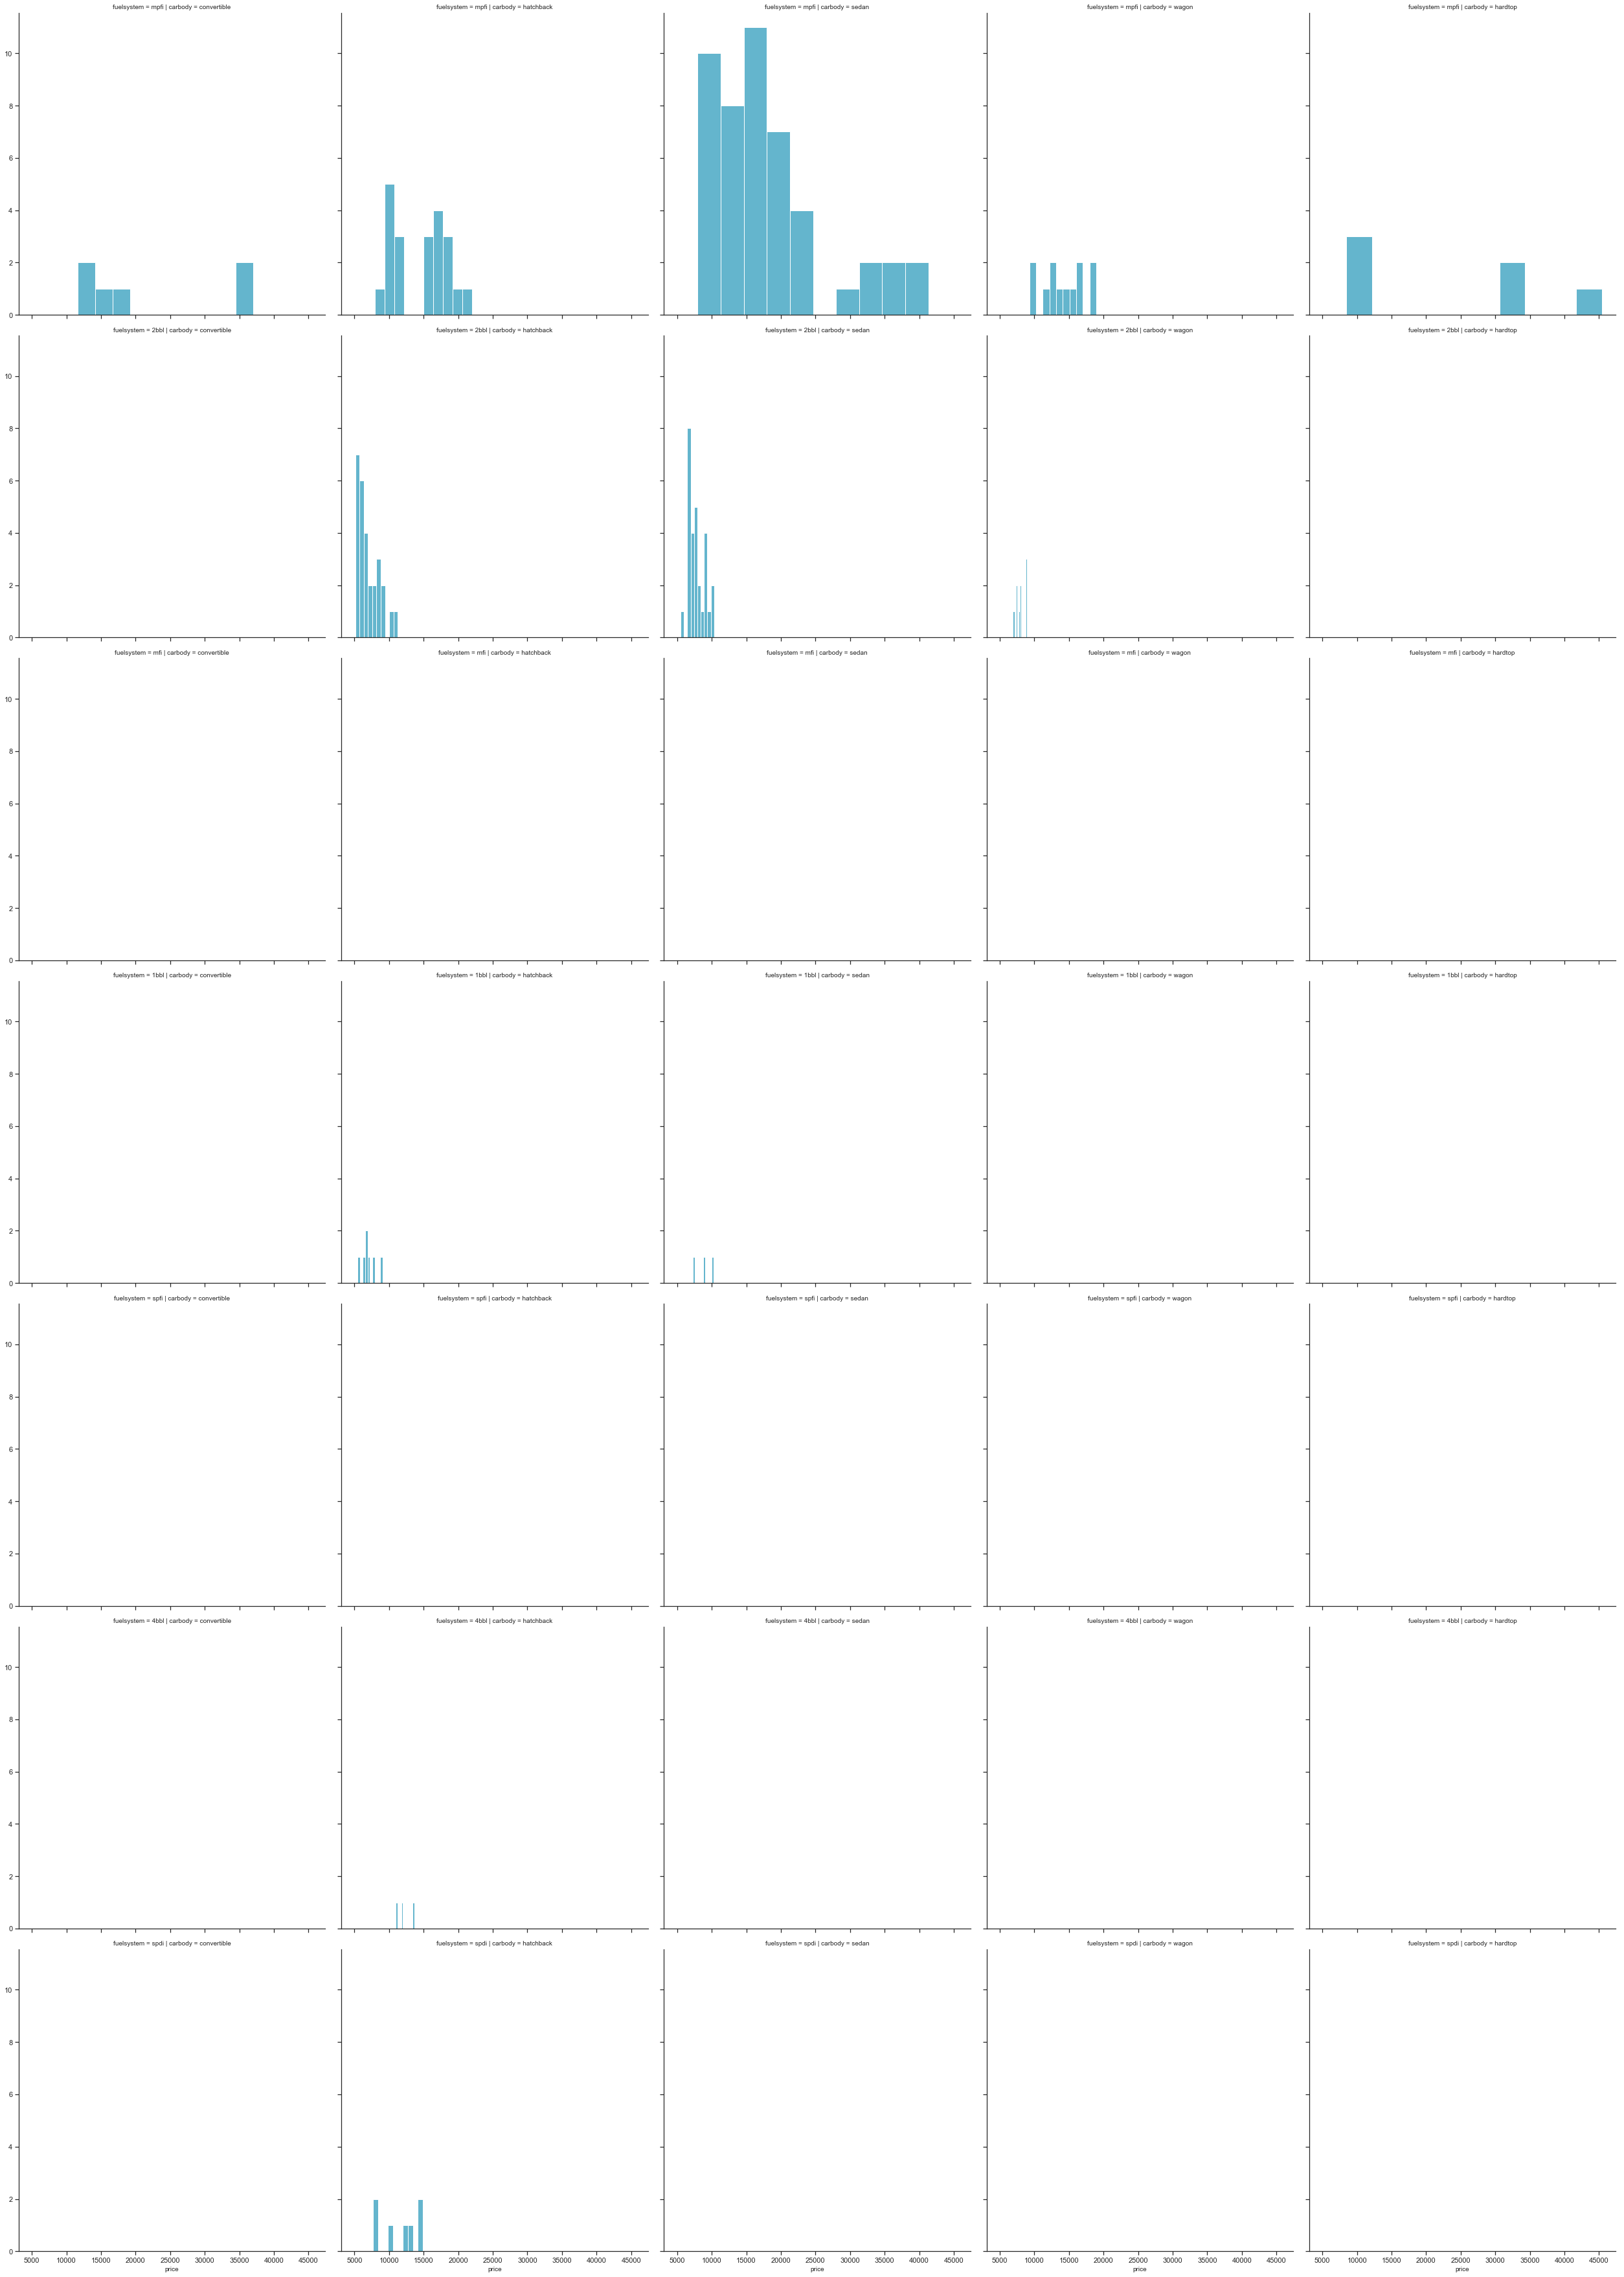

In [21]:
# carbody correlation with other categorical variable
categoricalVaraible = ['fueltype','aspiration','doornumber','drivewheel','enginelocation',
                       'enginetype','cylindernumber','fuelsystem']

#Plotting FacetGrid
for cols in categoricalVaraible:
    g=sns.FacetGrid(dfCarPrice, col="carbody", row=cols, height=7)
    g.map(plt.hist, "price", color="c")


> <font color=Navy>
    <b> 5.2.5. drivewheel correlation with other categorical variable </b> <br>
  </font>

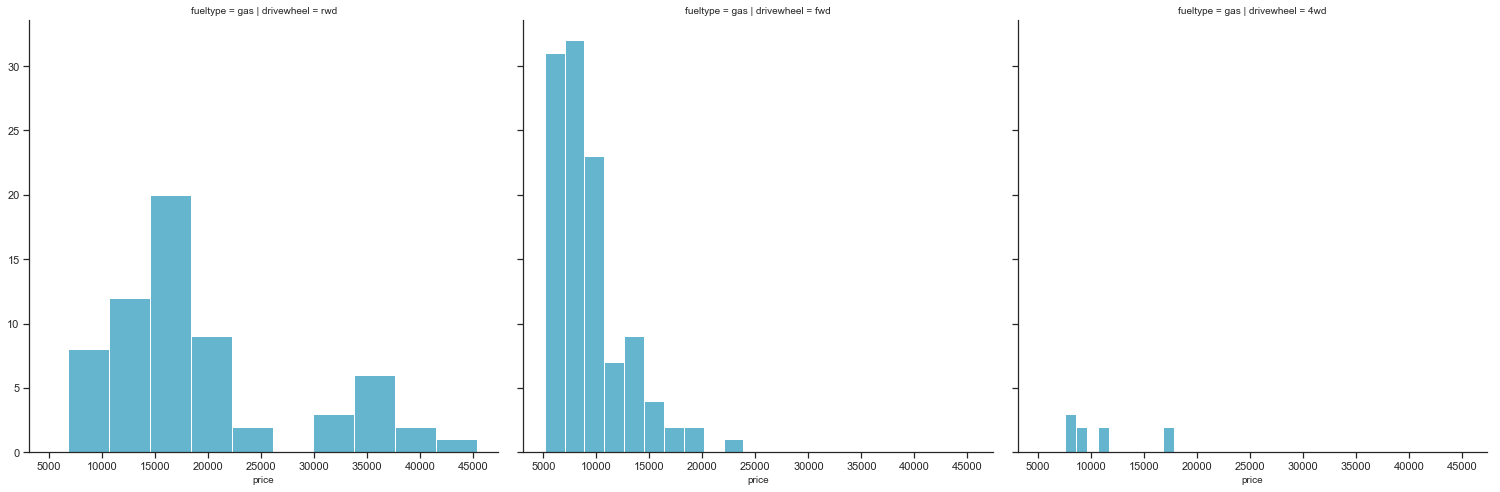

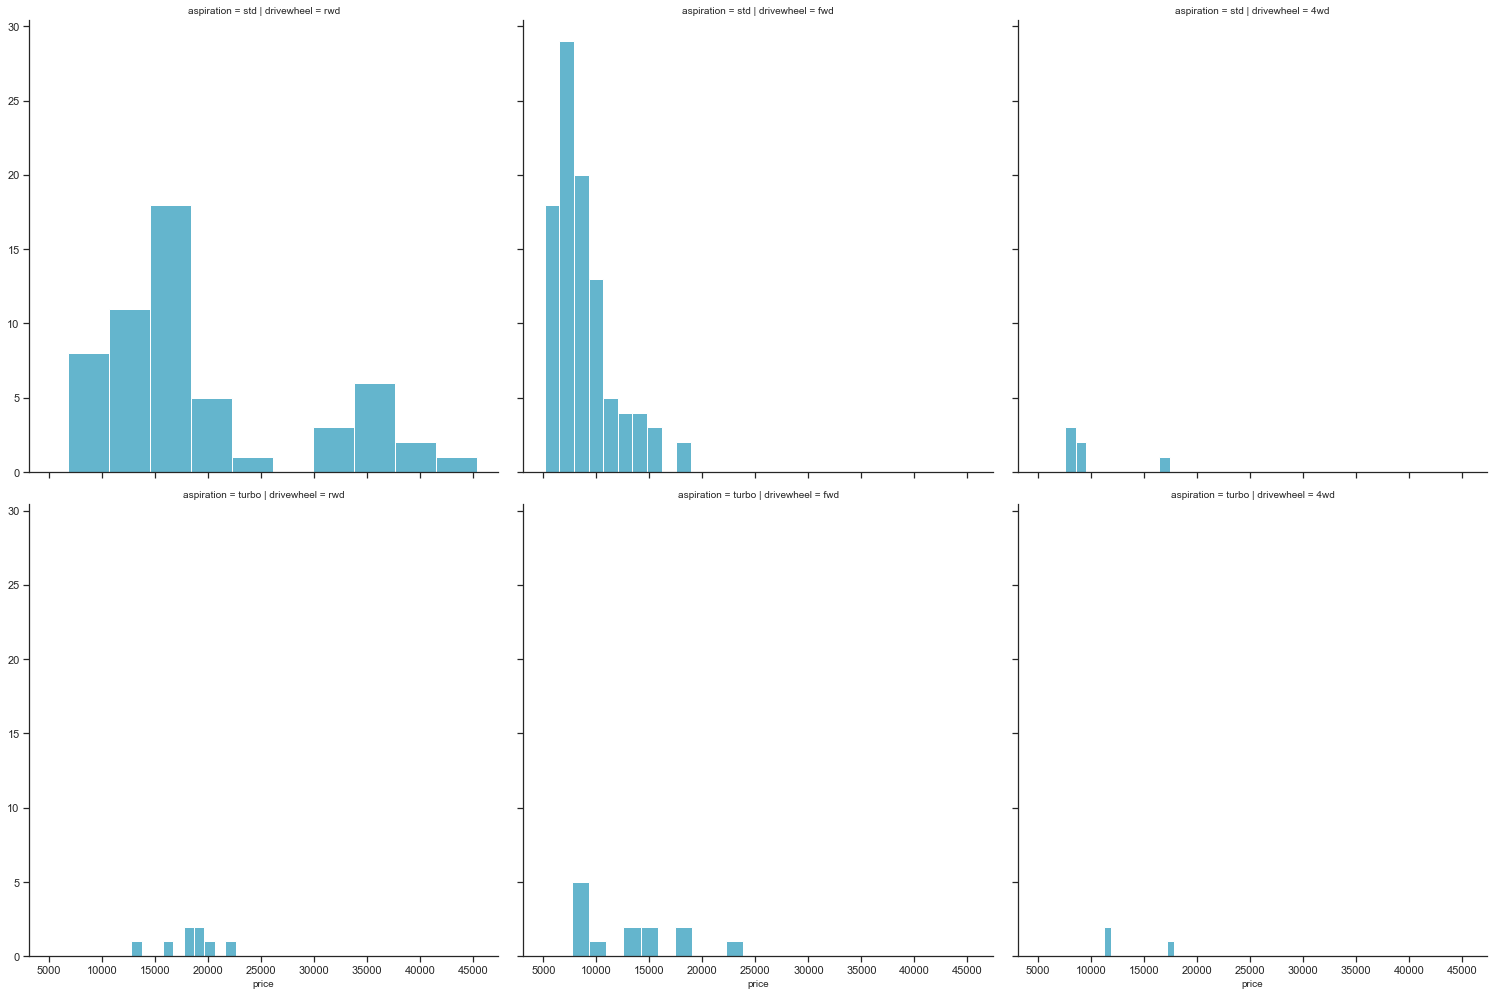

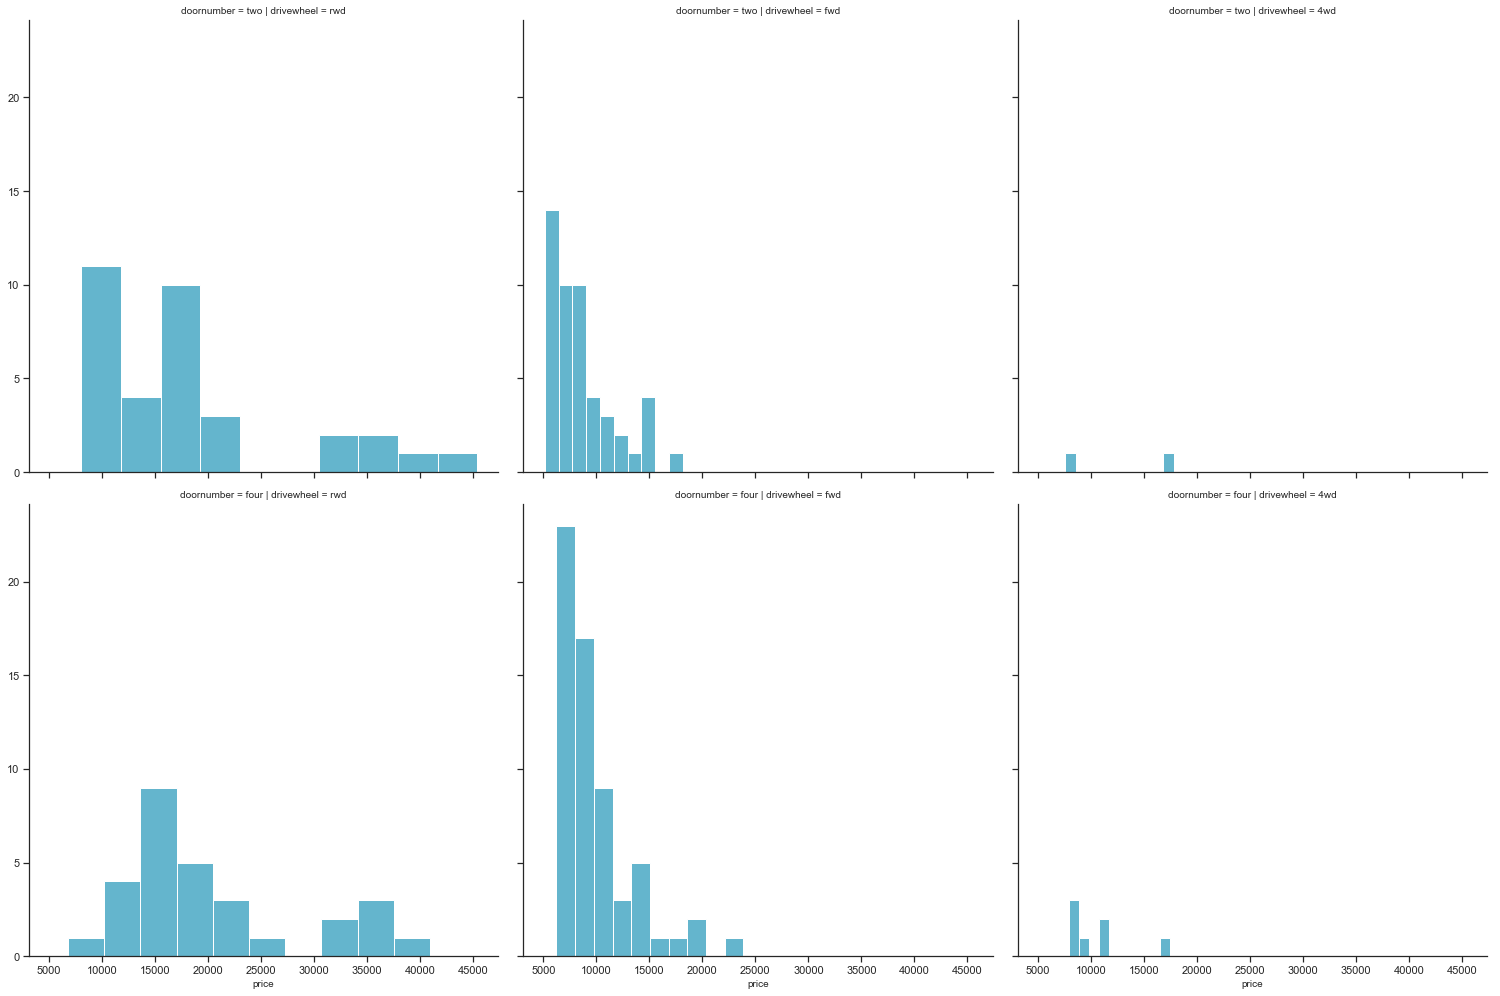

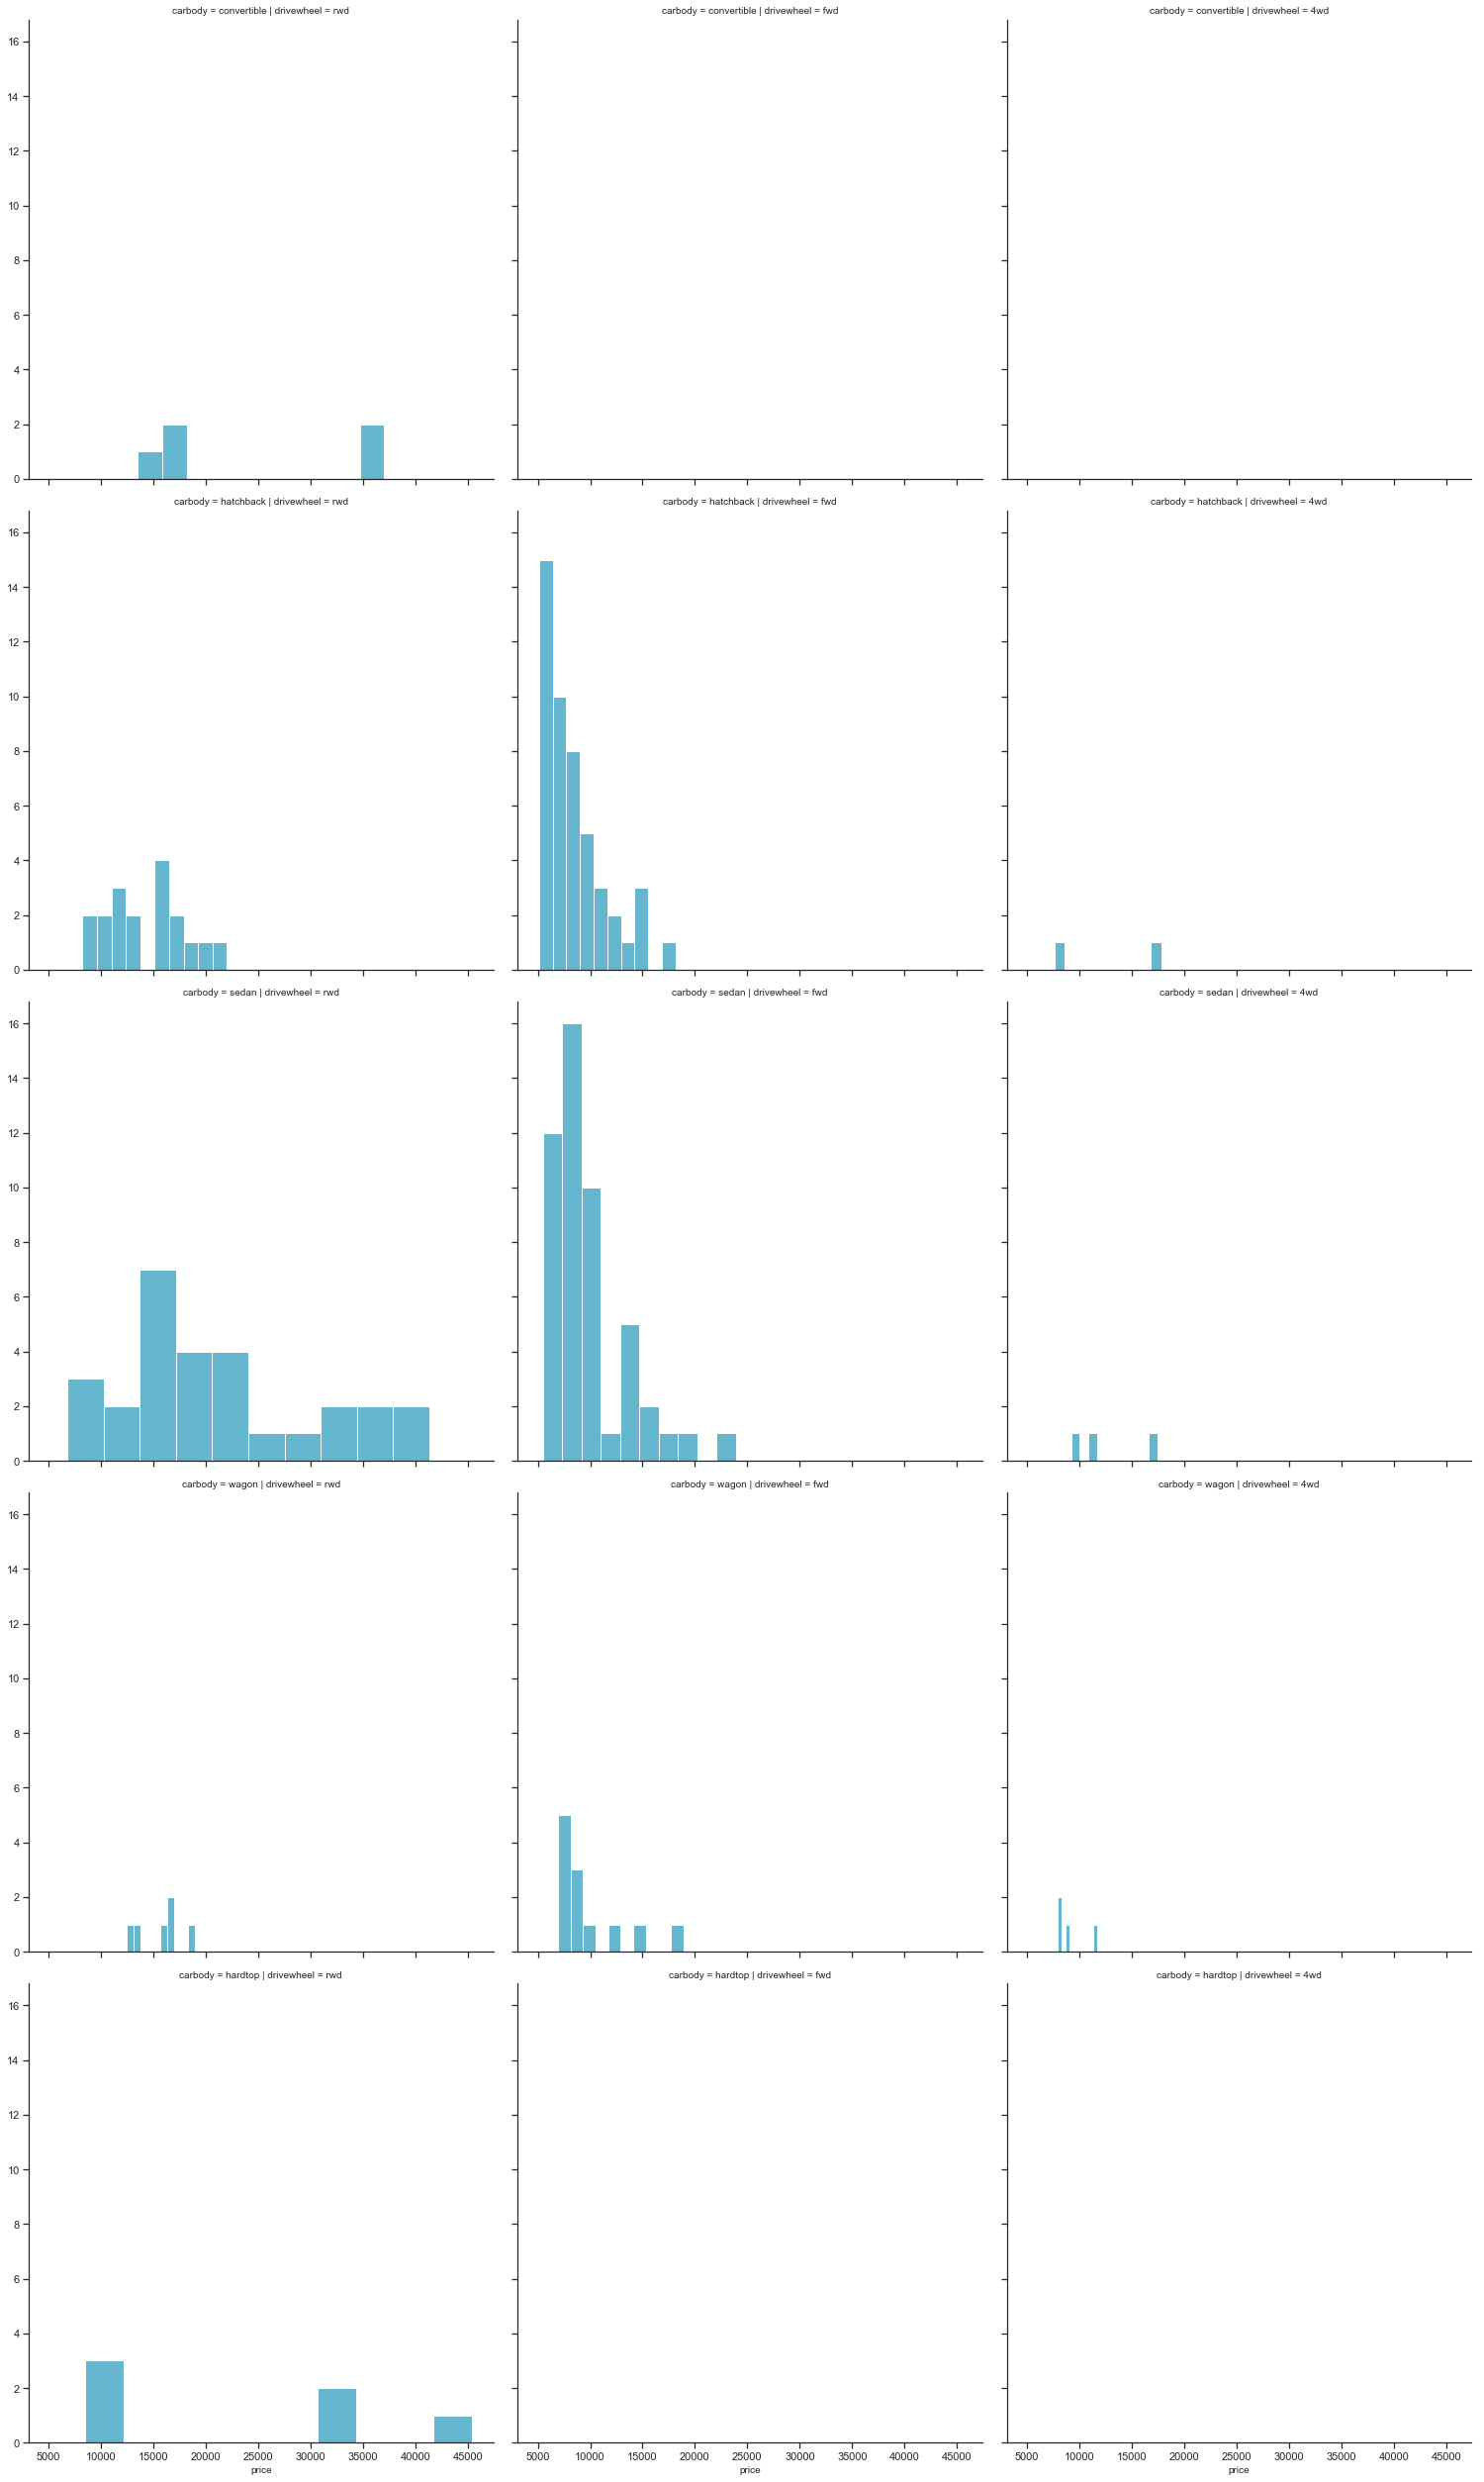

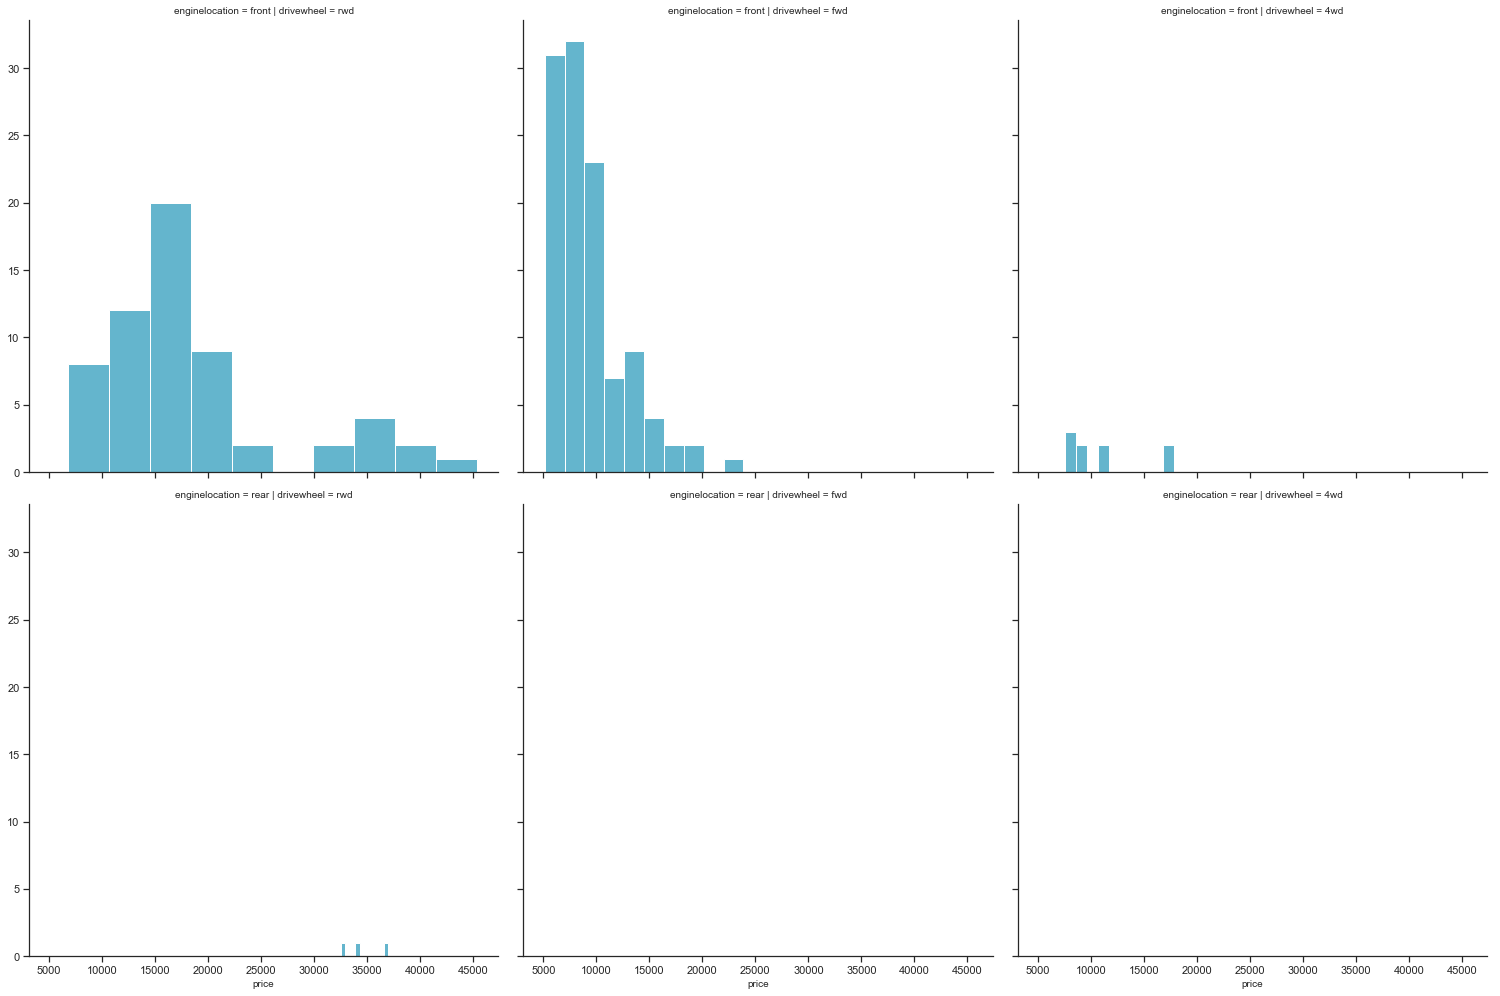

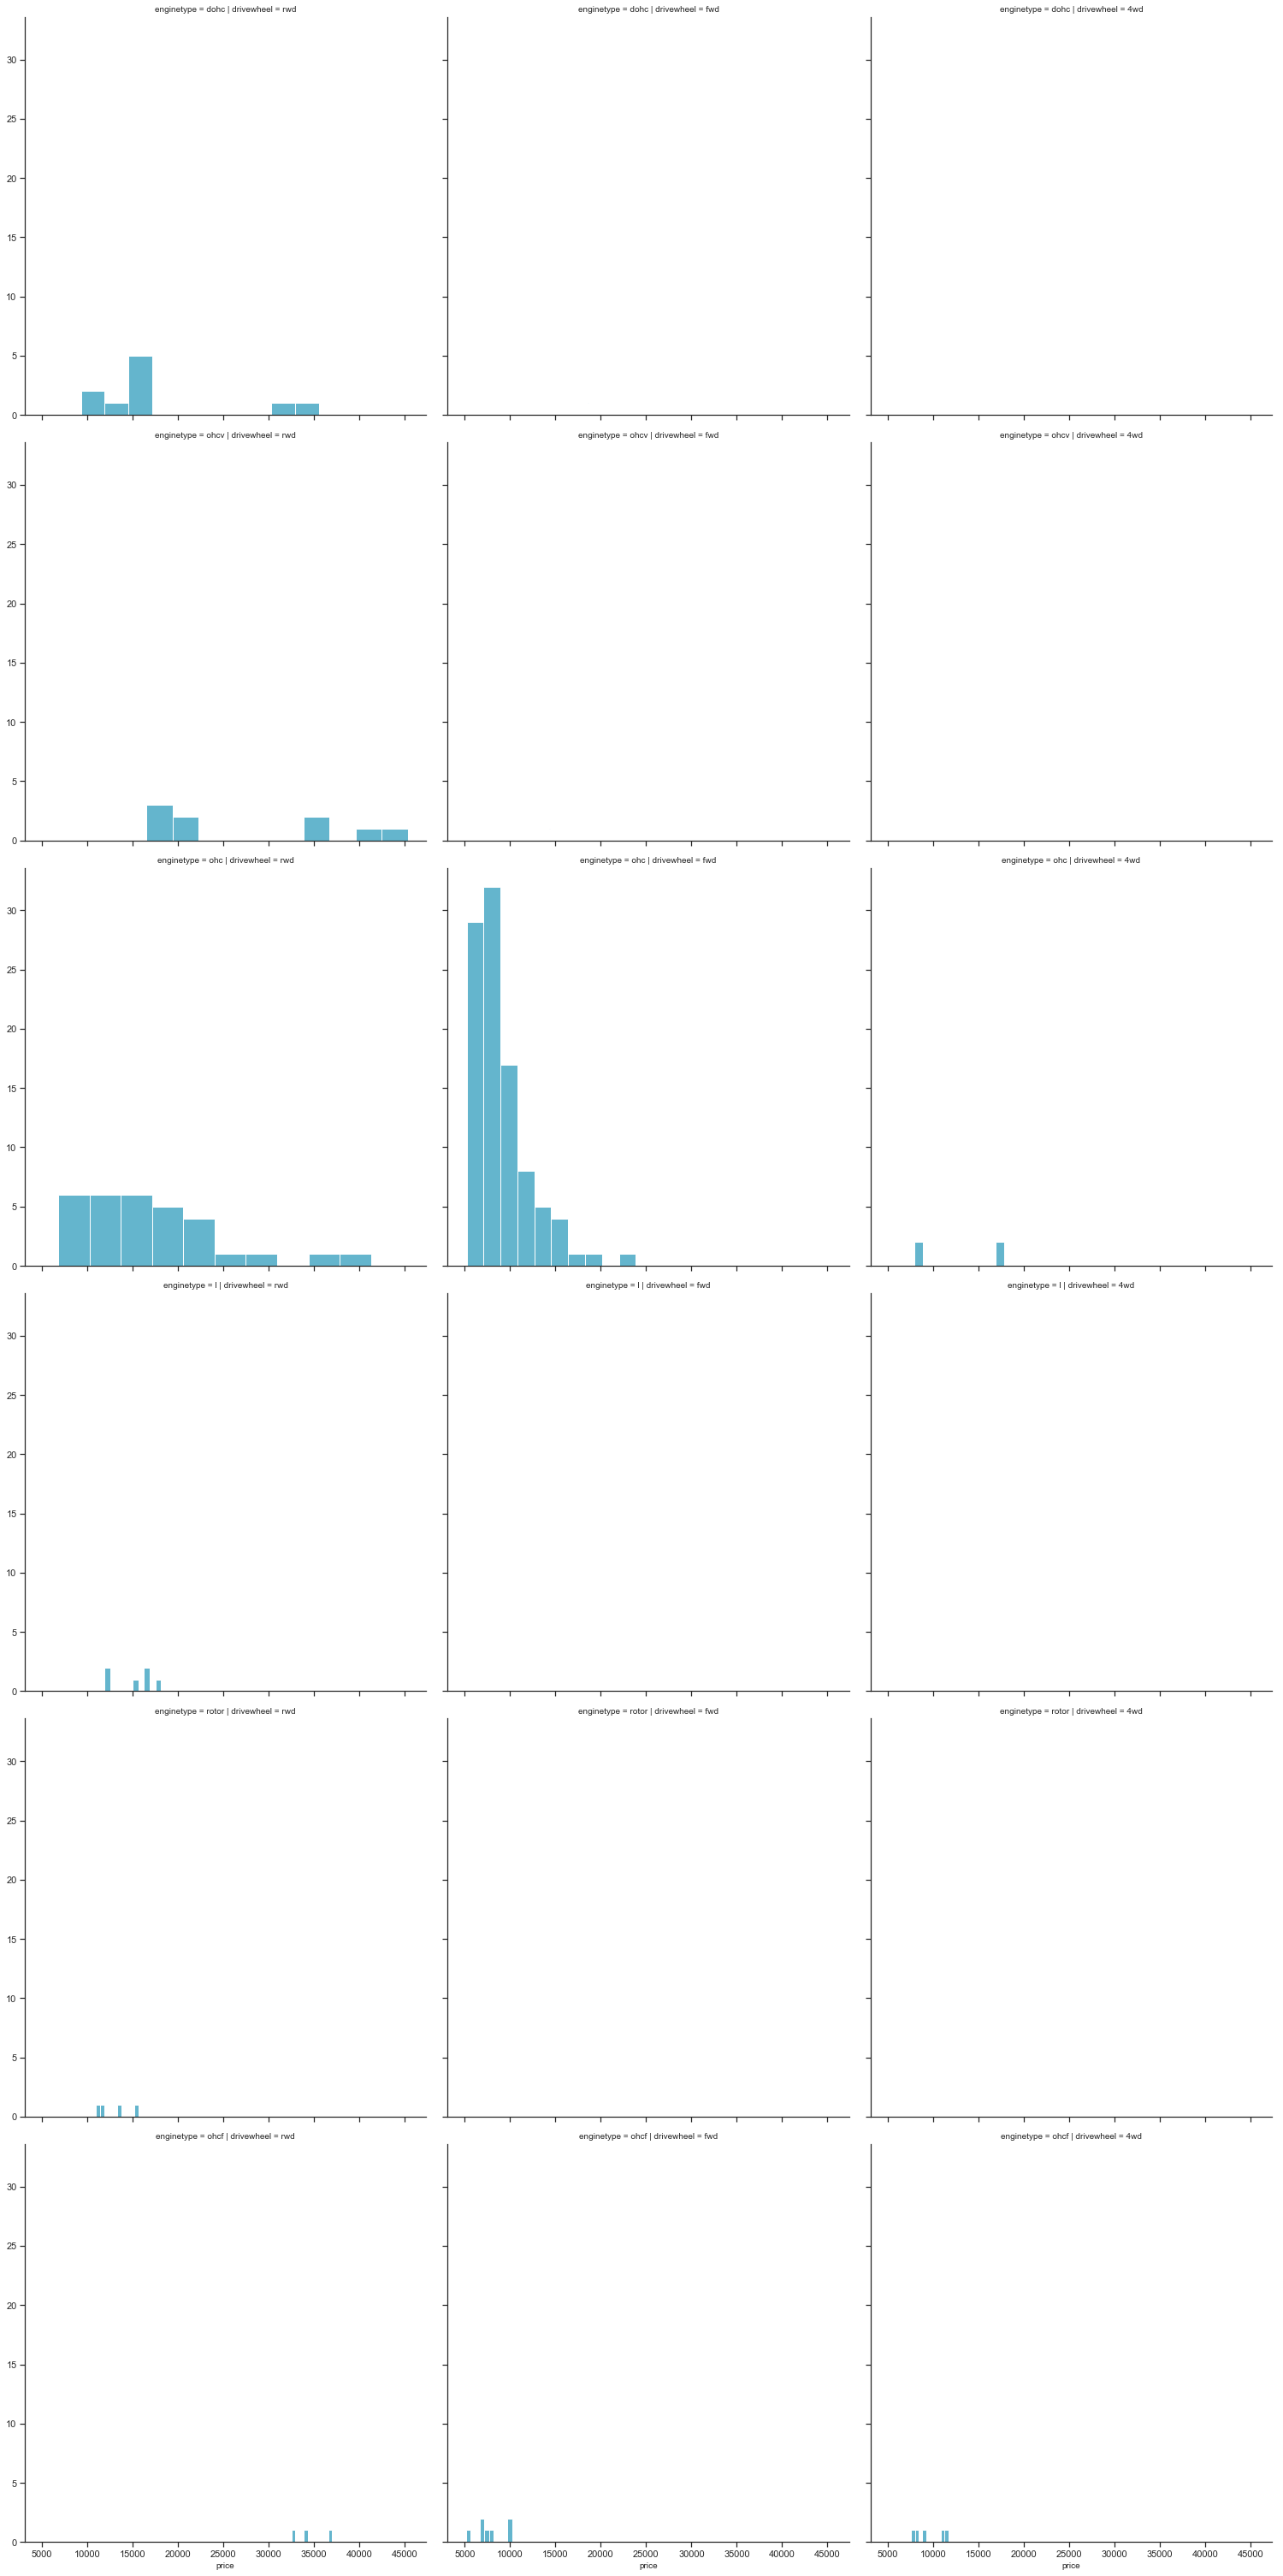

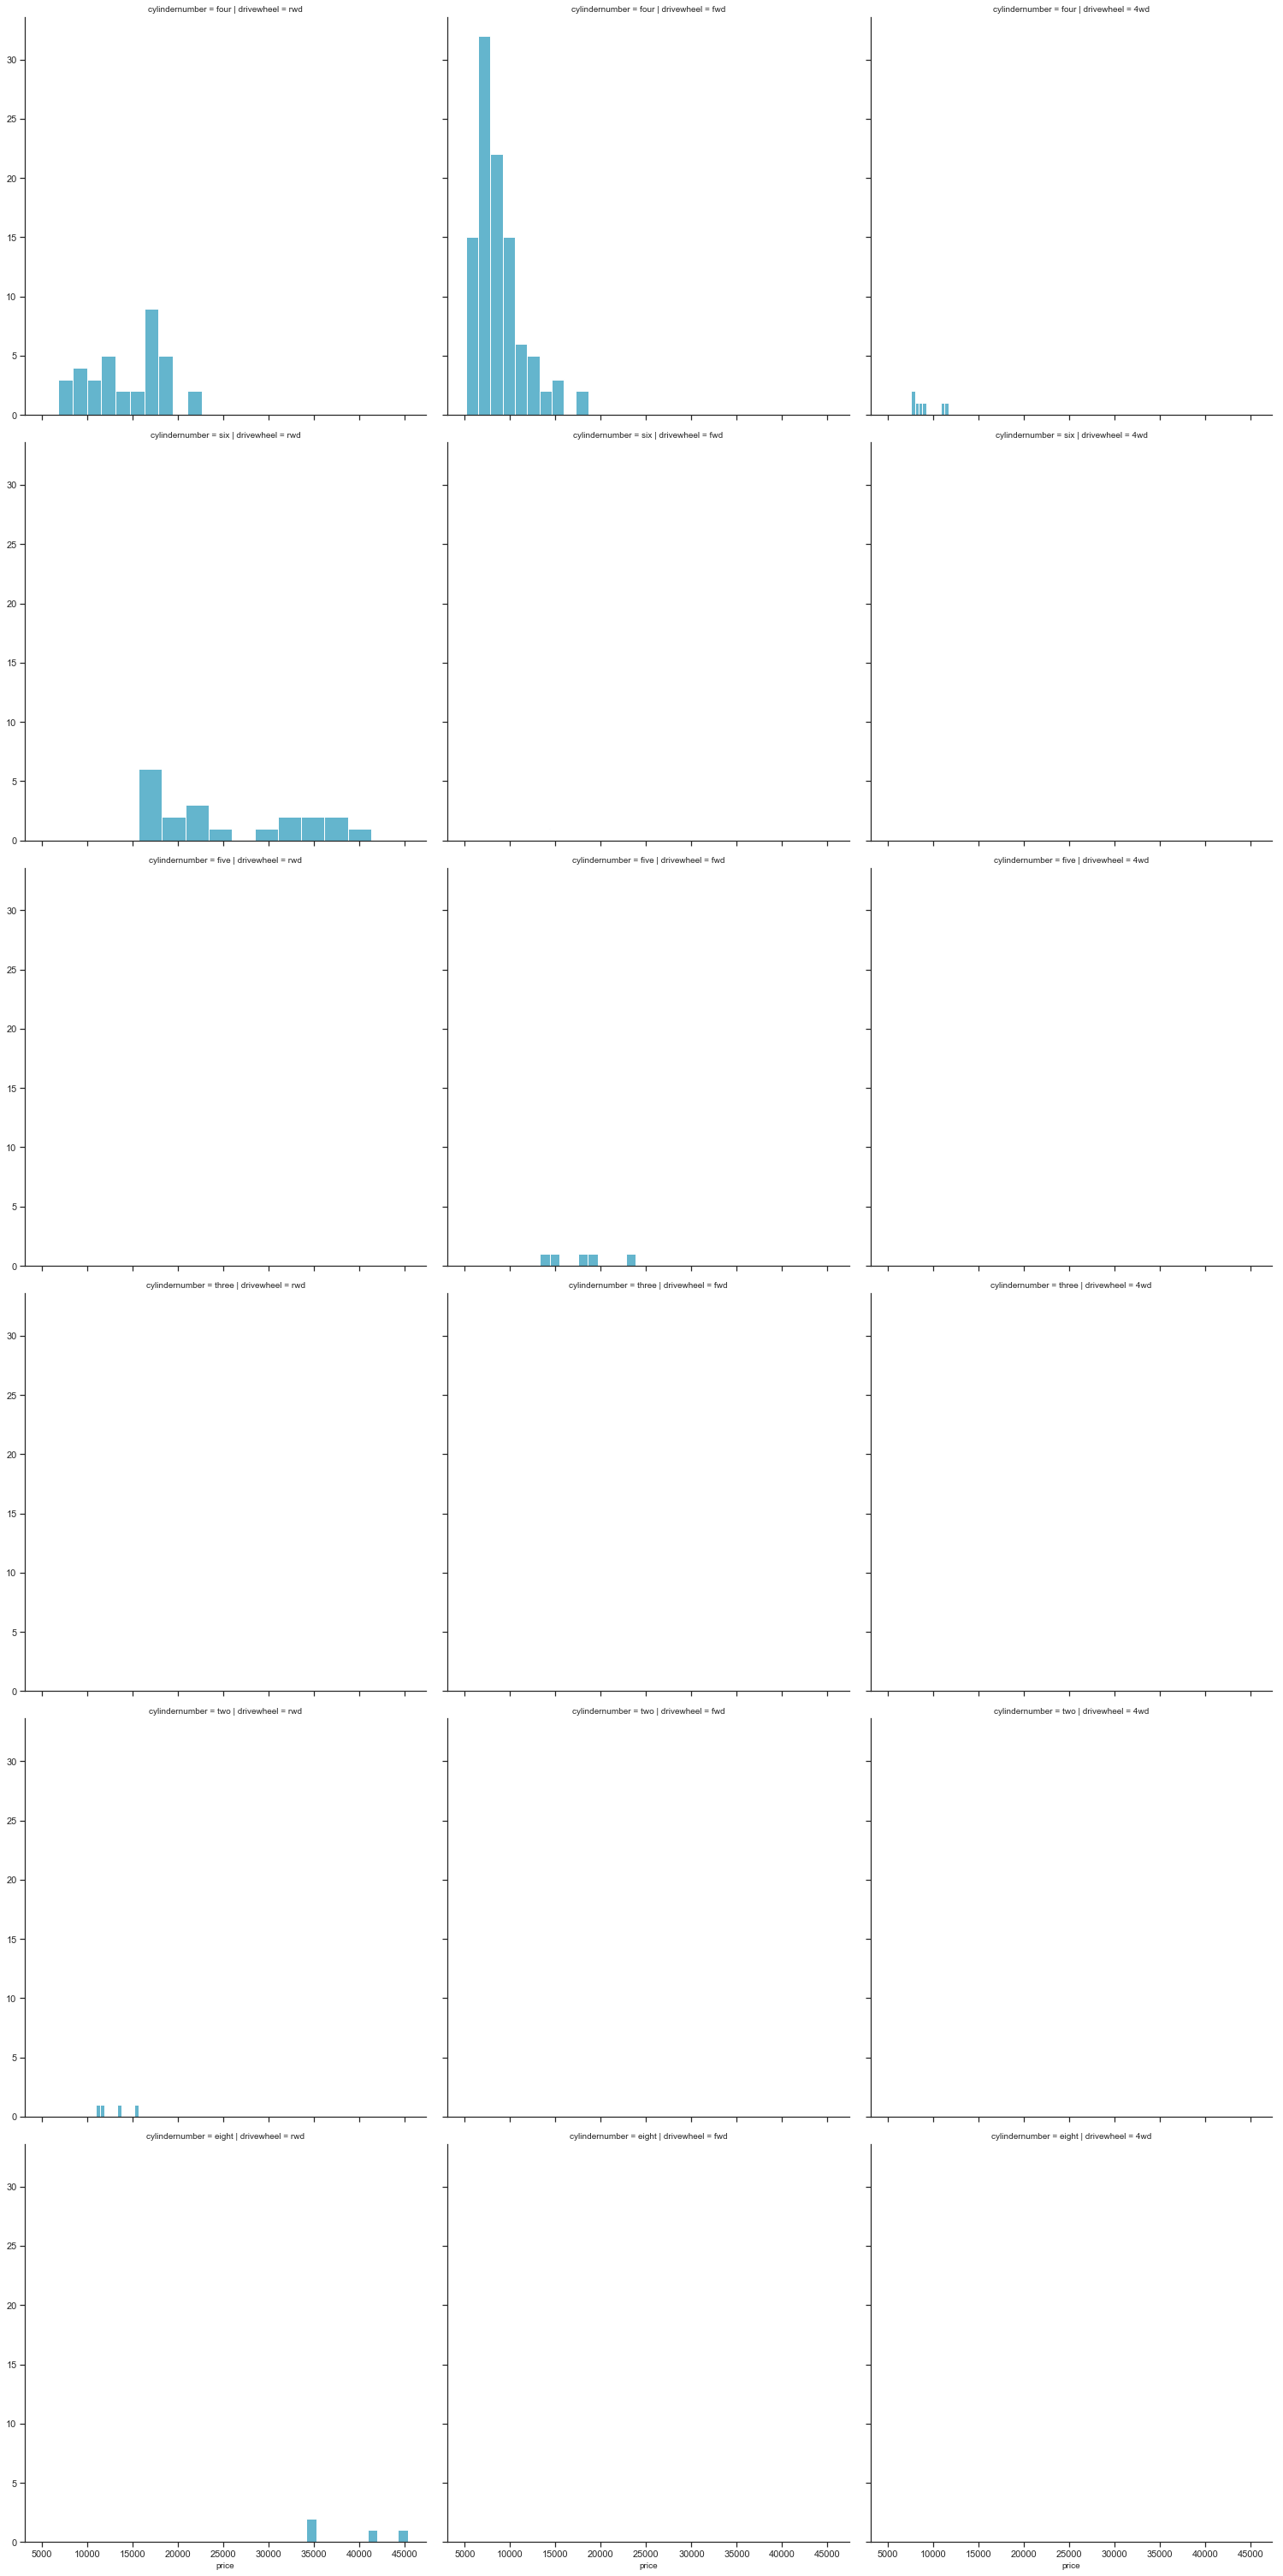

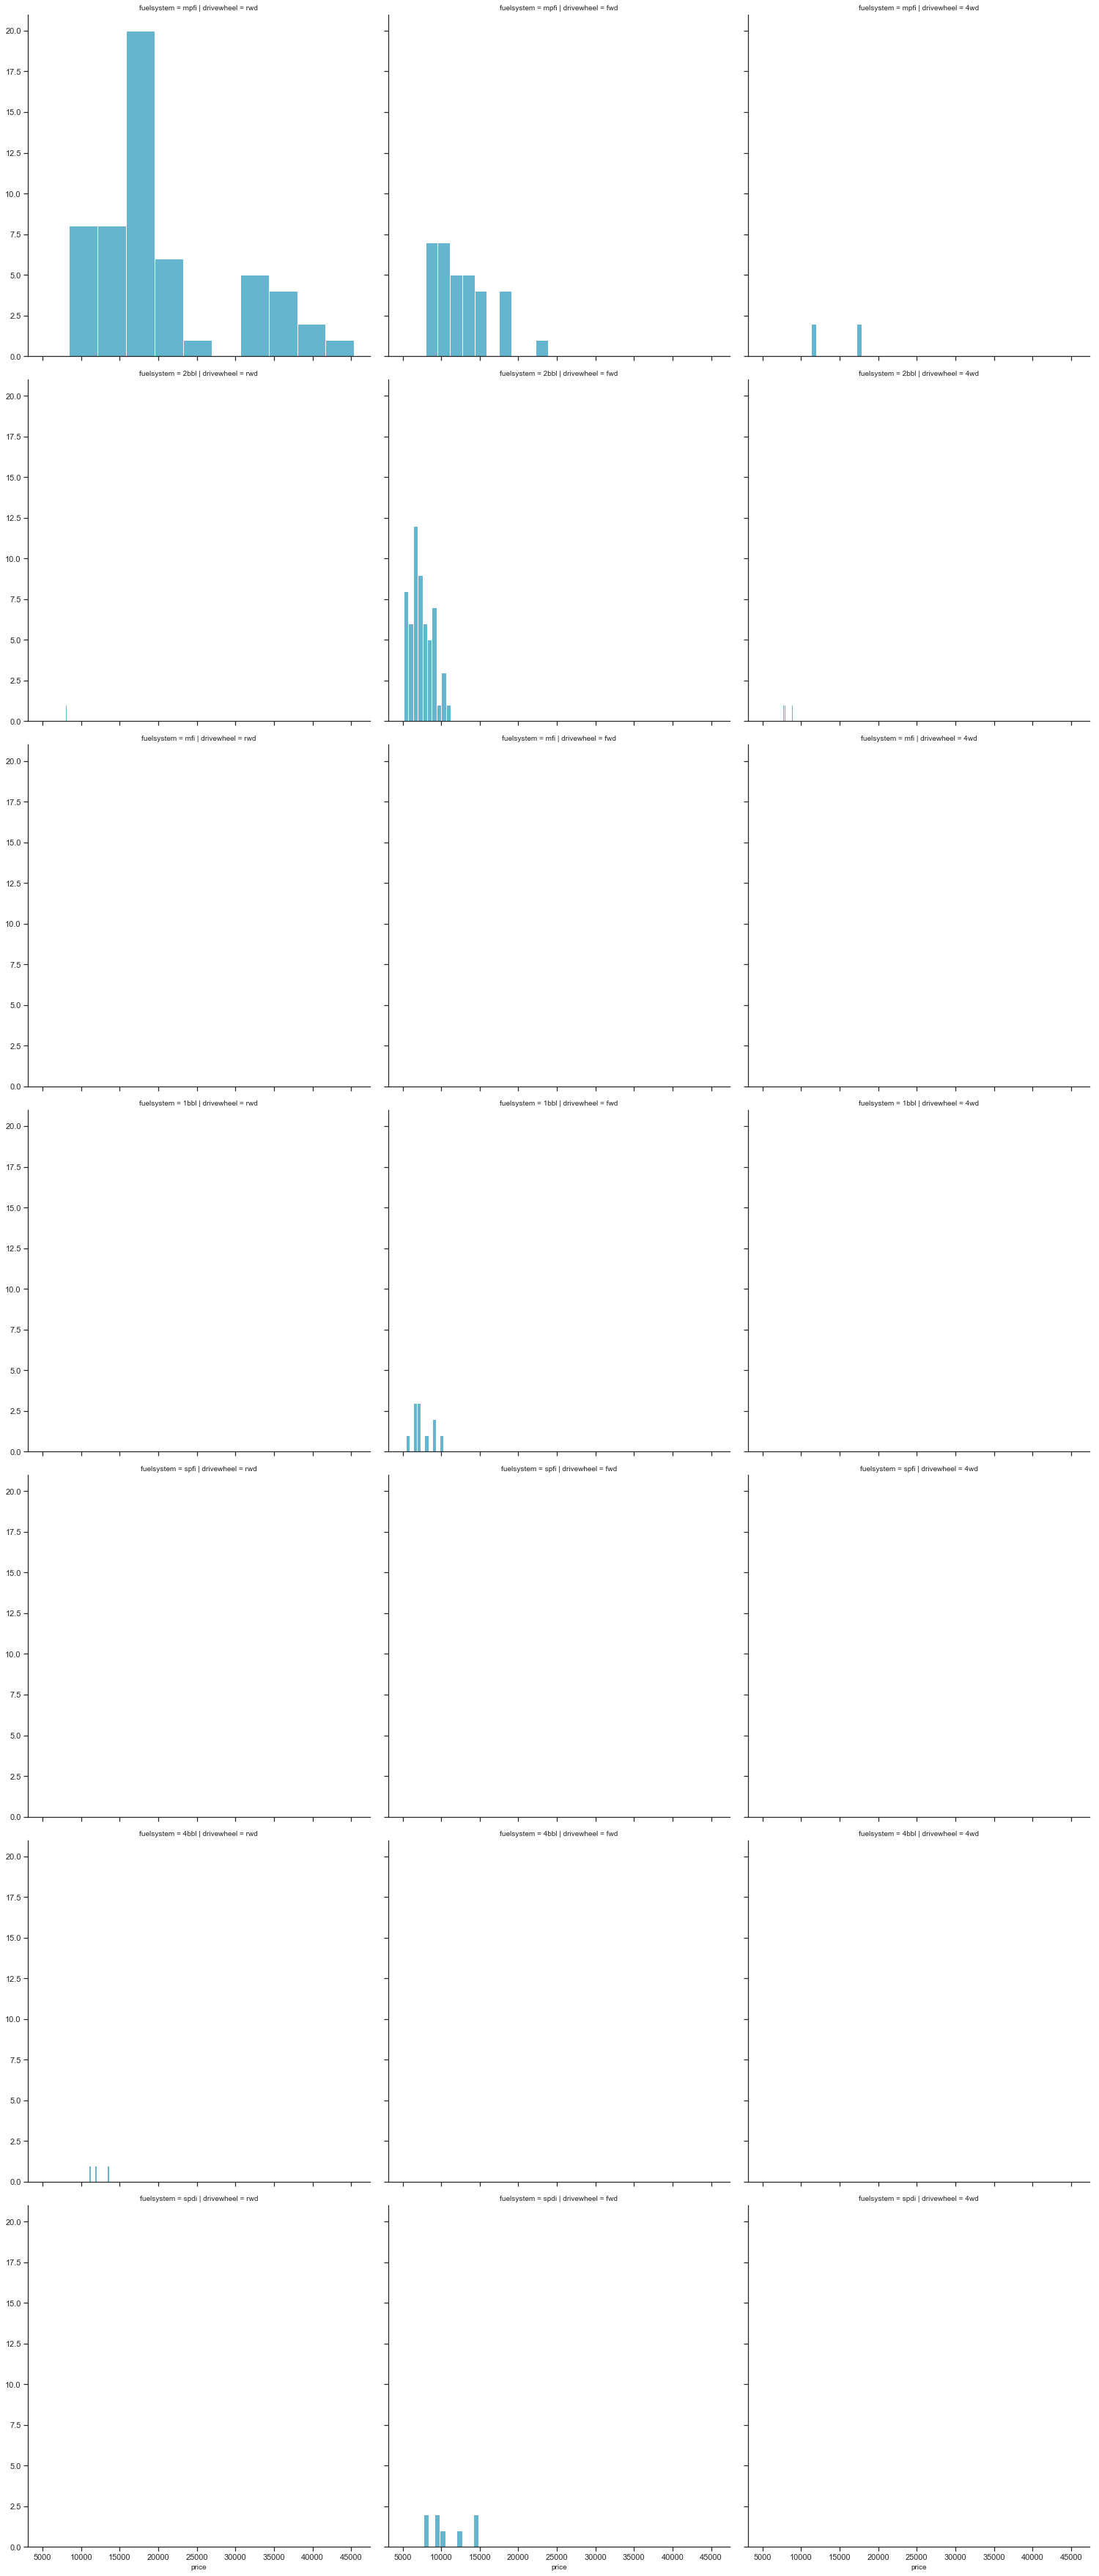

In [22]:
# drivewheel correlation with other categorical variable
categoricalVaraible = ['fueltype','aspiration','doornumber','carbody','enginelocation',
                       'enginetype','cylindernumber','fuelsystem']

#Plotting FacetGrid
for cols in categoricalVaraible:
    g=sns.FacetGrid(dfCarPrice, col="drivewheel", row=cols, height=7)
    g.map(plt.hist, "price", color="c")


> <font color=Navy>
    <b> 5.2.6. enginelocation correlation with other categorical variable </b> <br>
  </font>

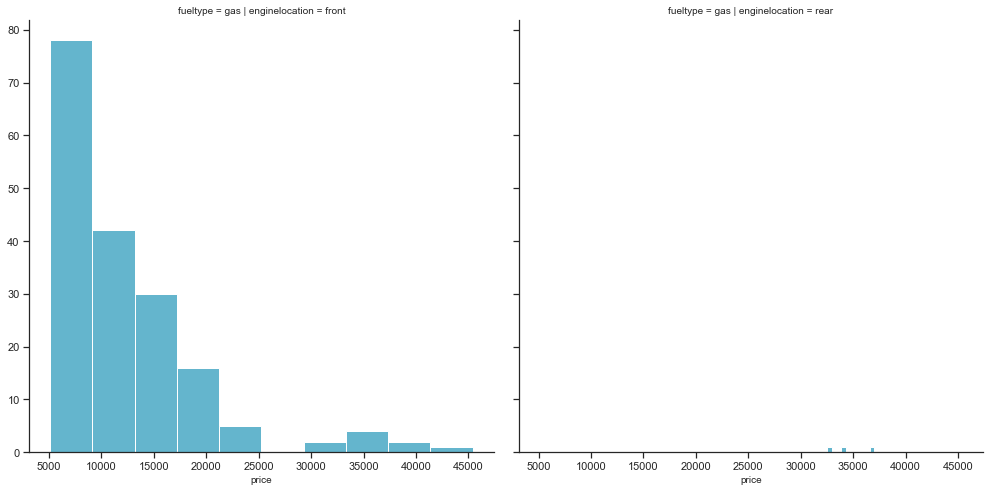

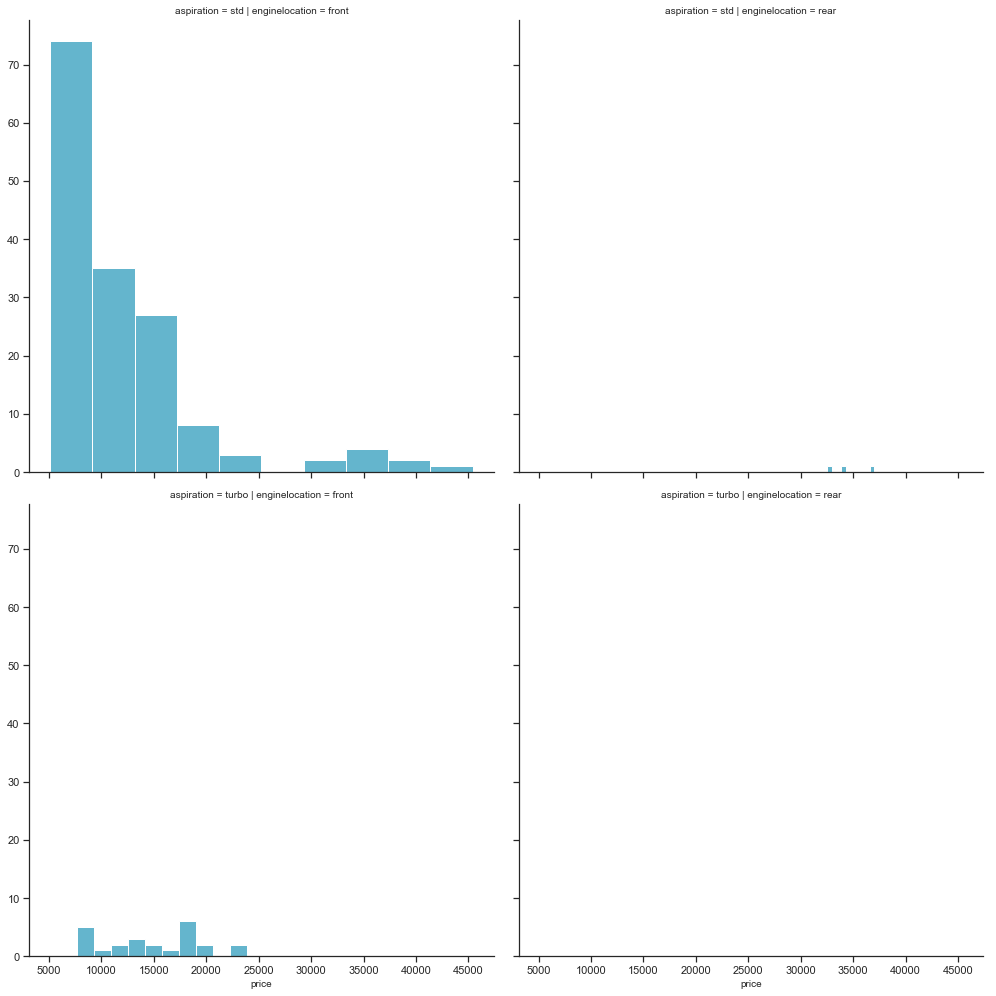

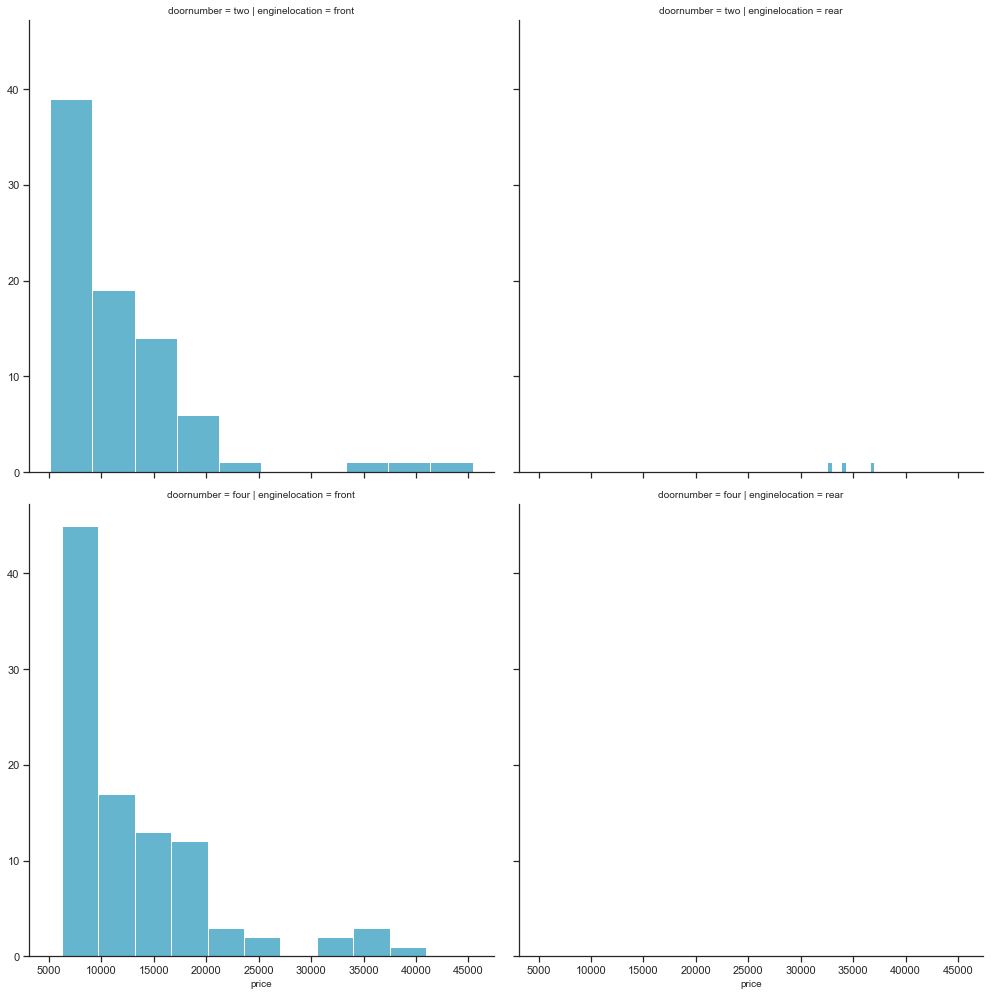

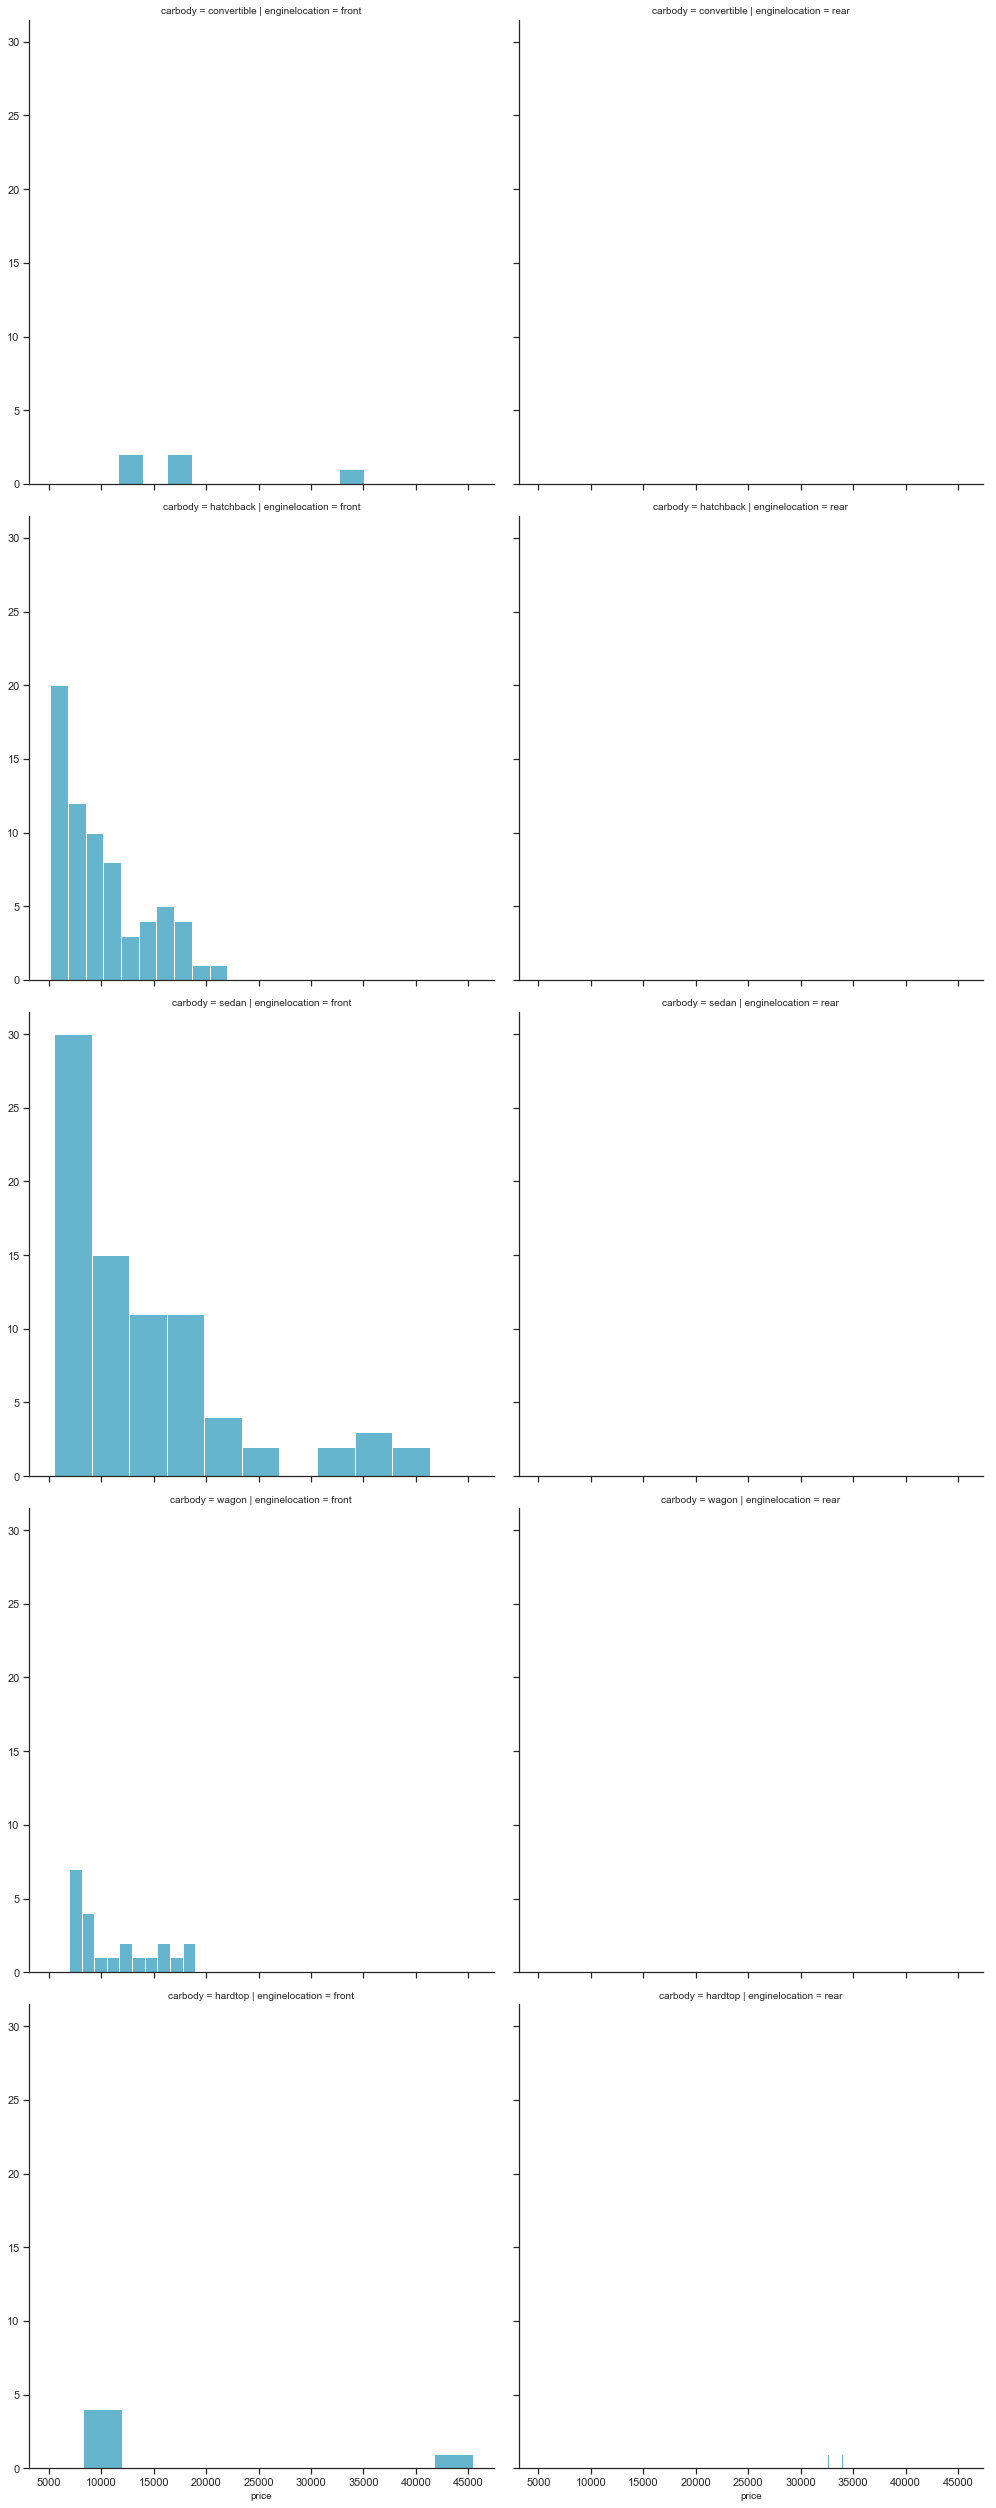

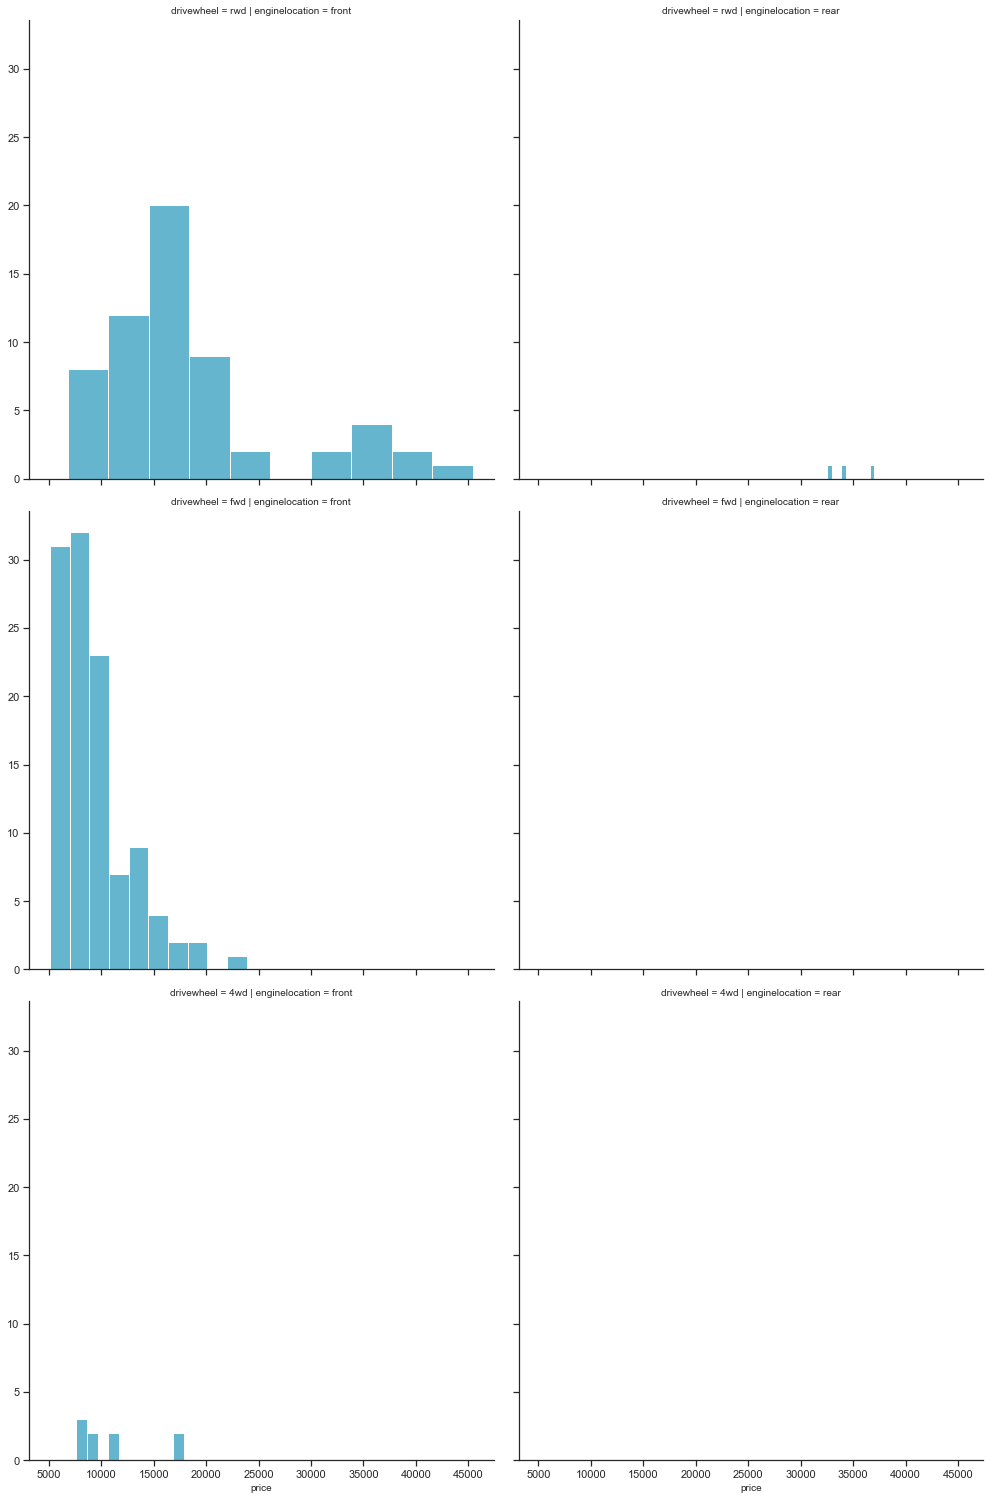

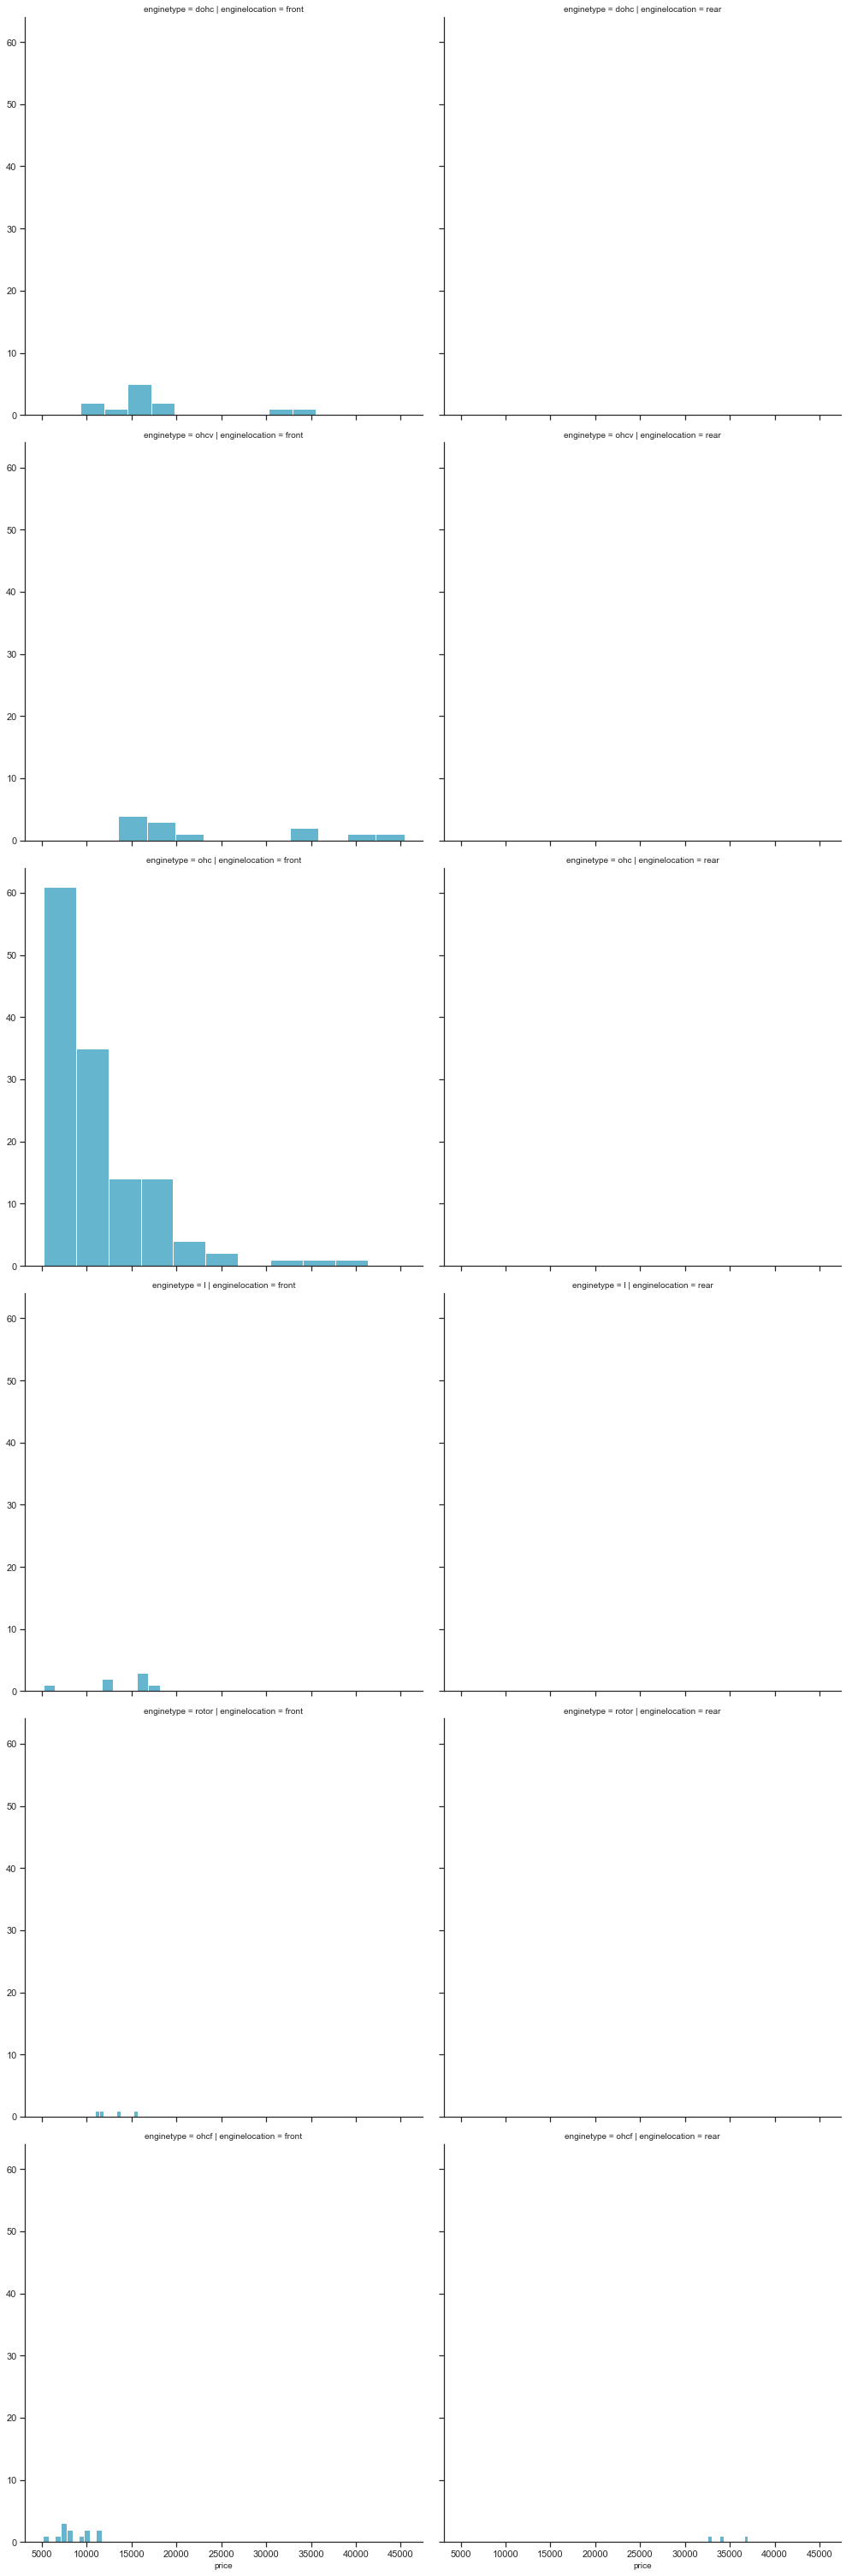

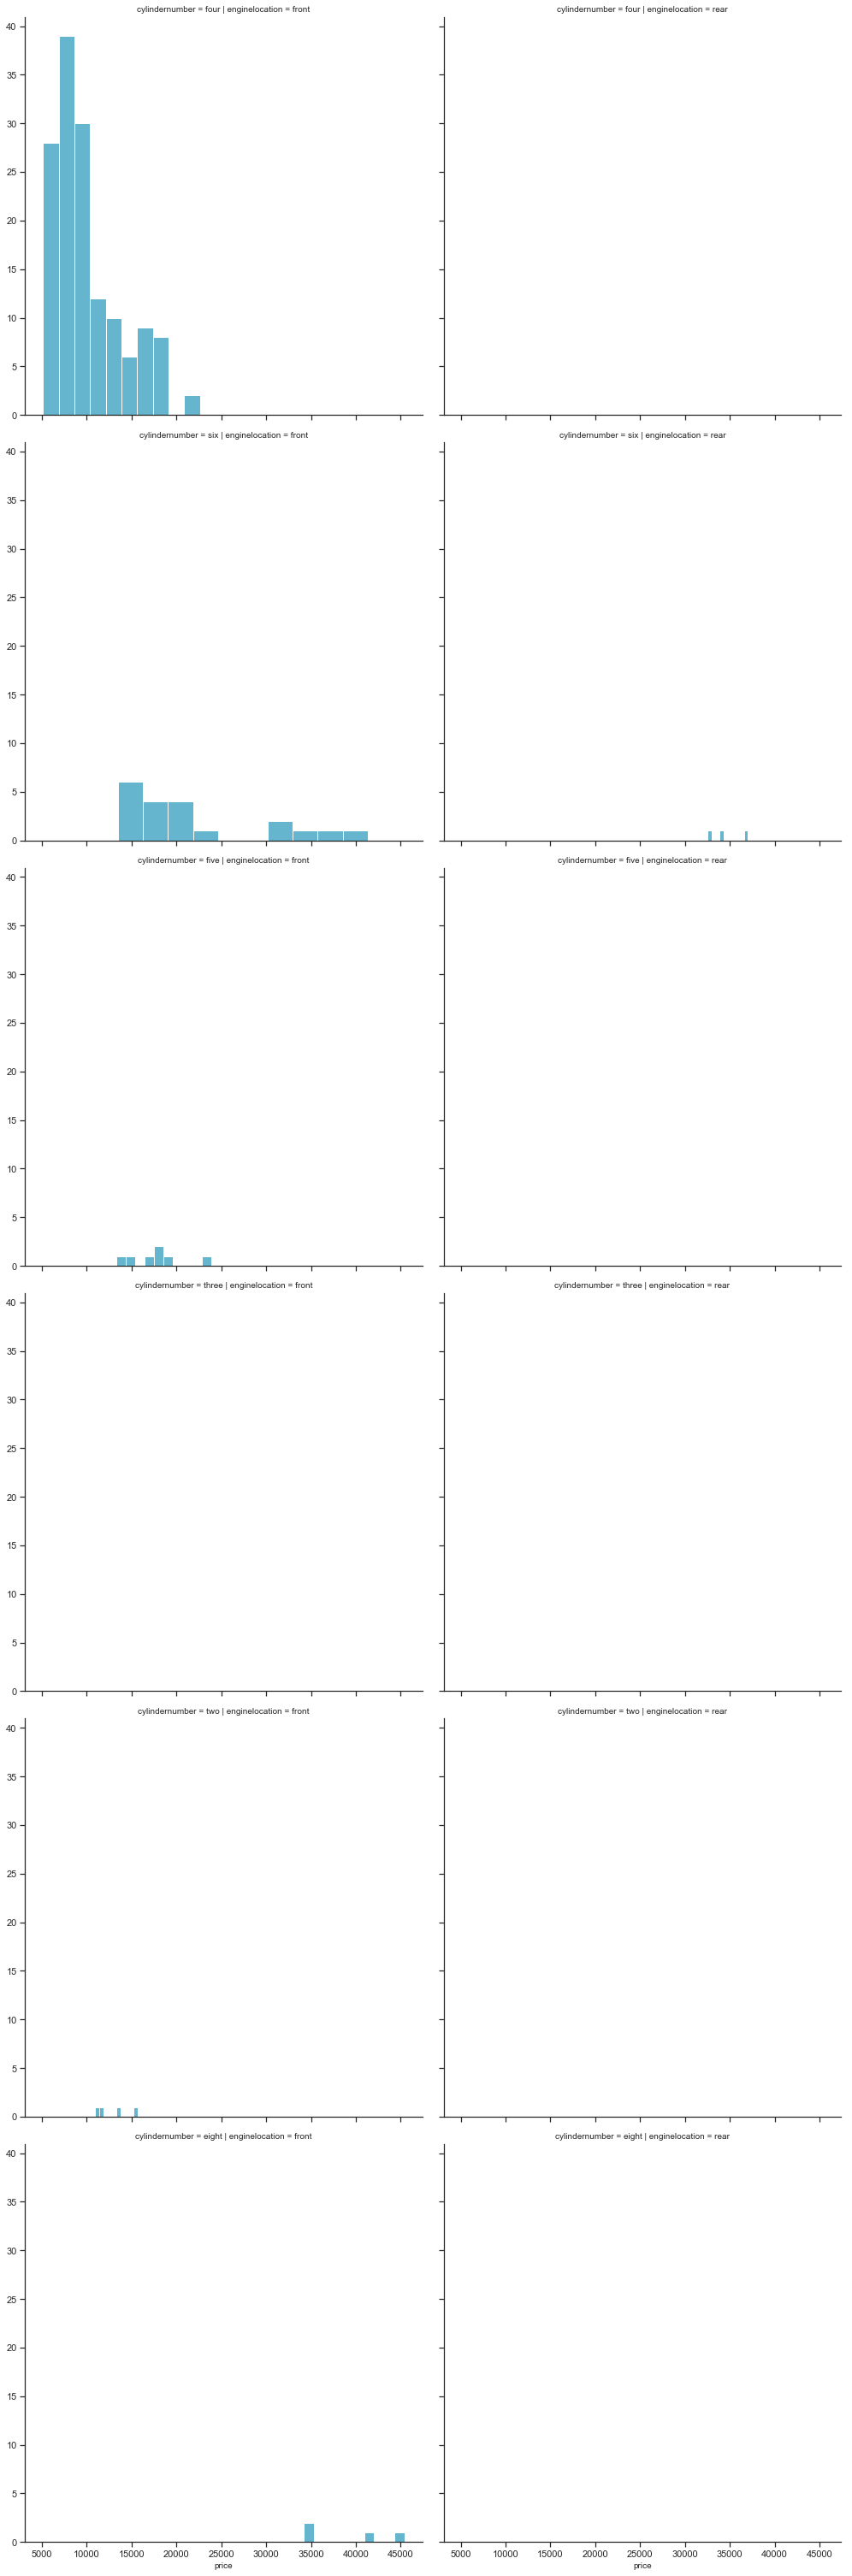

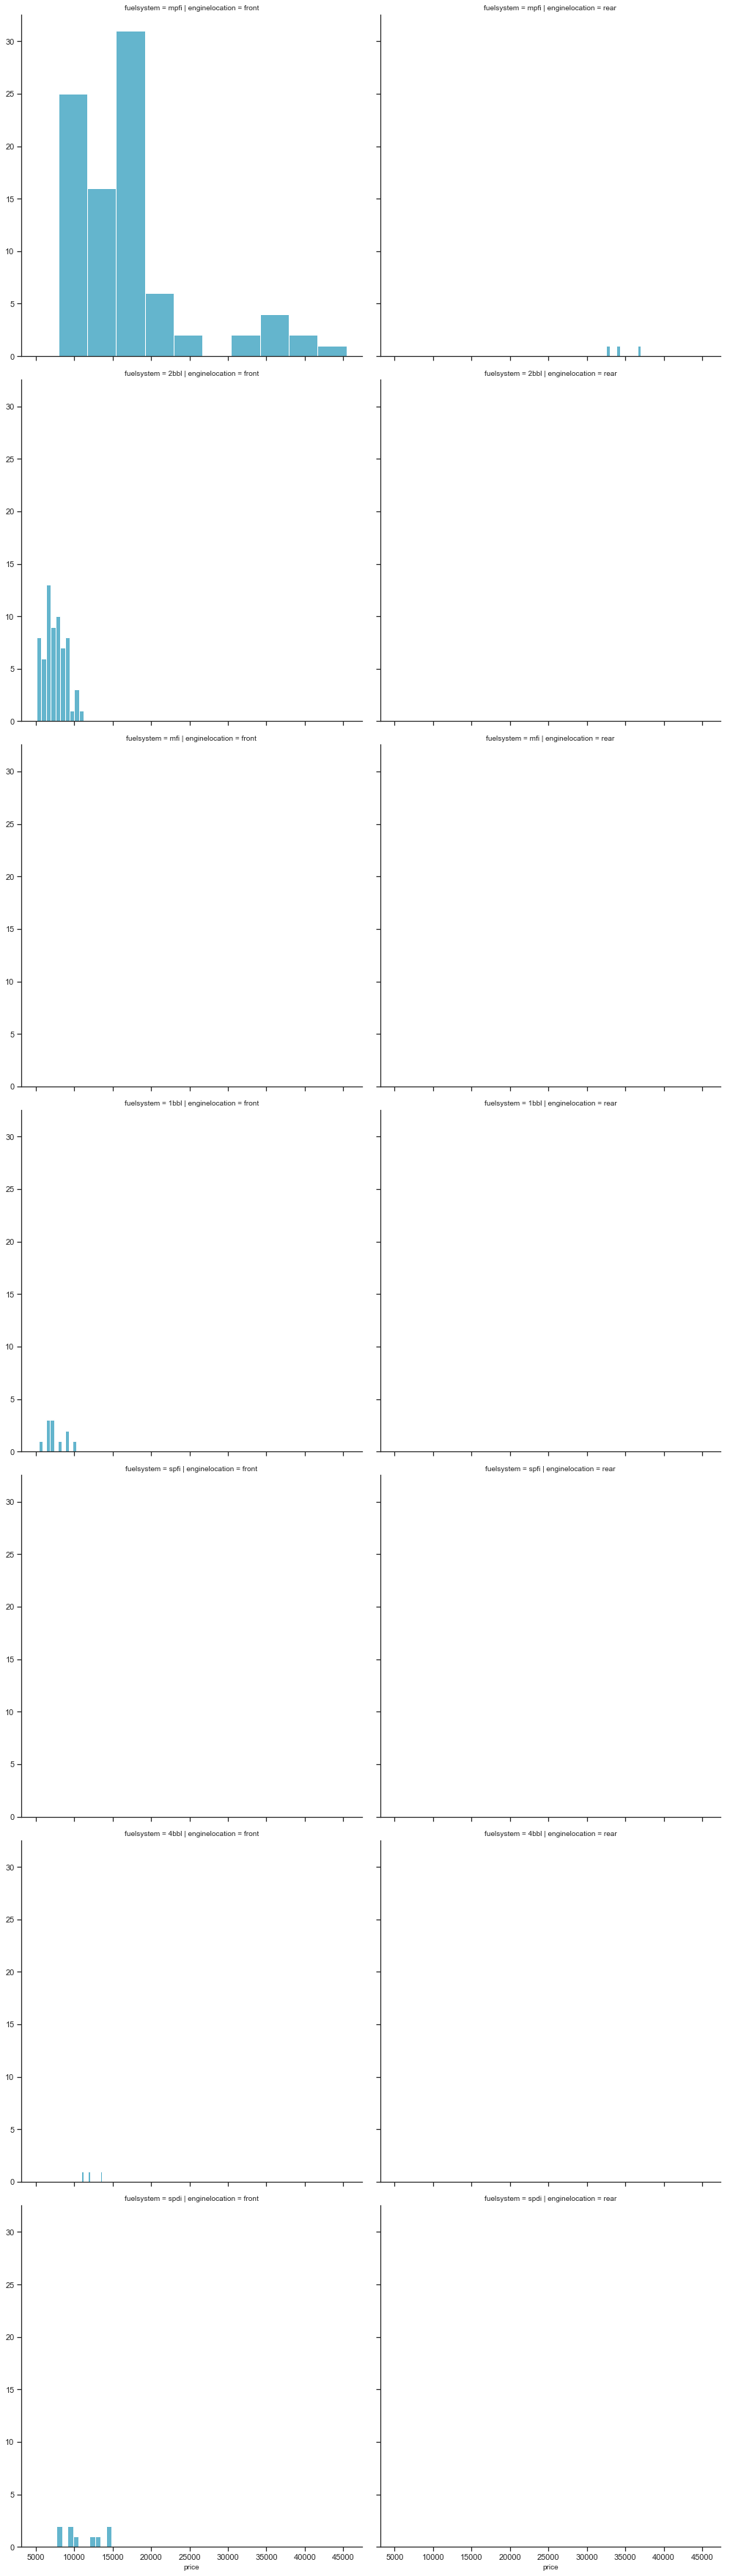

In [23]:
# enginelocation correlation with other categorical variable
categoricalVaraible = ['fueltype','aspiration','doornumber','carbody','drivewheel',
                       'enginetype','cylindernumber','fuelsystem']

#Plotting FacetGrid
for cols in categoricalVaraible:
    g=sns.FacetGrid(dfCarPrice, col="enginelocation", row=cols, height=7)
    g.map(plt.hist, "price", color="c")


> <font color=Navy>
    <b> 5.2.7. enginetype correlation with other categorical variable </b> <br>
  </font>

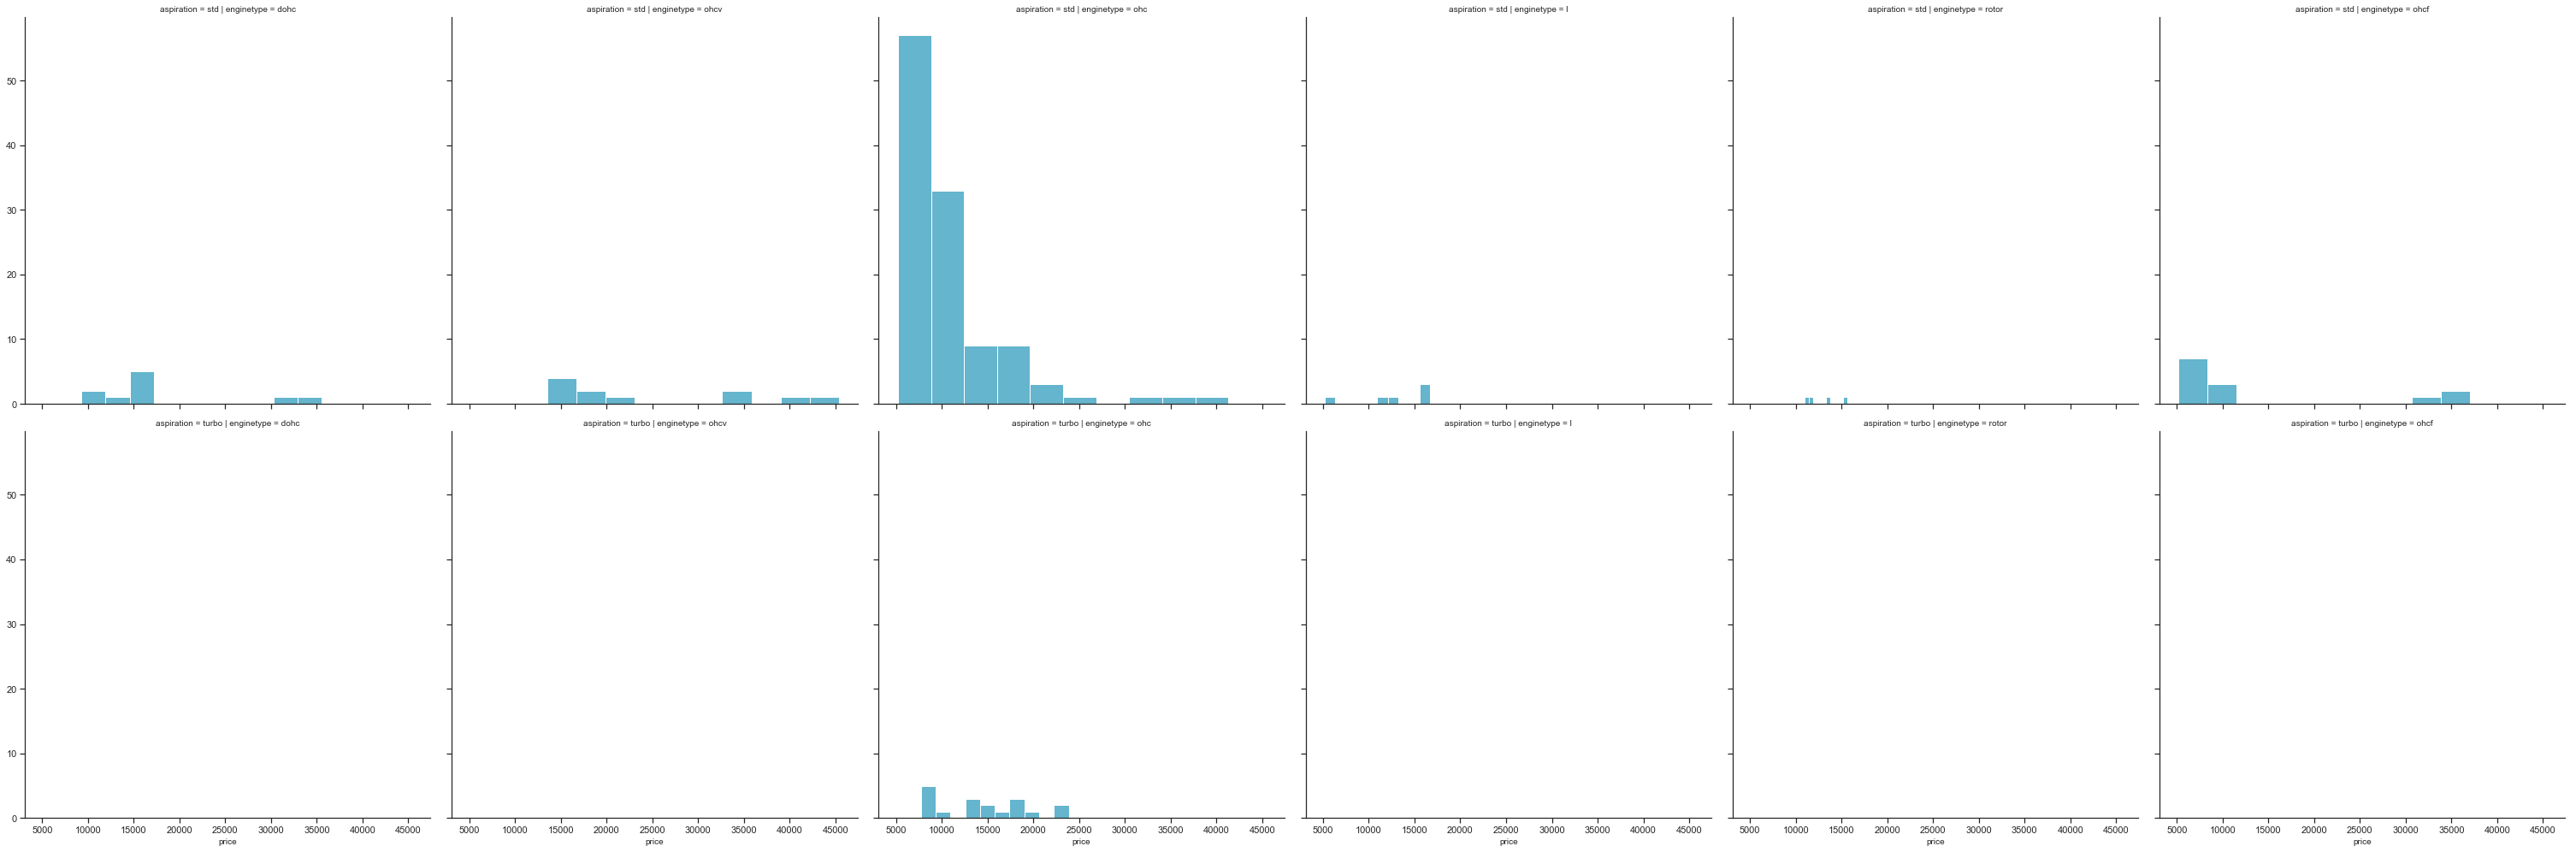

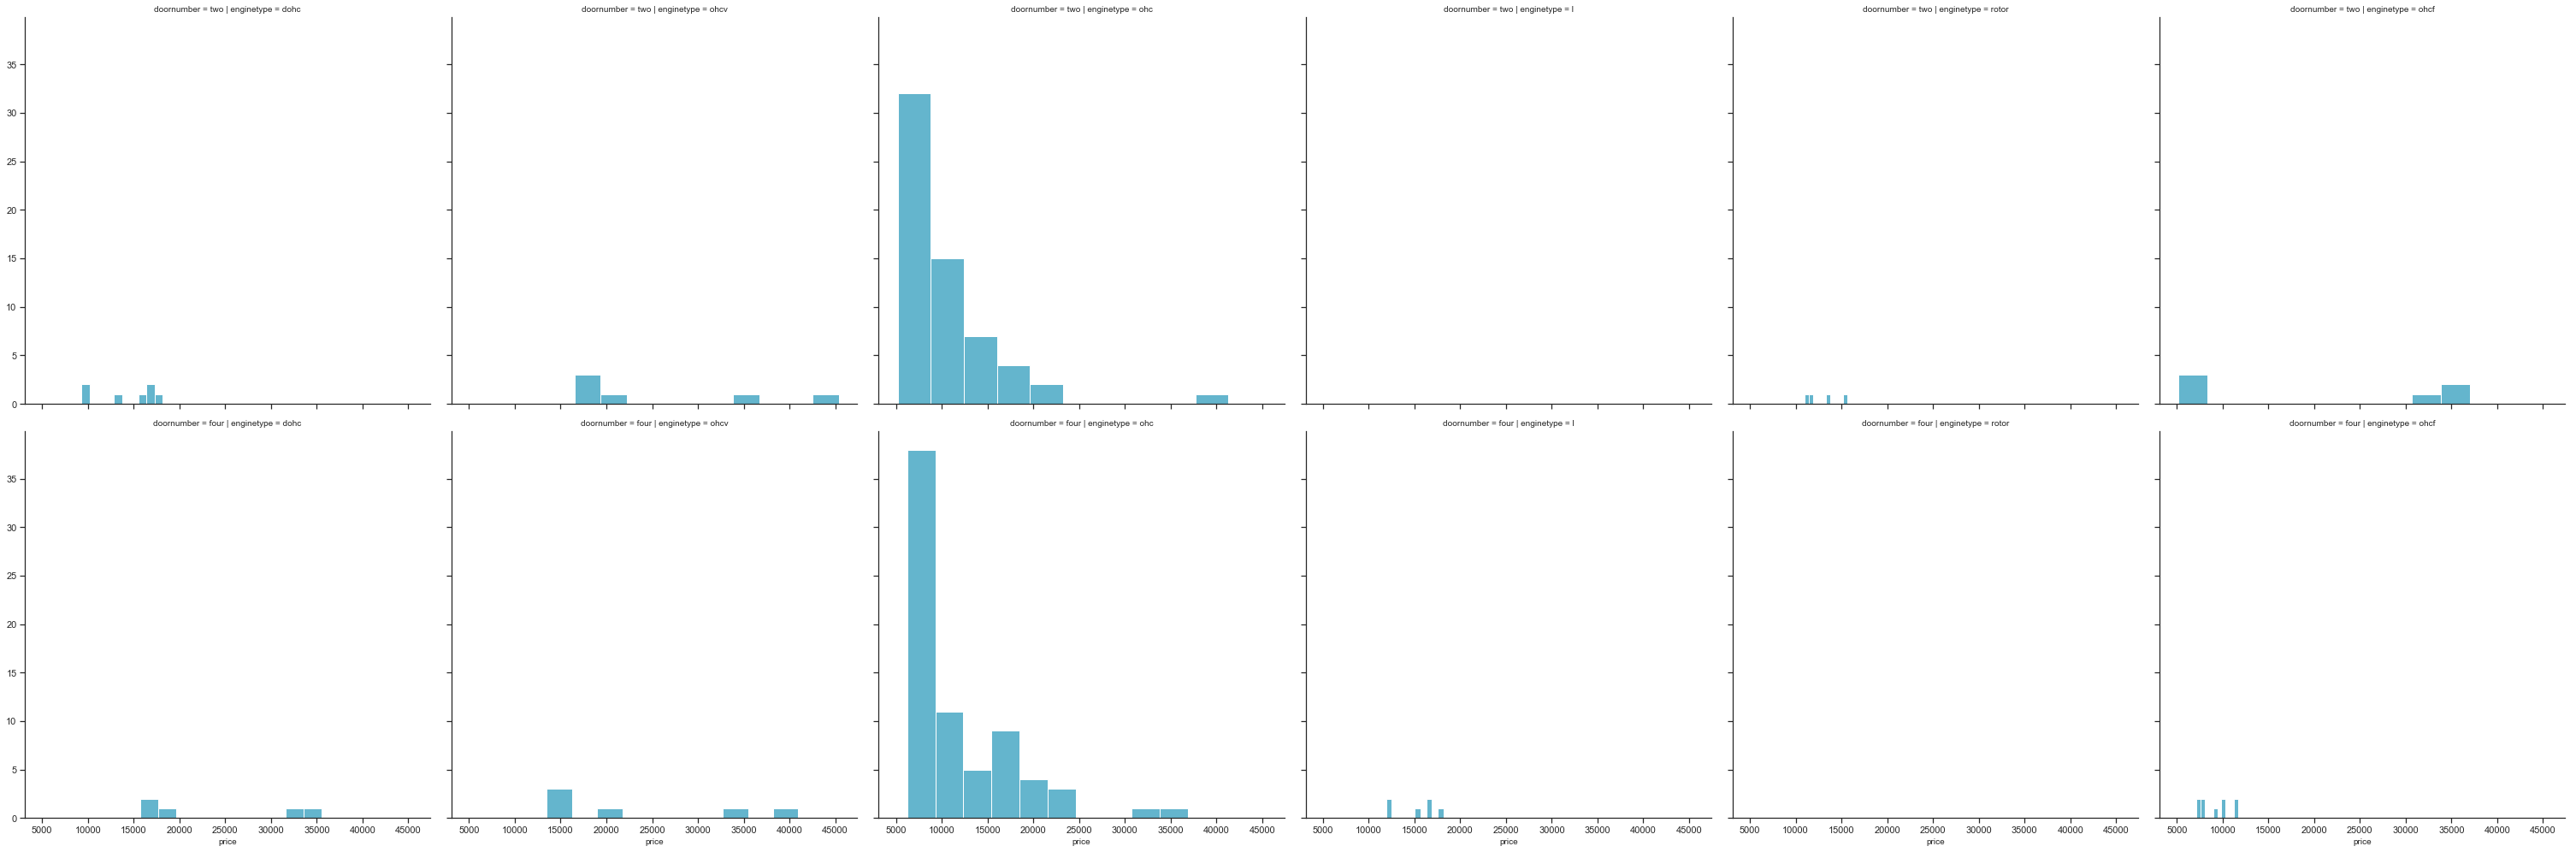

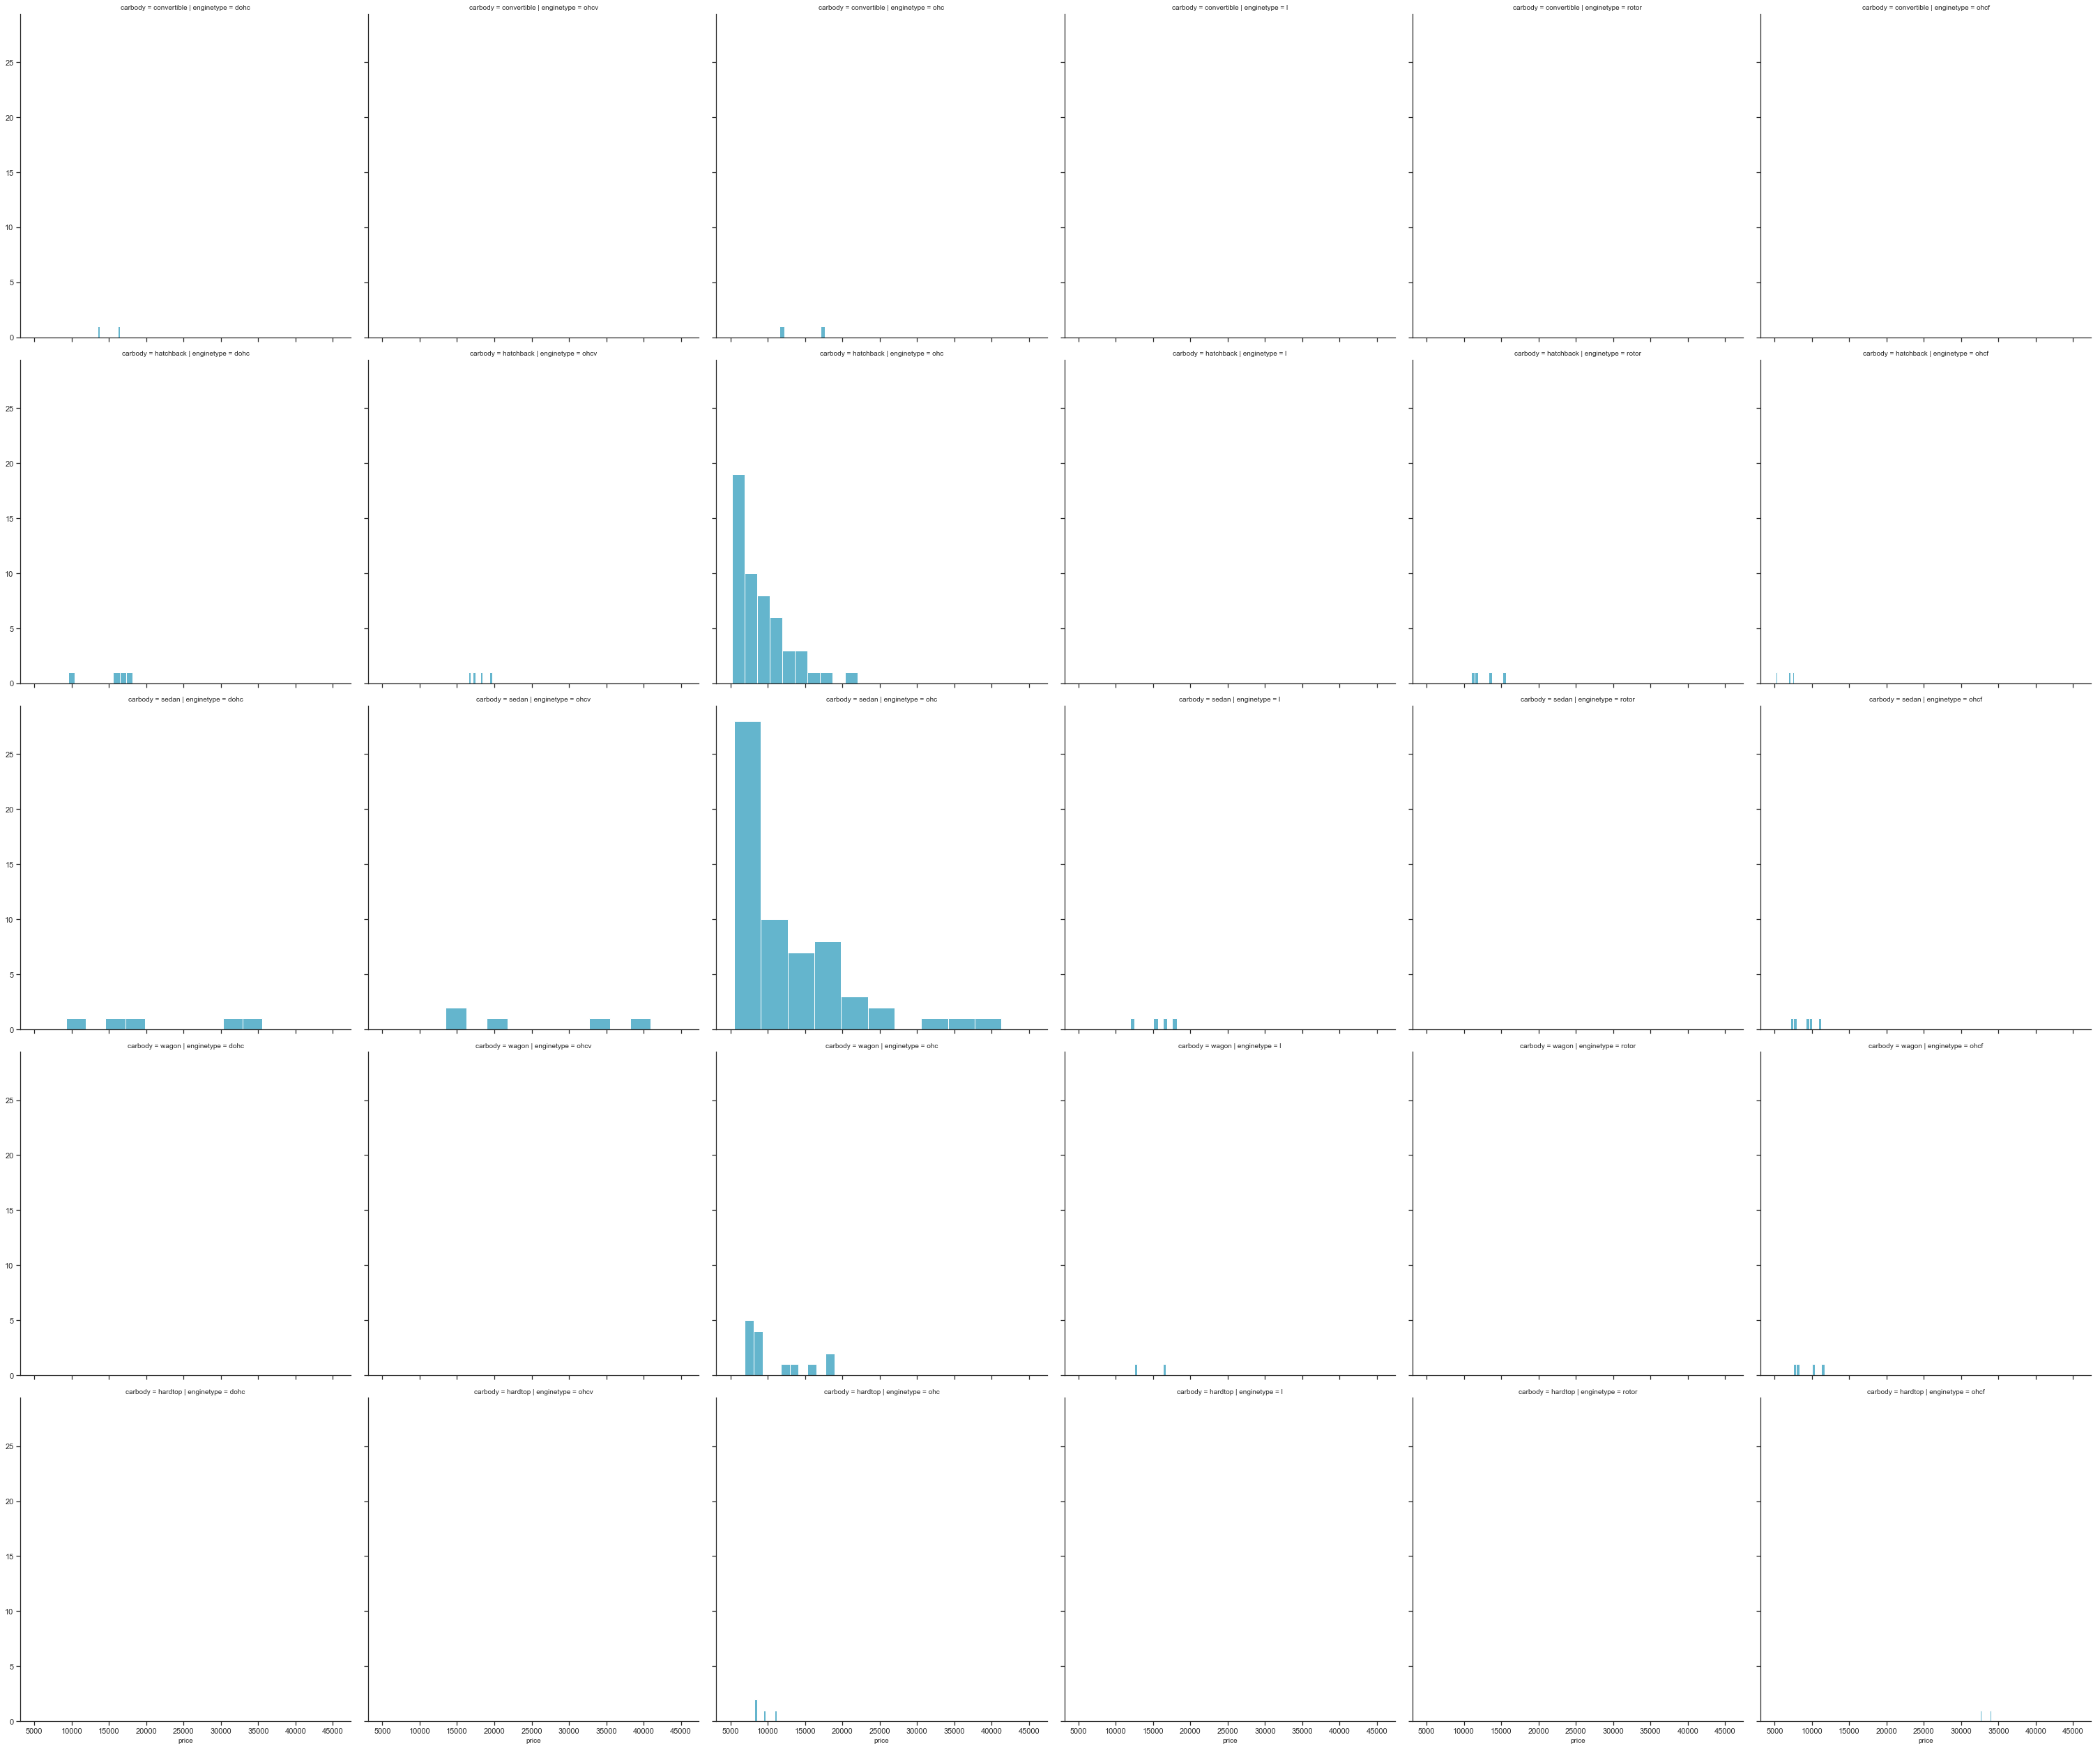

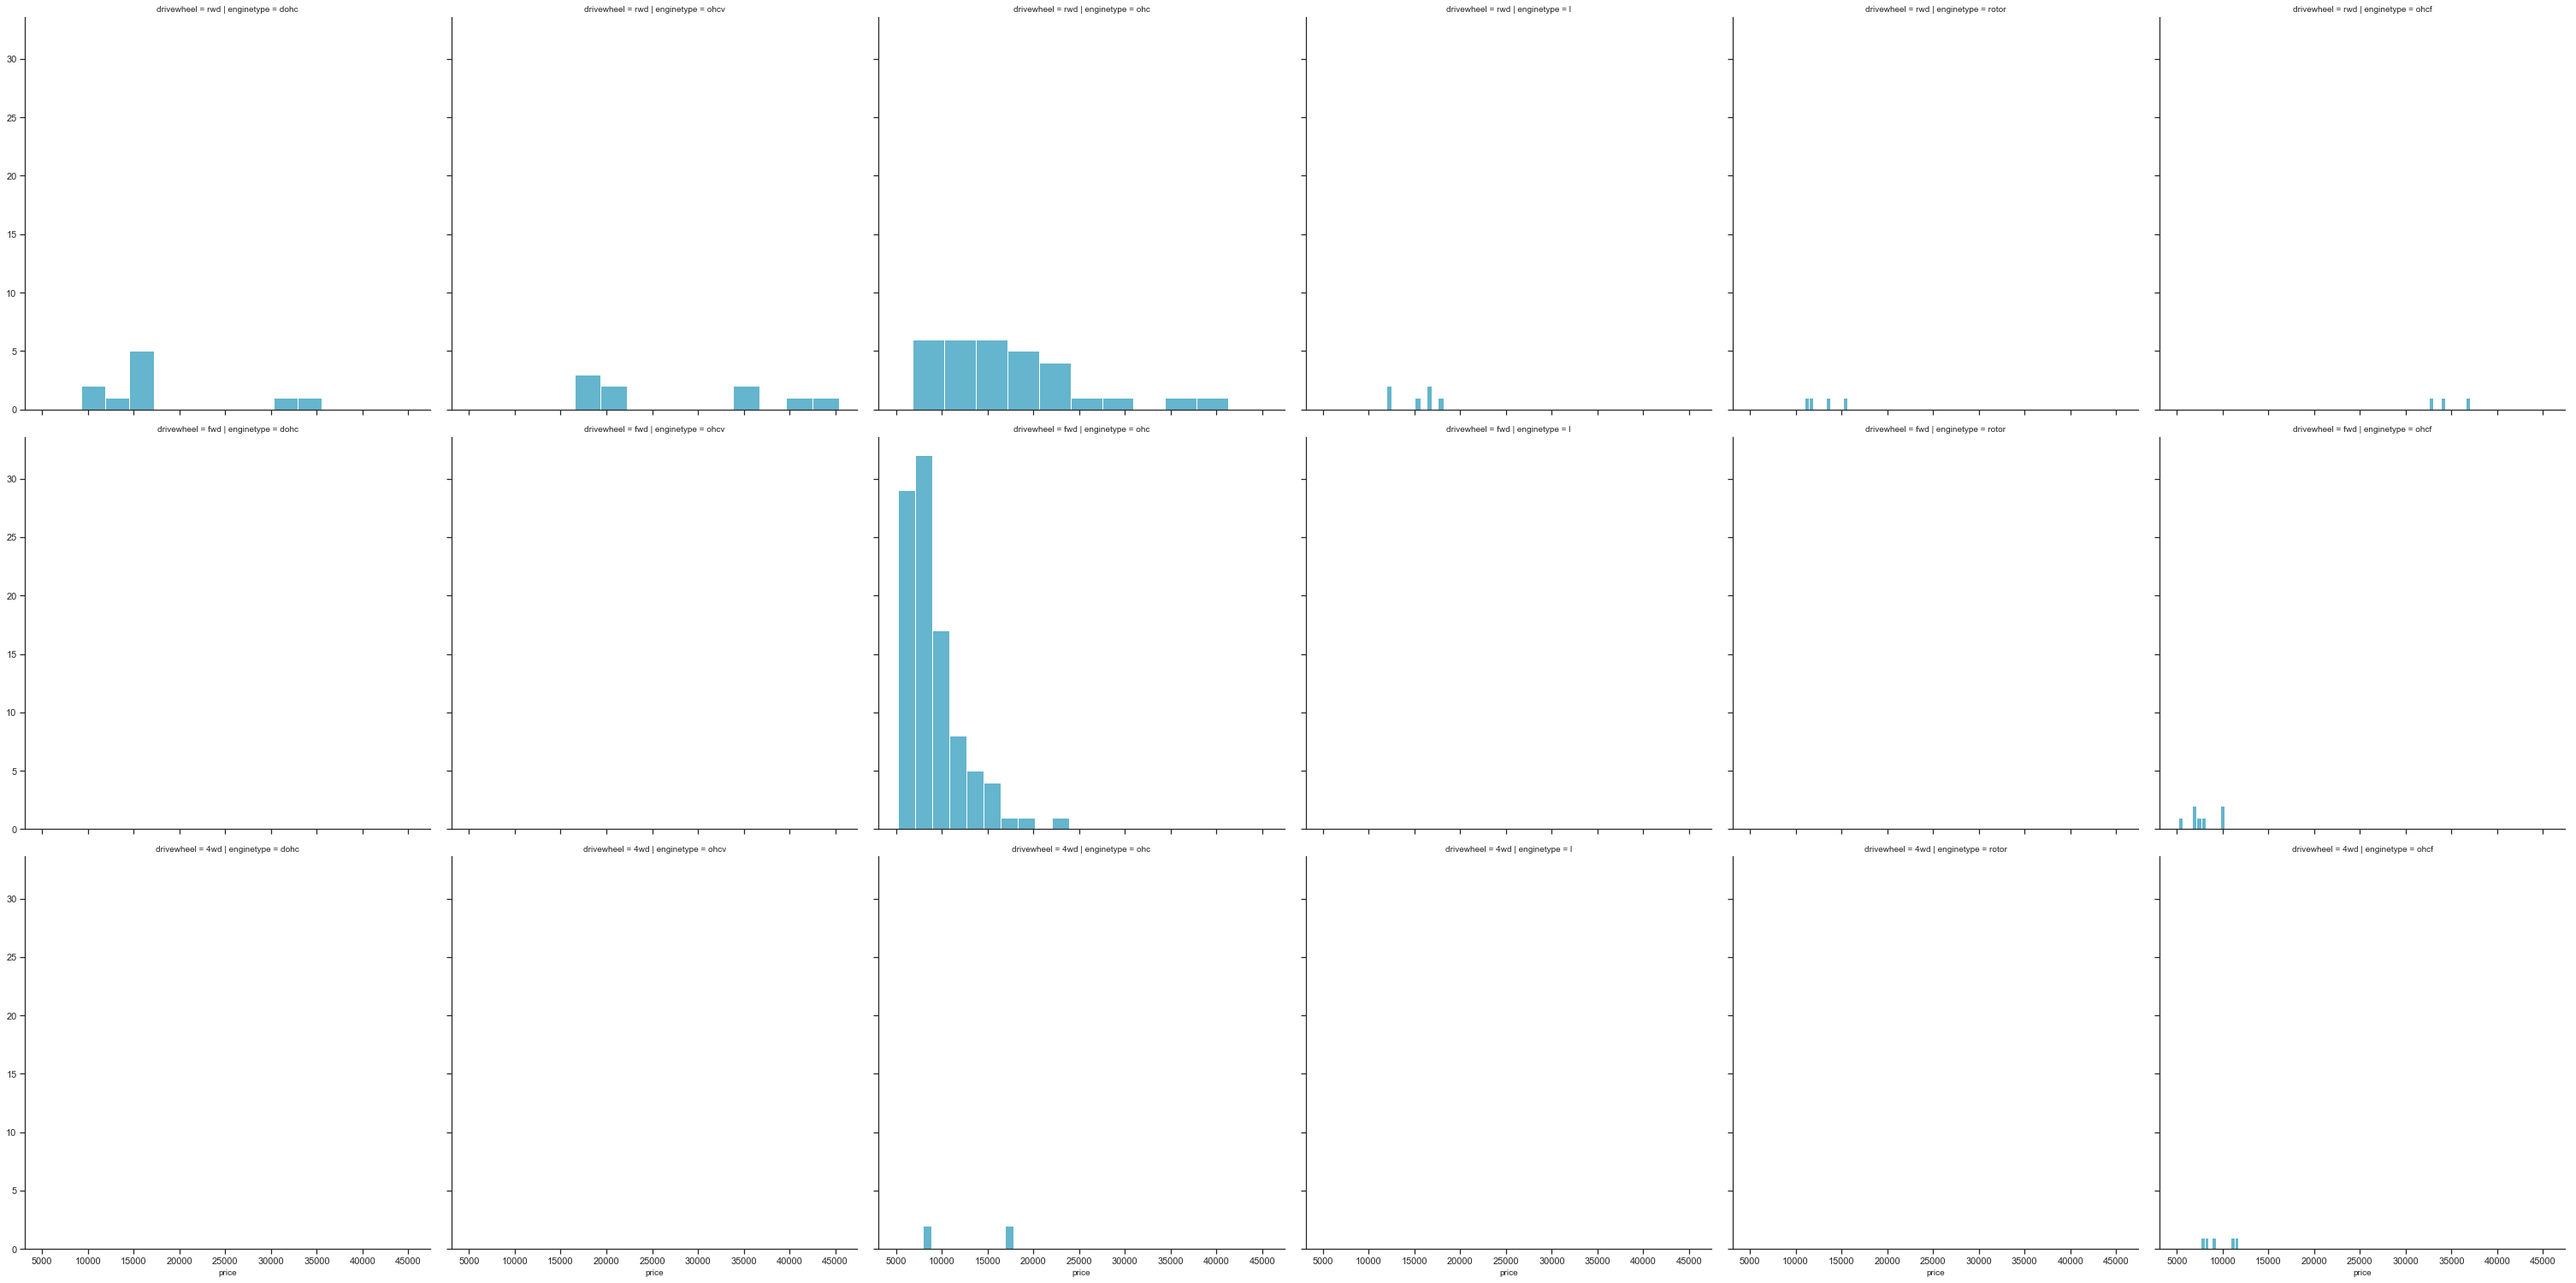

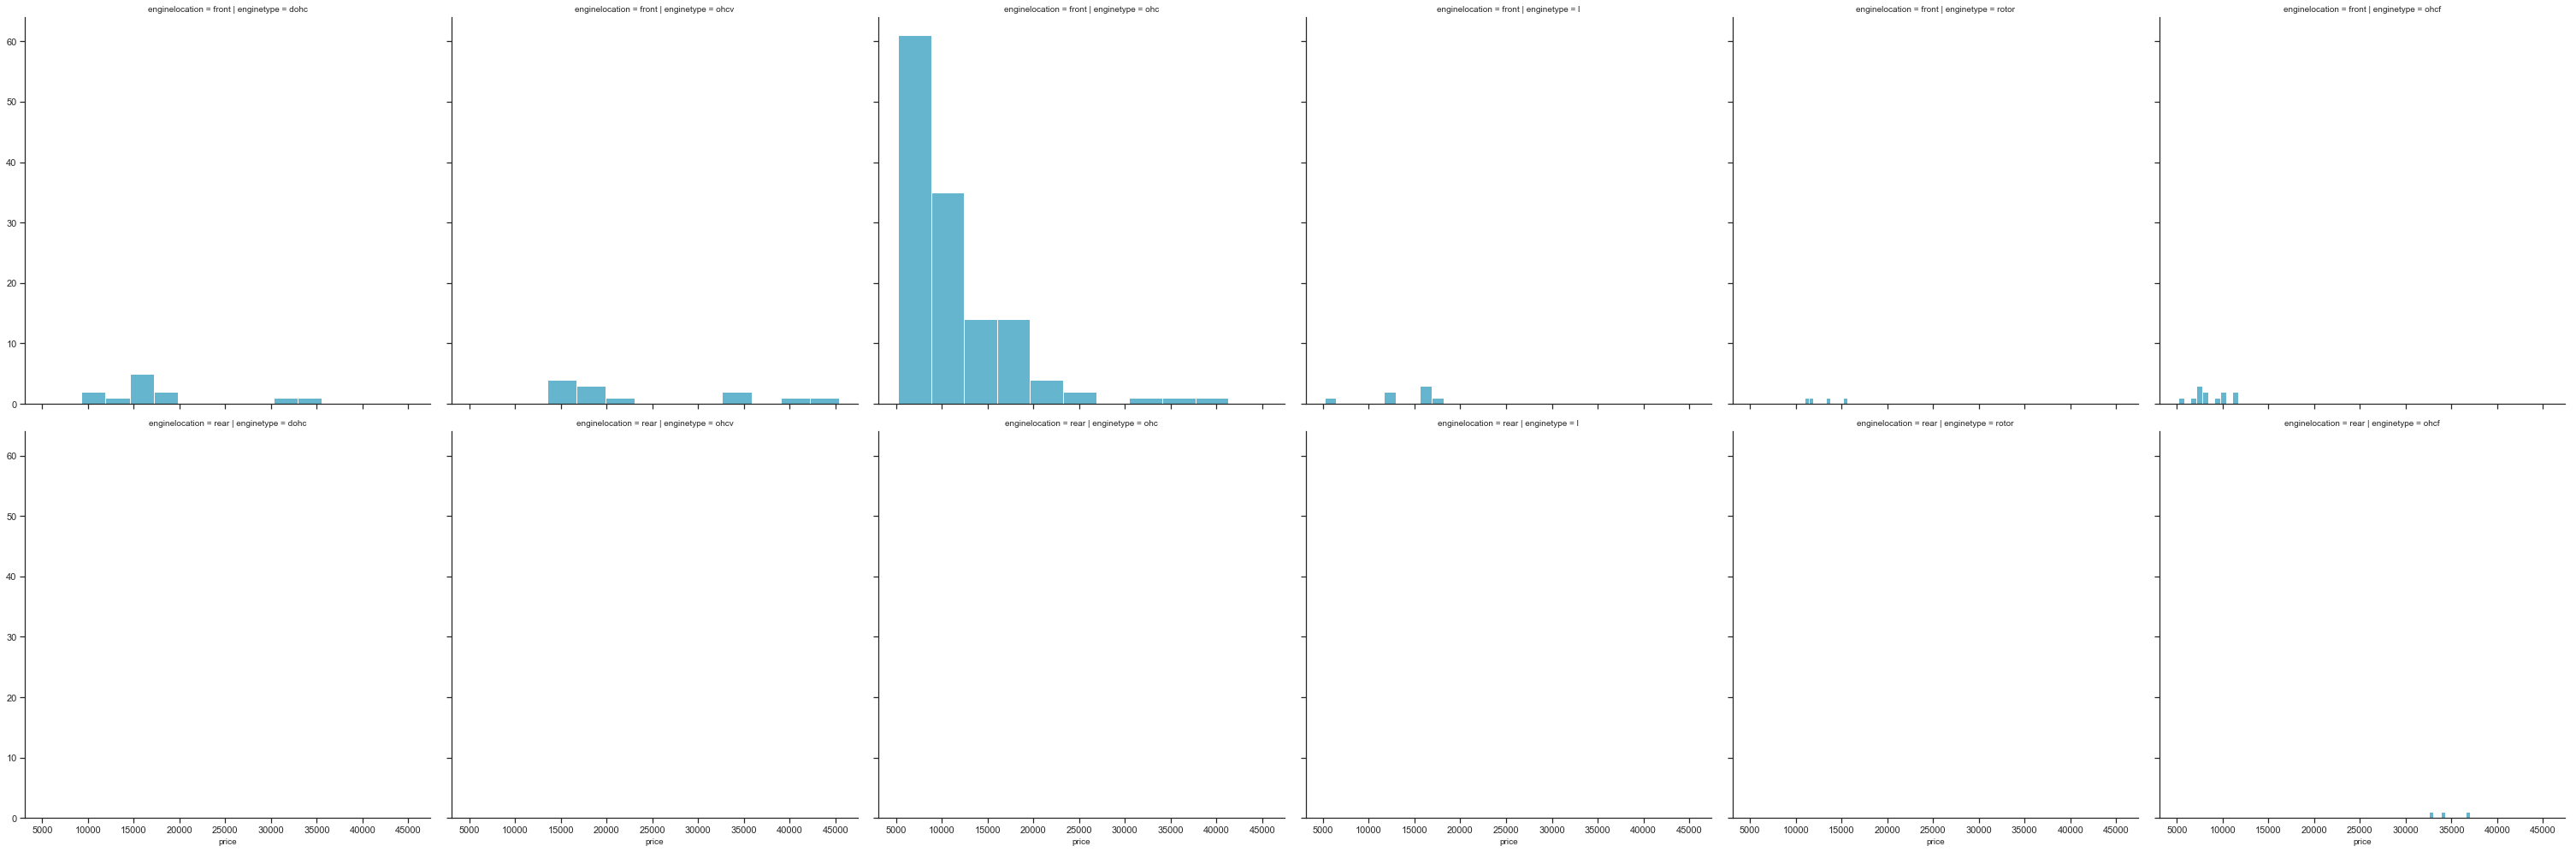

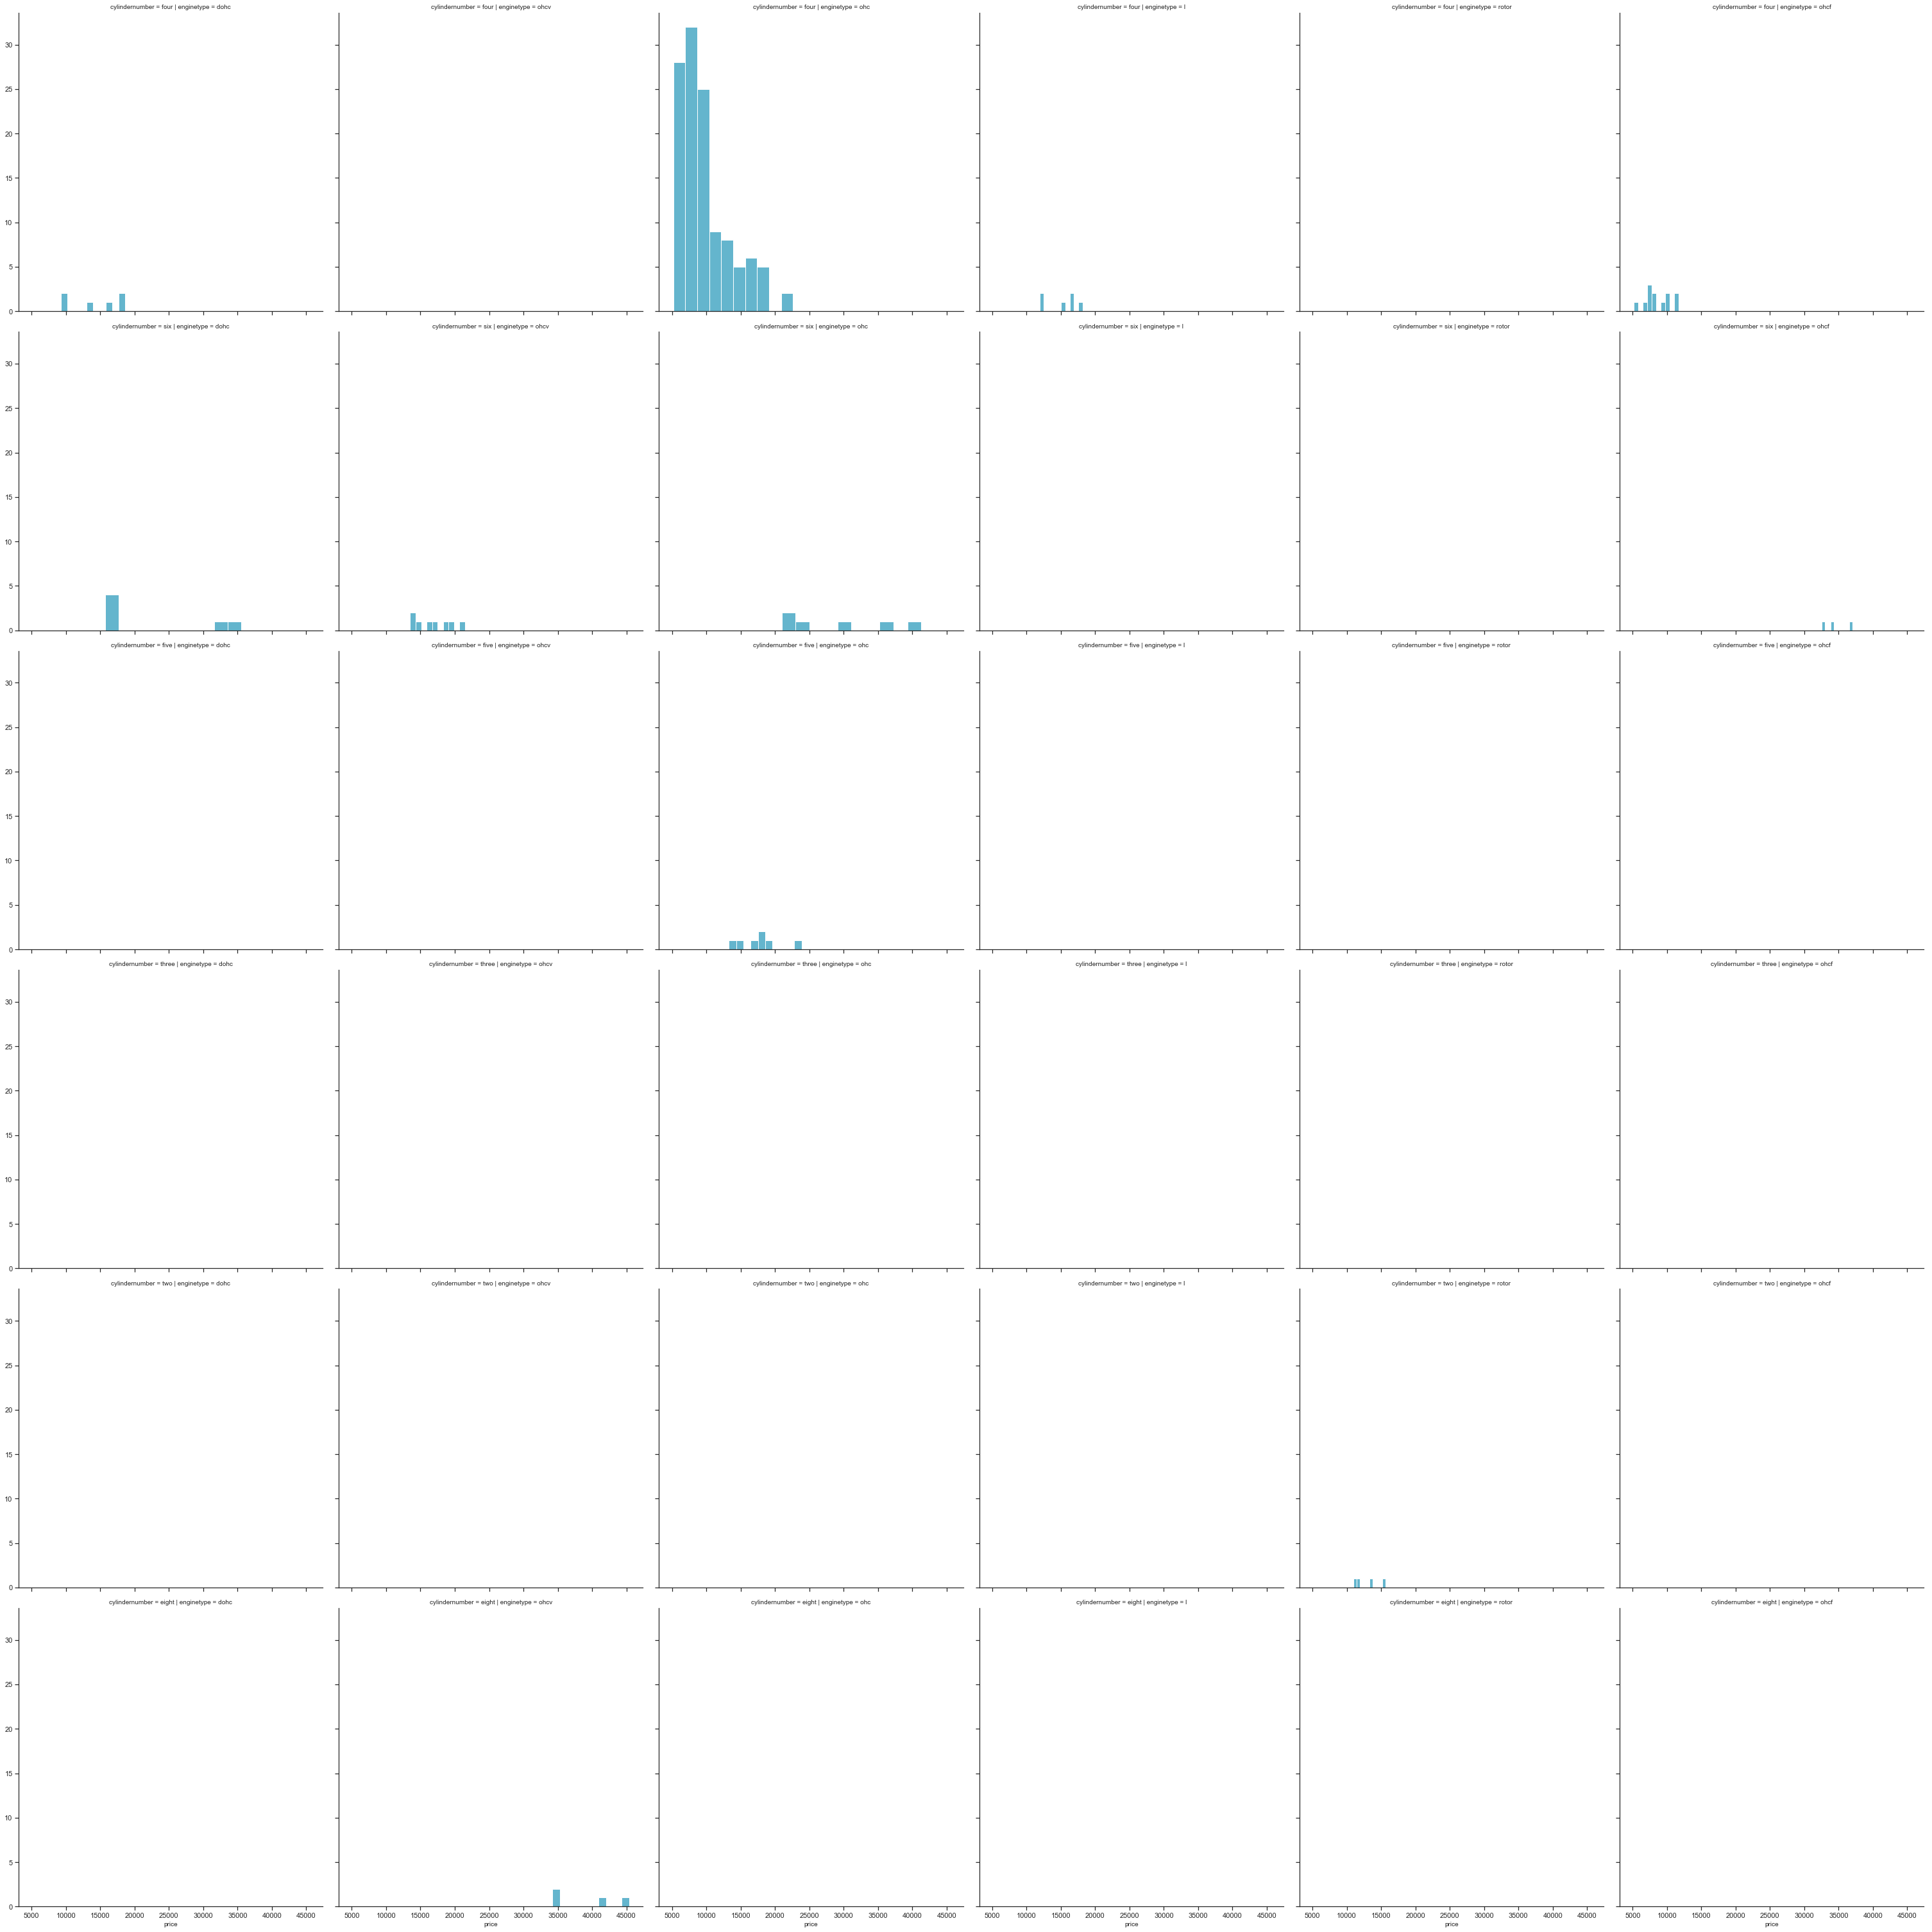

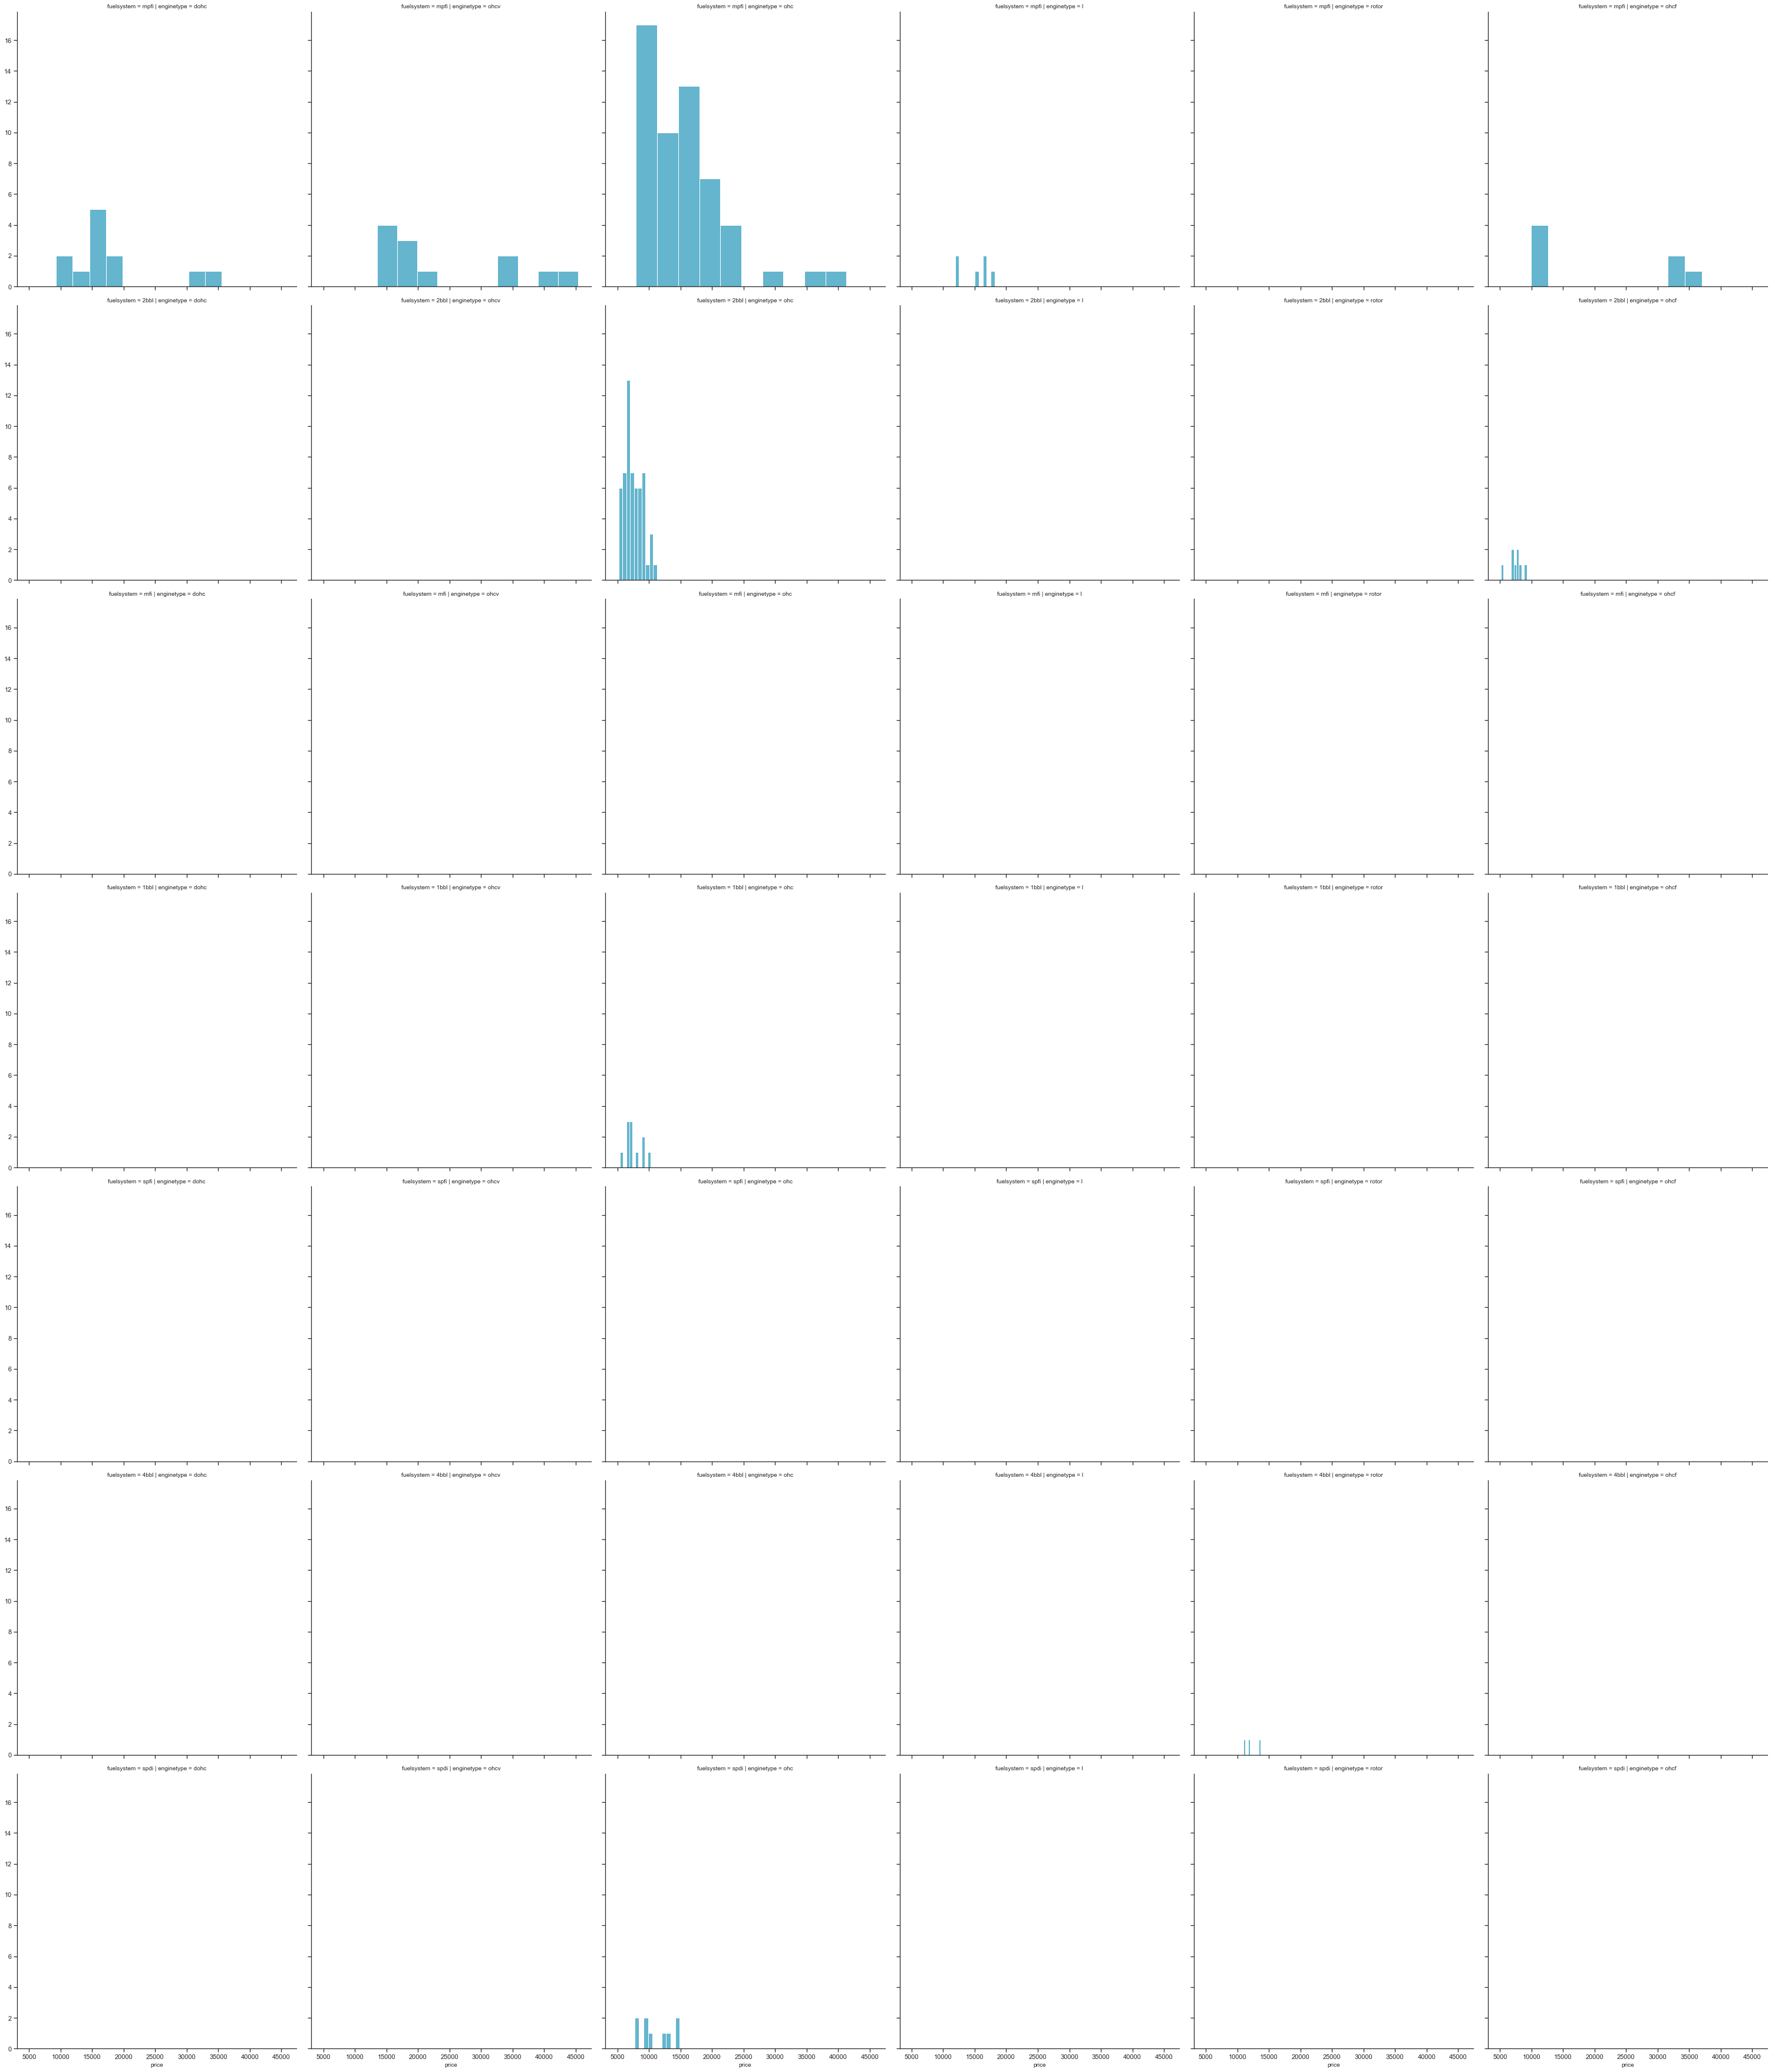

In [24]:
# enginetype correlation with other categorical variable
categoricalVaraible = ['fueltype','aspiration','doornumber','carbody','drivewheel',
                       'enginelocation','cylindernumber','fuelsystem']

#Plotting FacetGrid
for cols in categoricalVaraible:
    g=sns.FacetGrid(dfCarPrice, col="enginetype", row=cols, height=7)
    g.map(plt.hist, "price", color="c")


> <font color=Navy>
    <b> 5.2.8. cylindernumber correlation with other categorical variable </b> <br>
  </font>

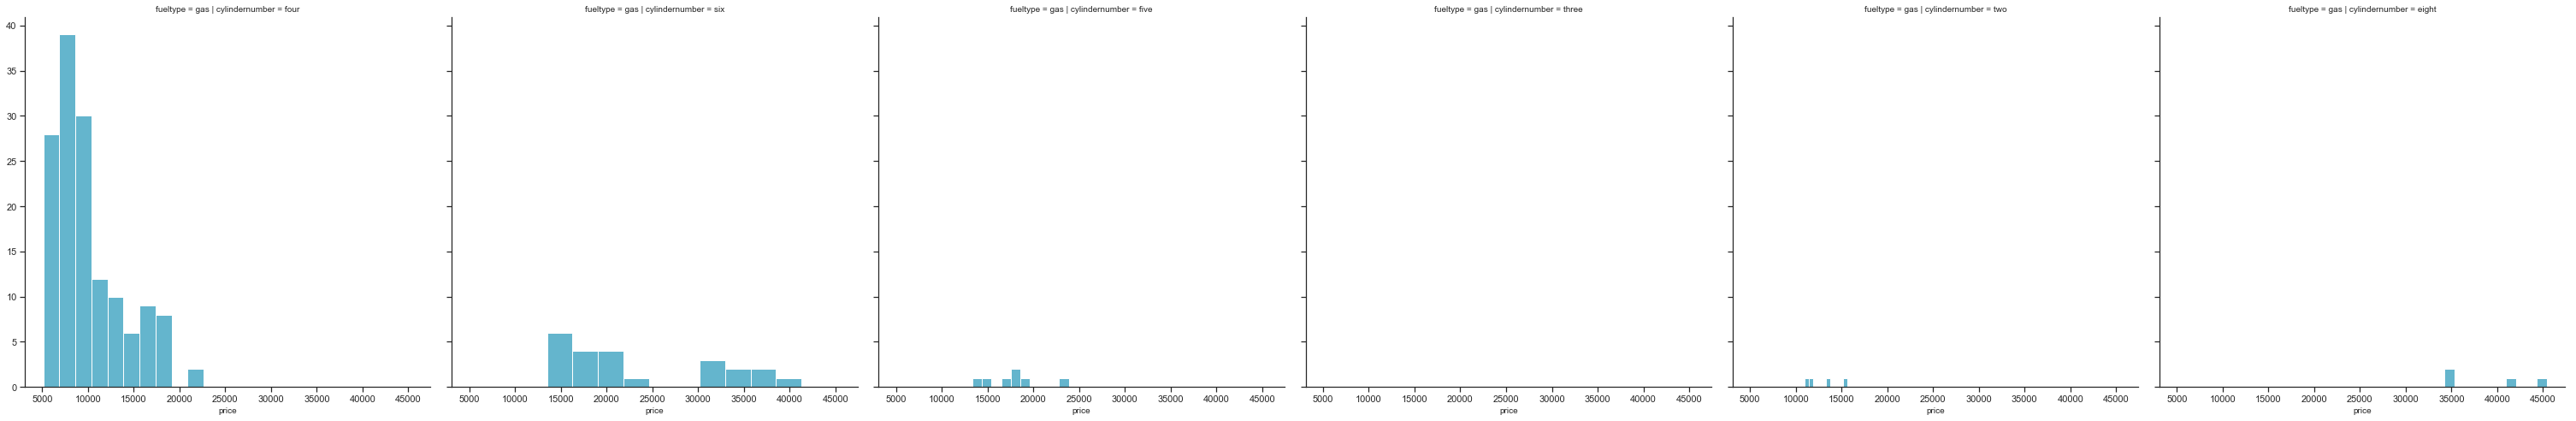

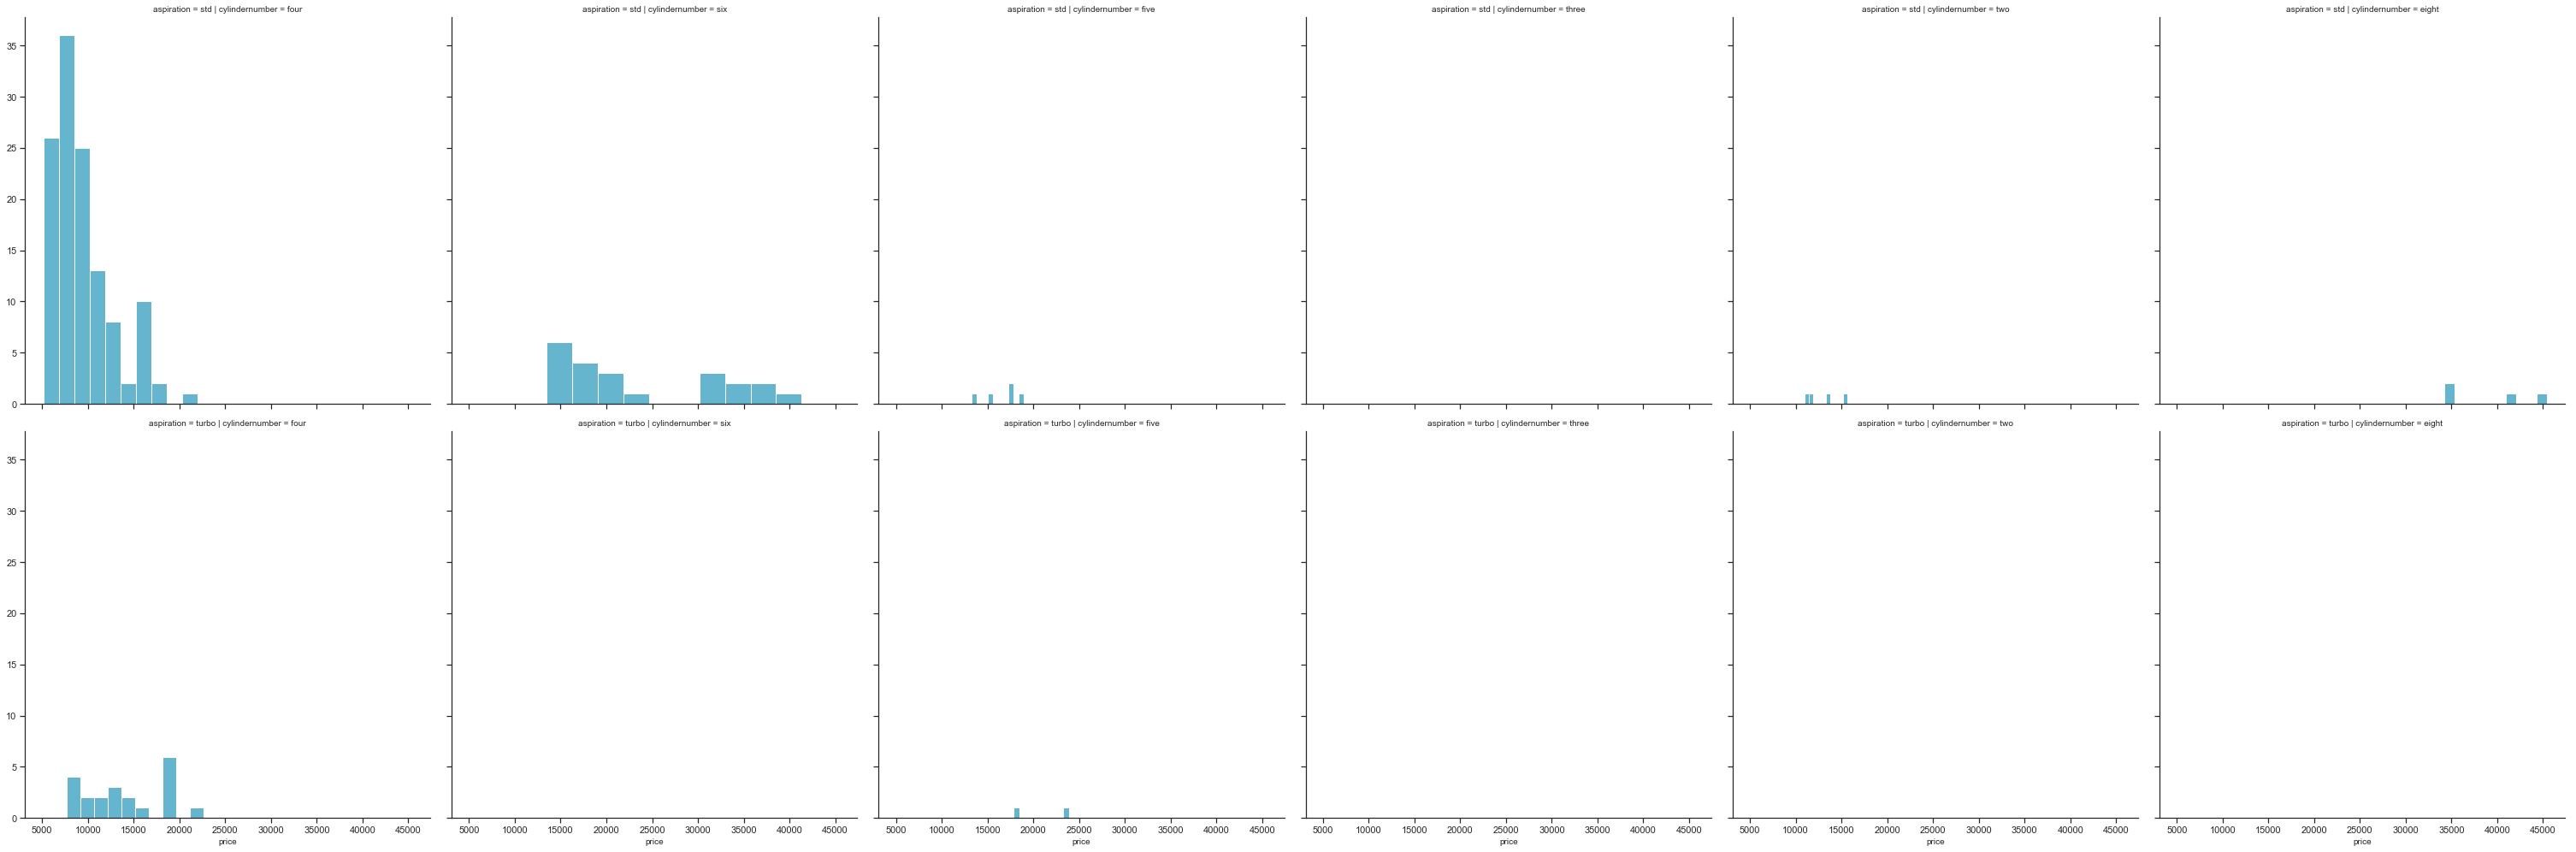

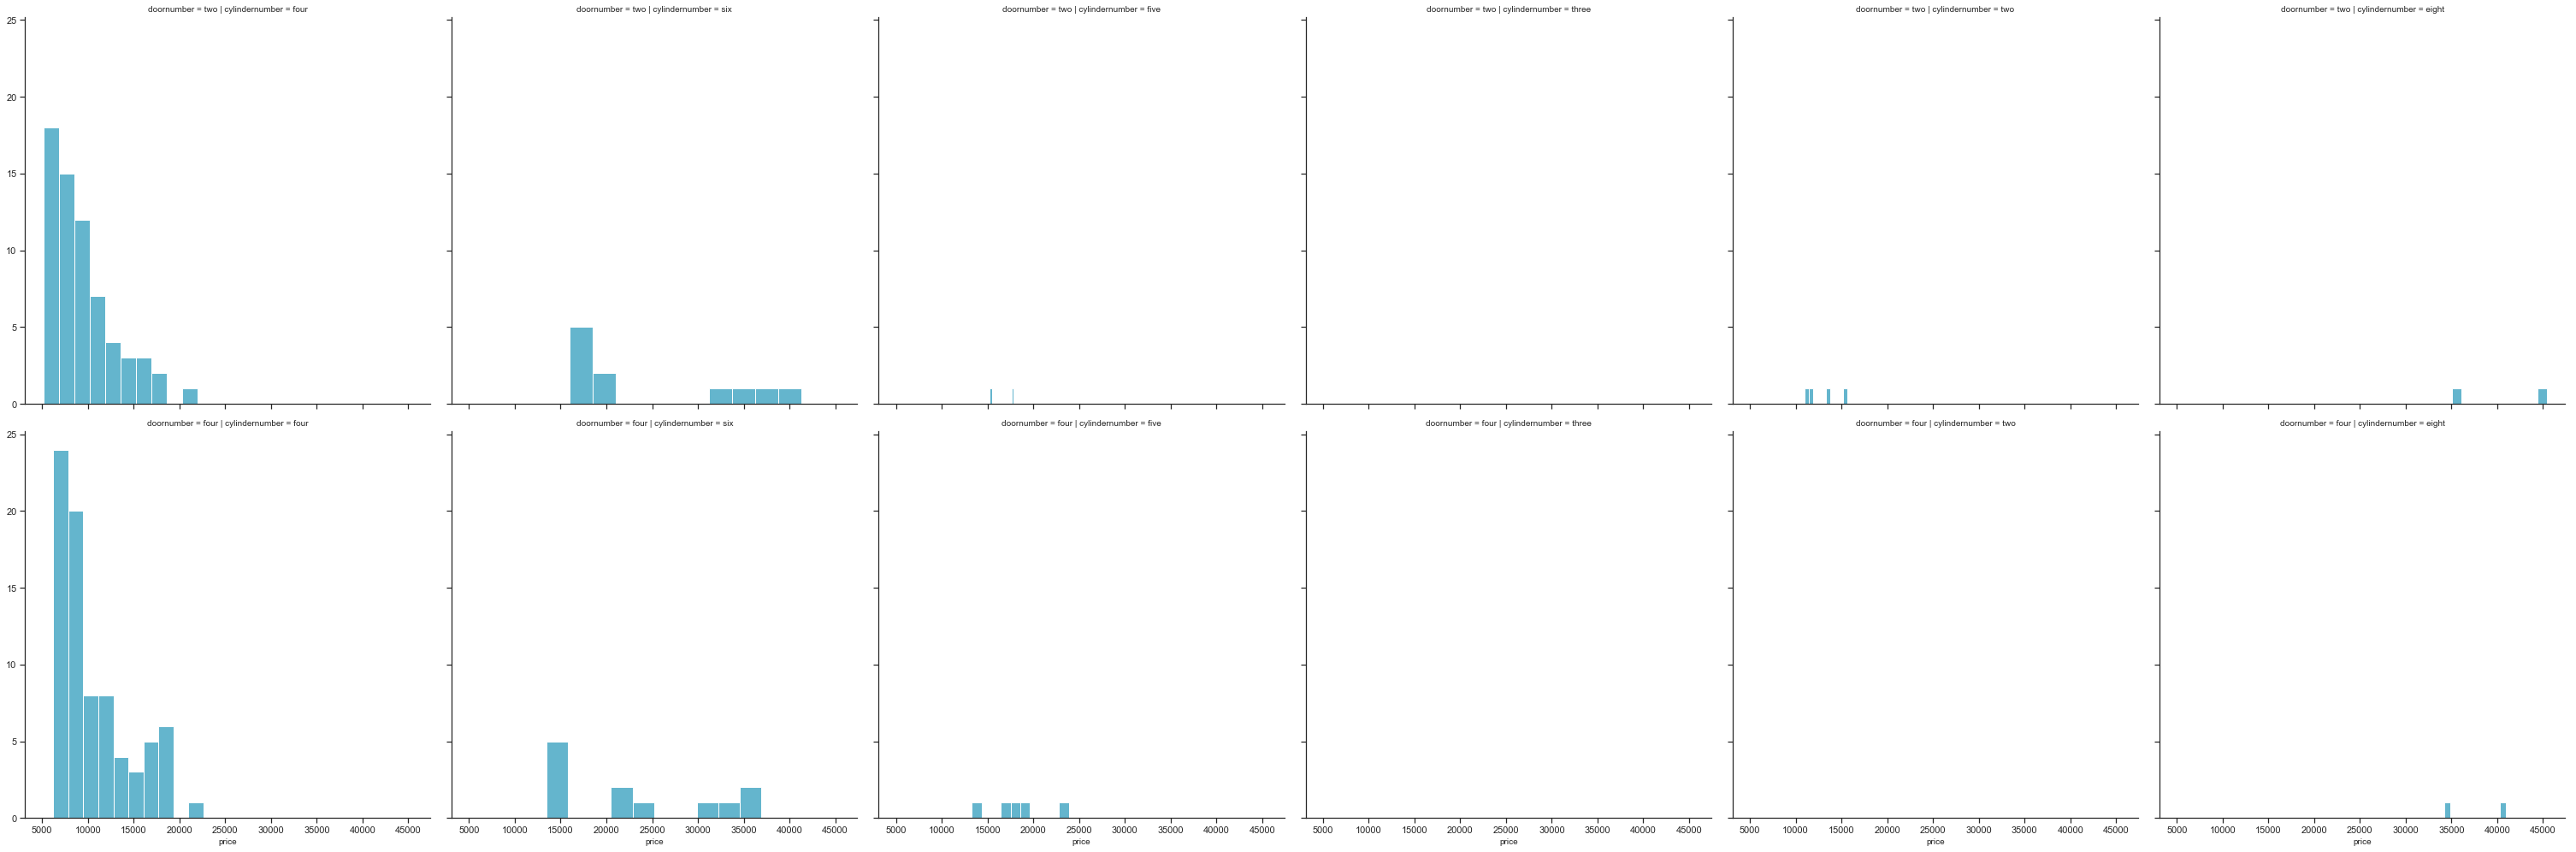

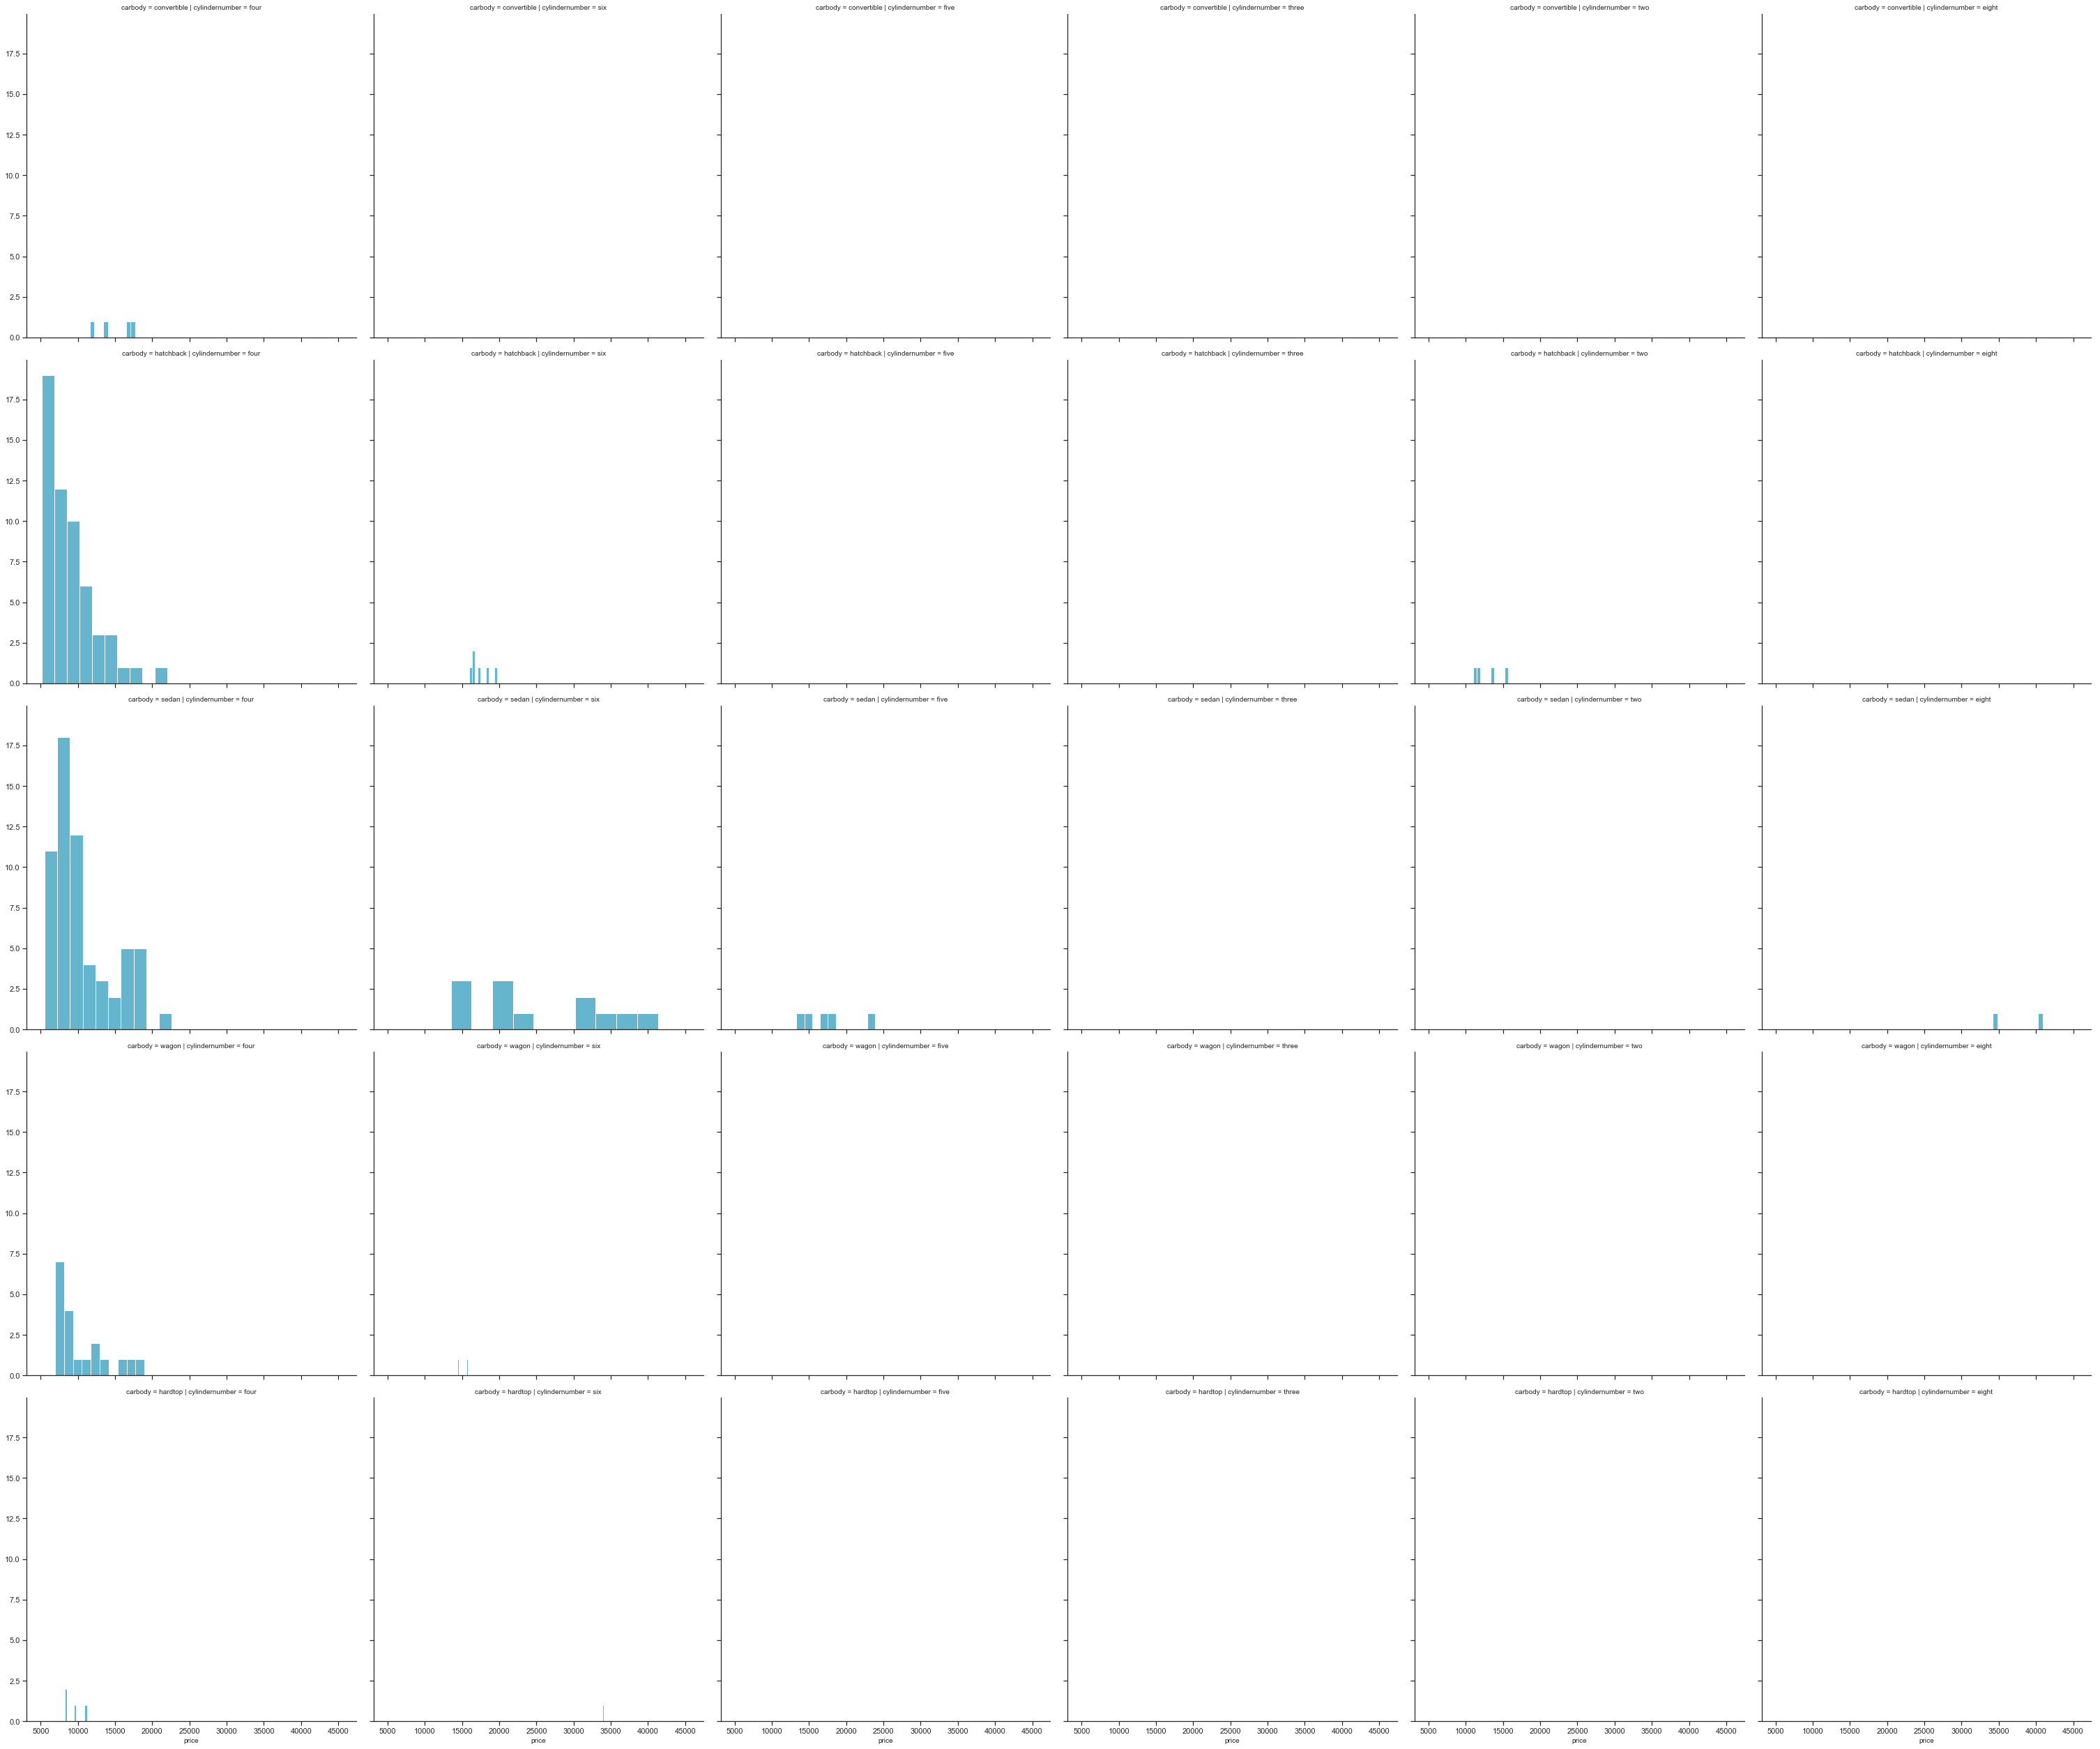

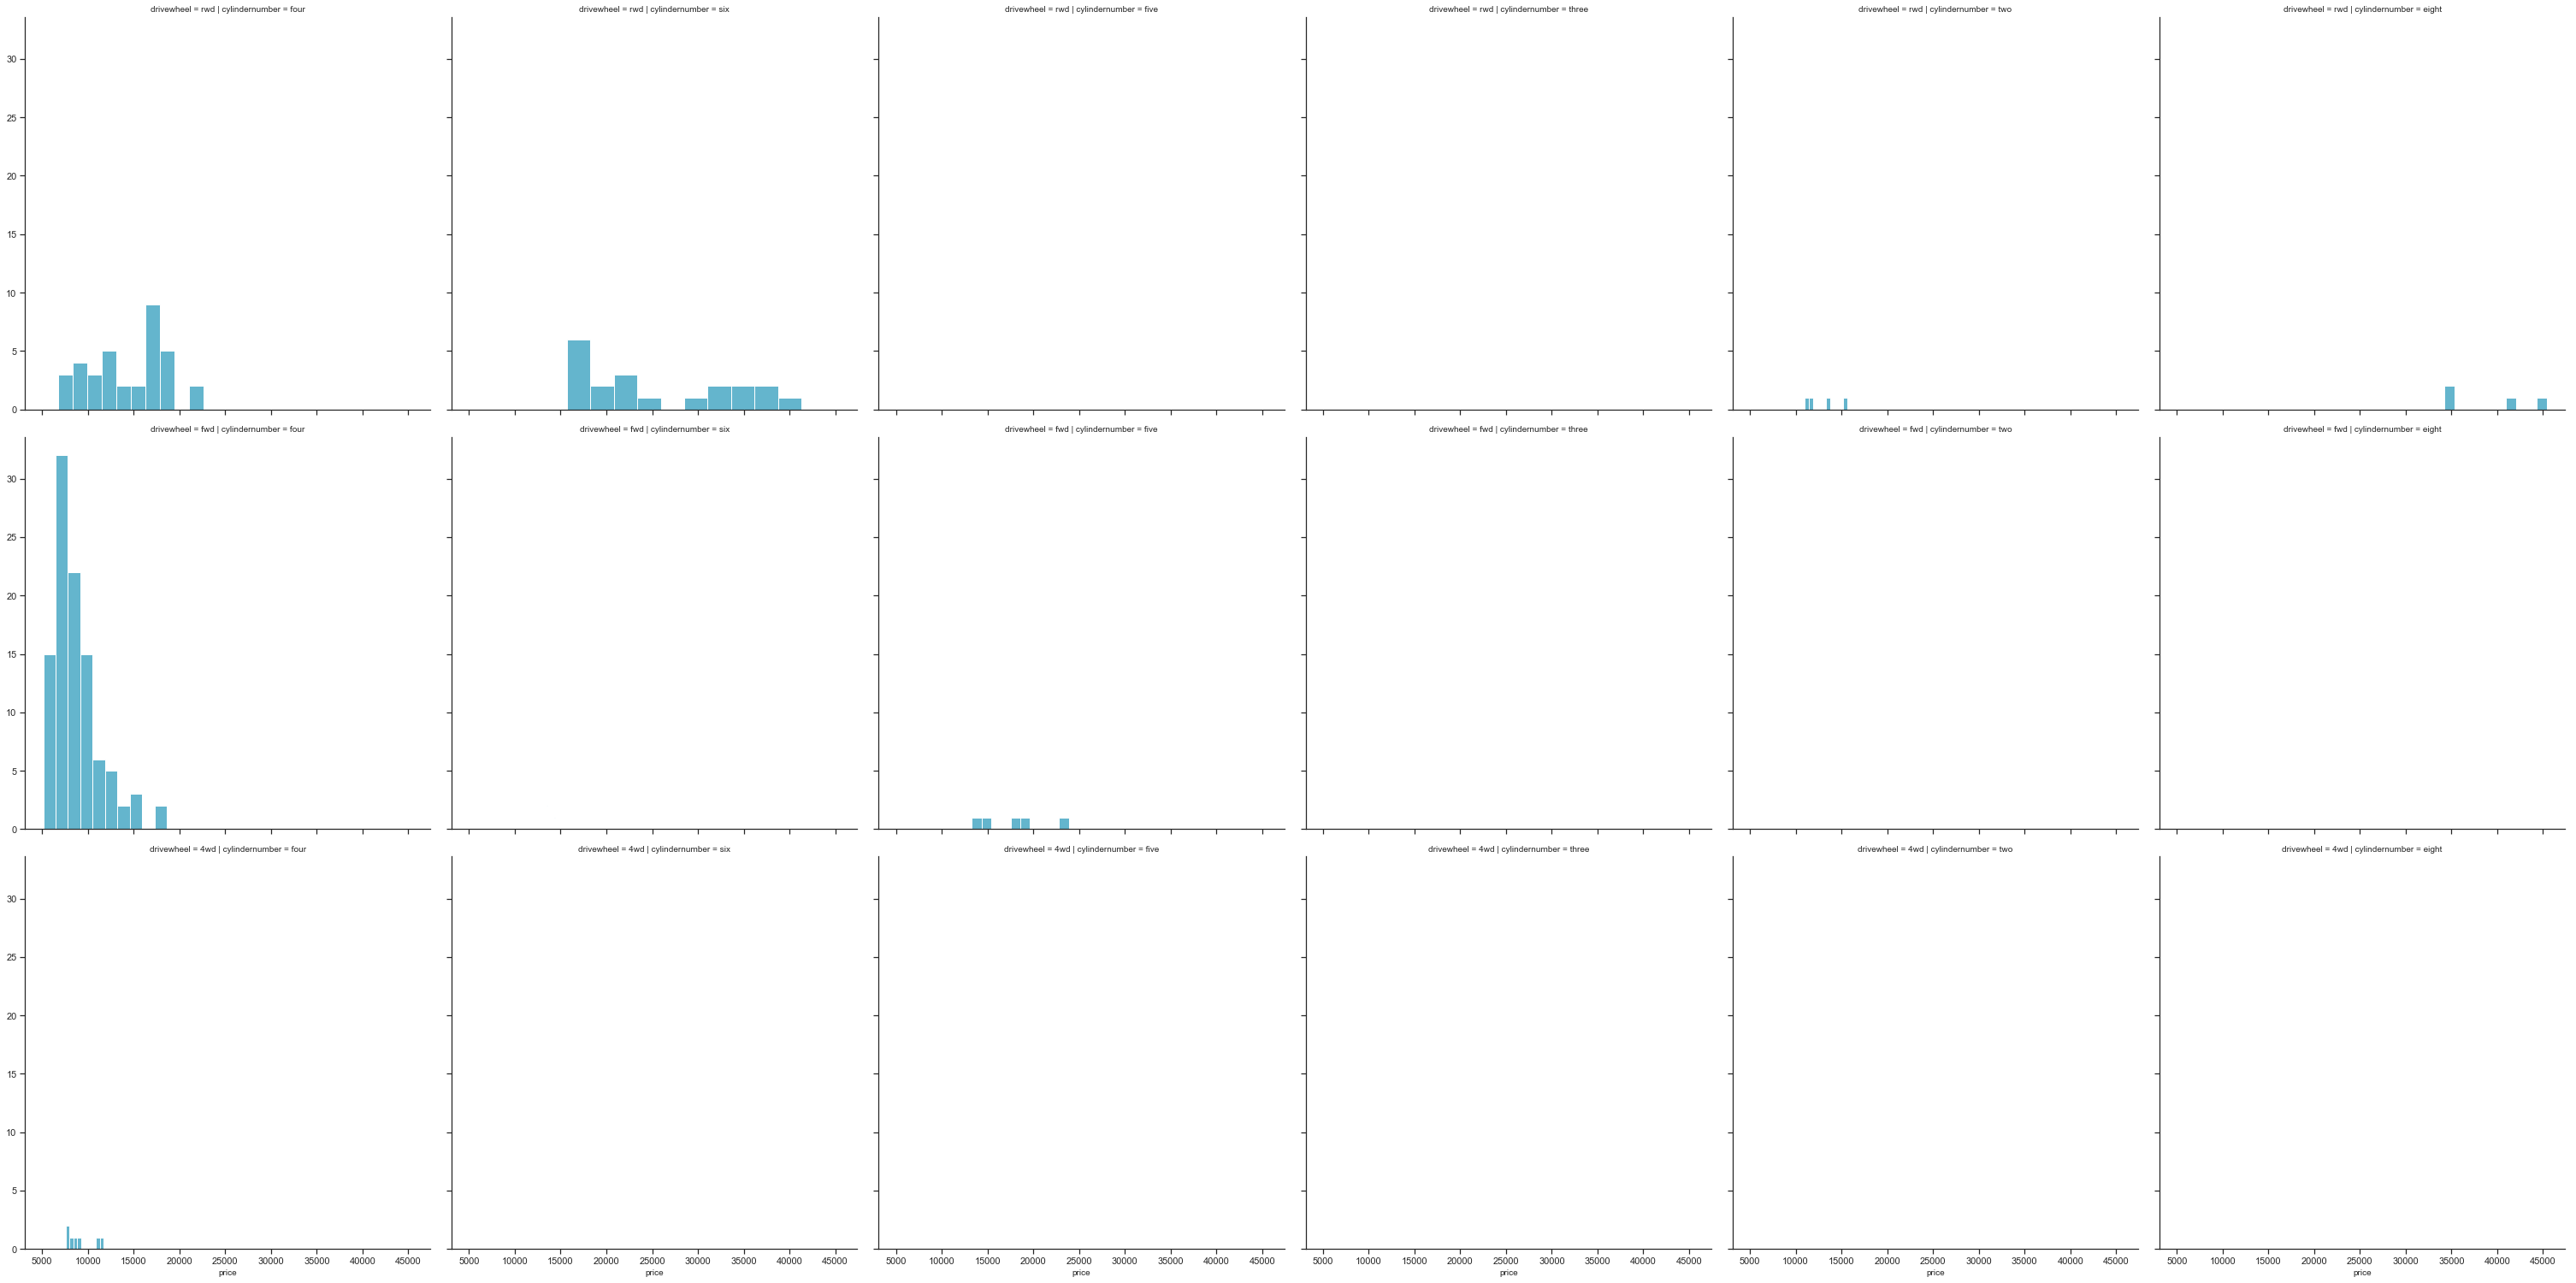

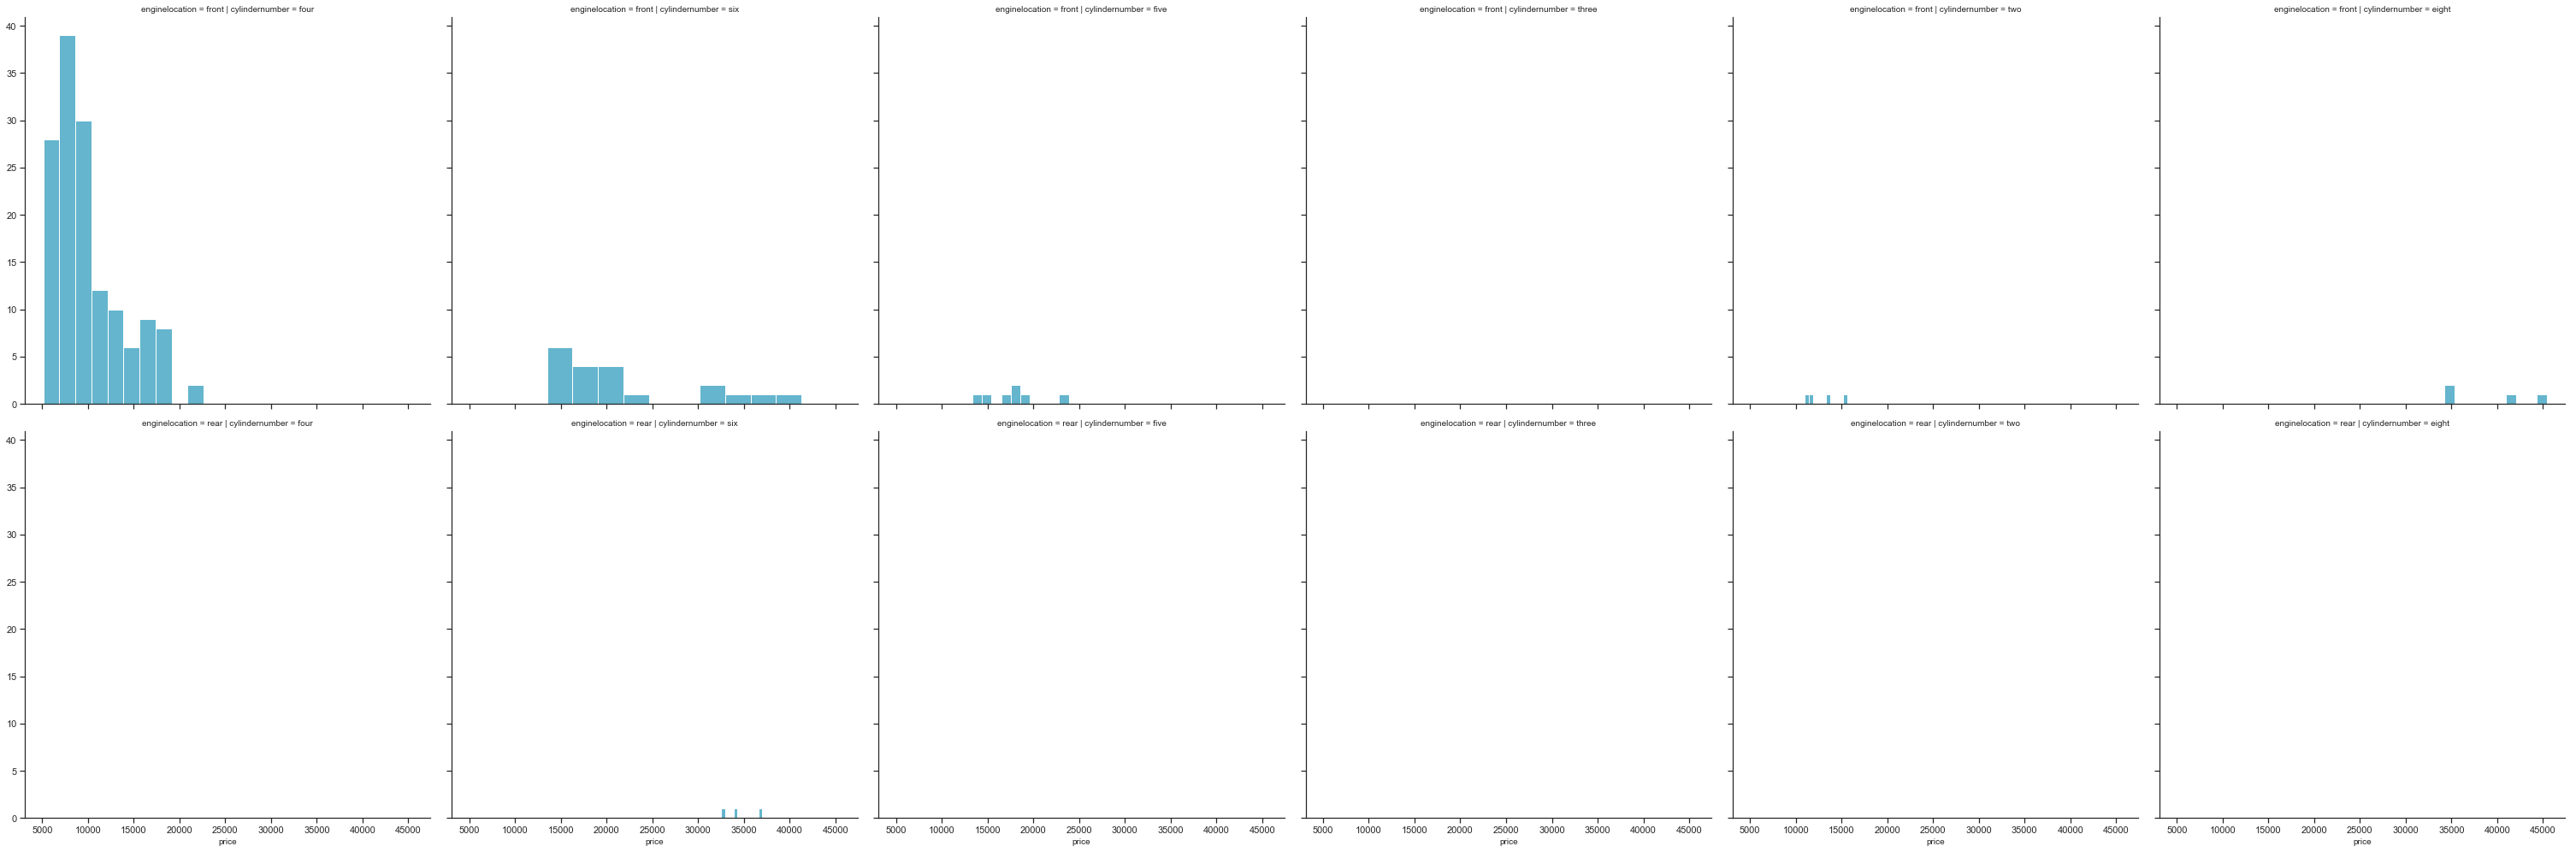

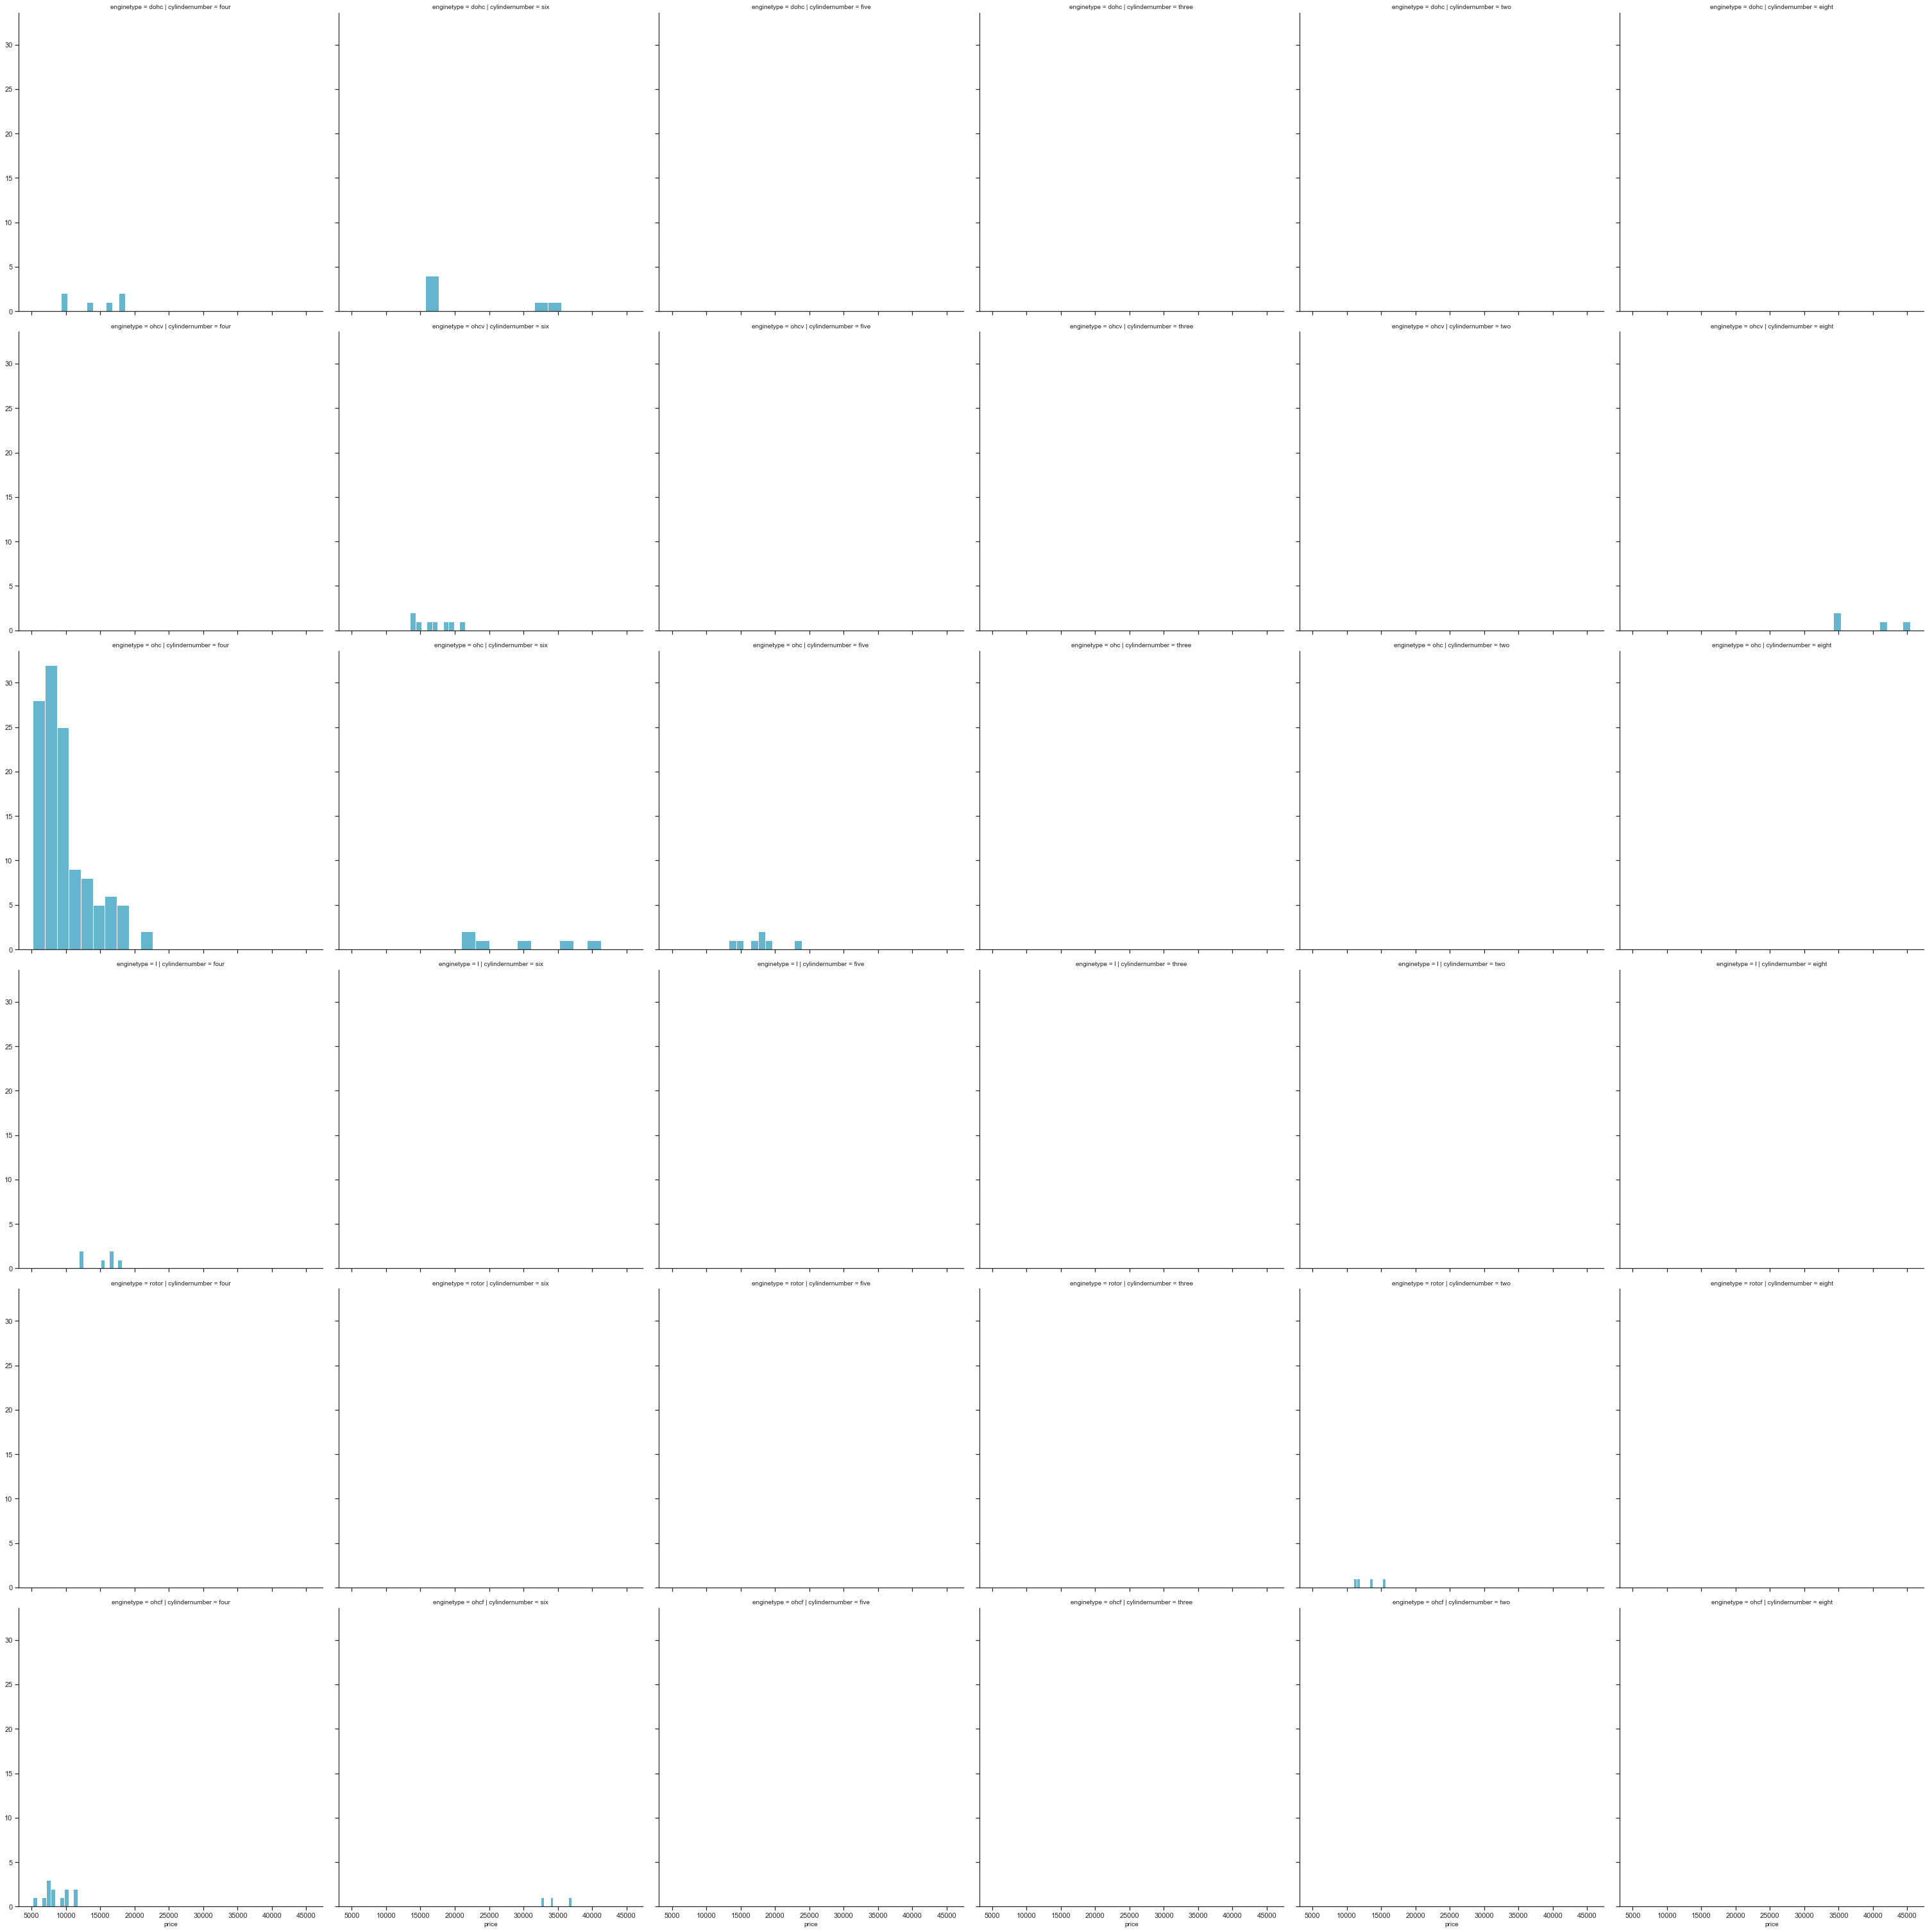

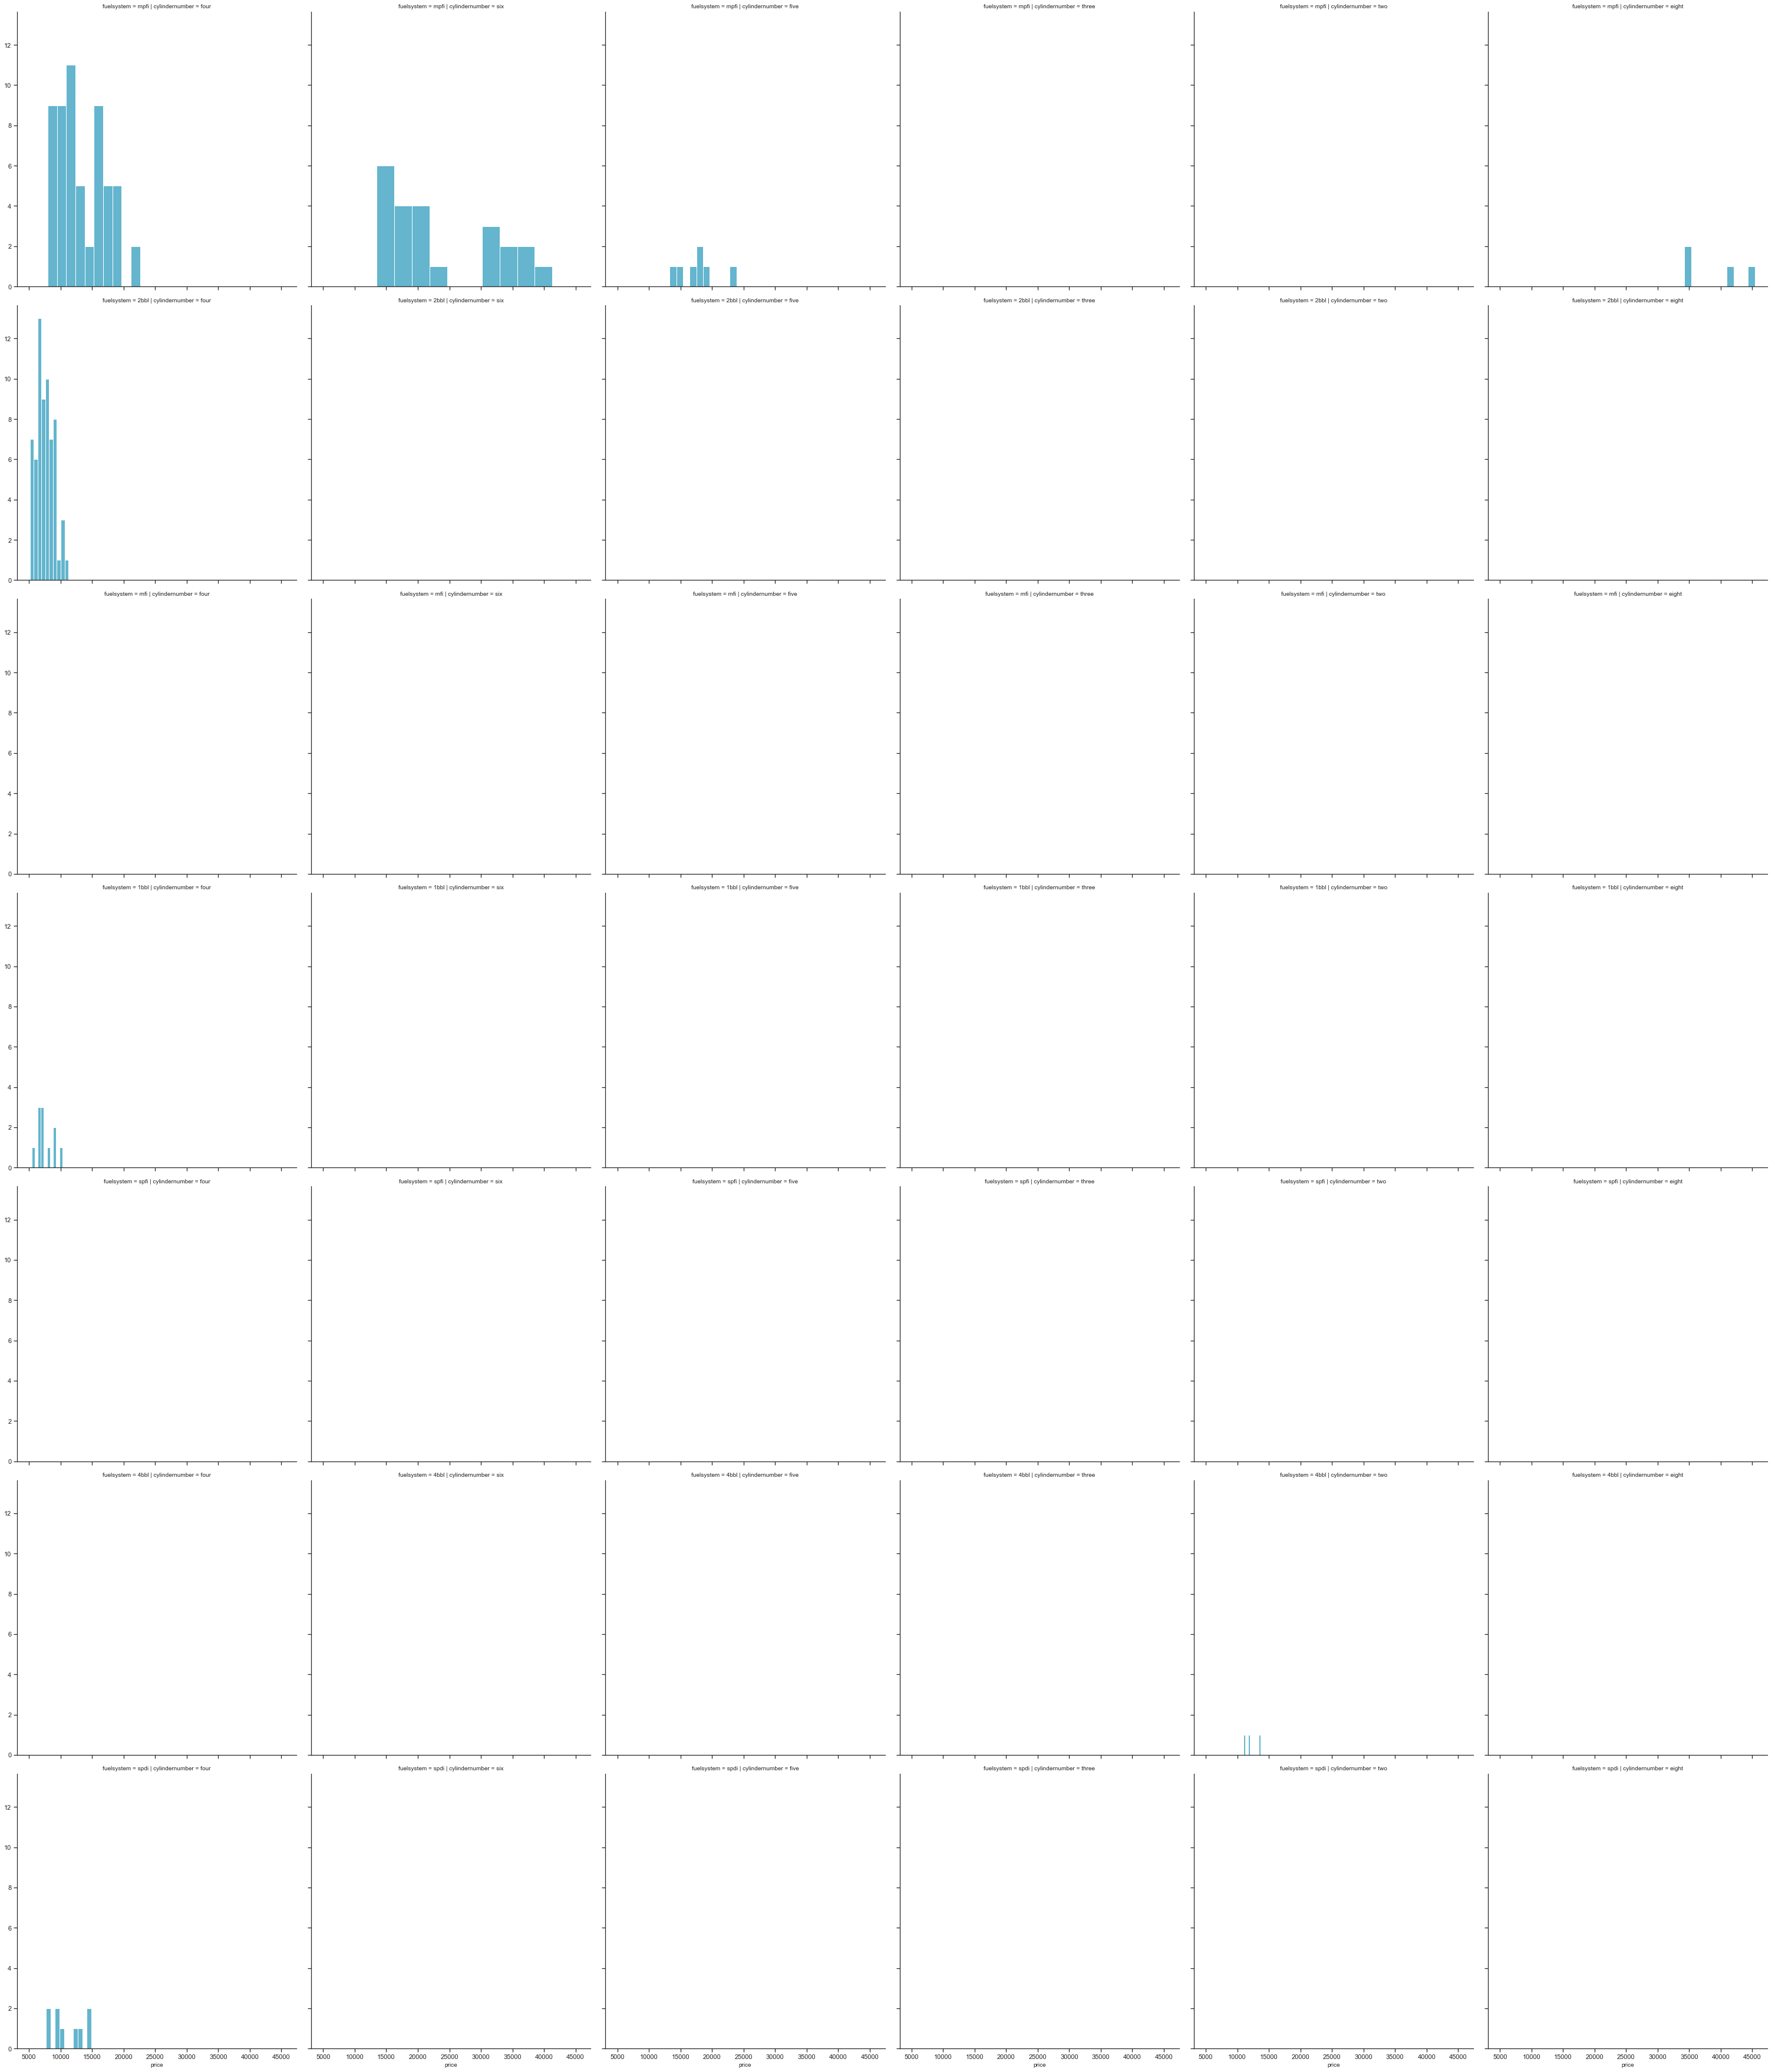

In [25]:
# cylindernumber correlation with other categorical variable
categoricalVaraible = ['fueltype','aspiration','doornumber','carbody','drivewheel',
                       'enginelocation','enginetype','fuelsystem']

#Plotting FacetGrid
for cols in categoricalVaraible:
    g=sns.FacetGrid(dfCarPrice, col="cylindernumber", row=cols, height=7)
    g.map(plt.hist, "price", color="c")


> <font color=Navy>
    <b> 5.2.9. fuelsystem correlation with other categorical variable </b> <br>
  </font>

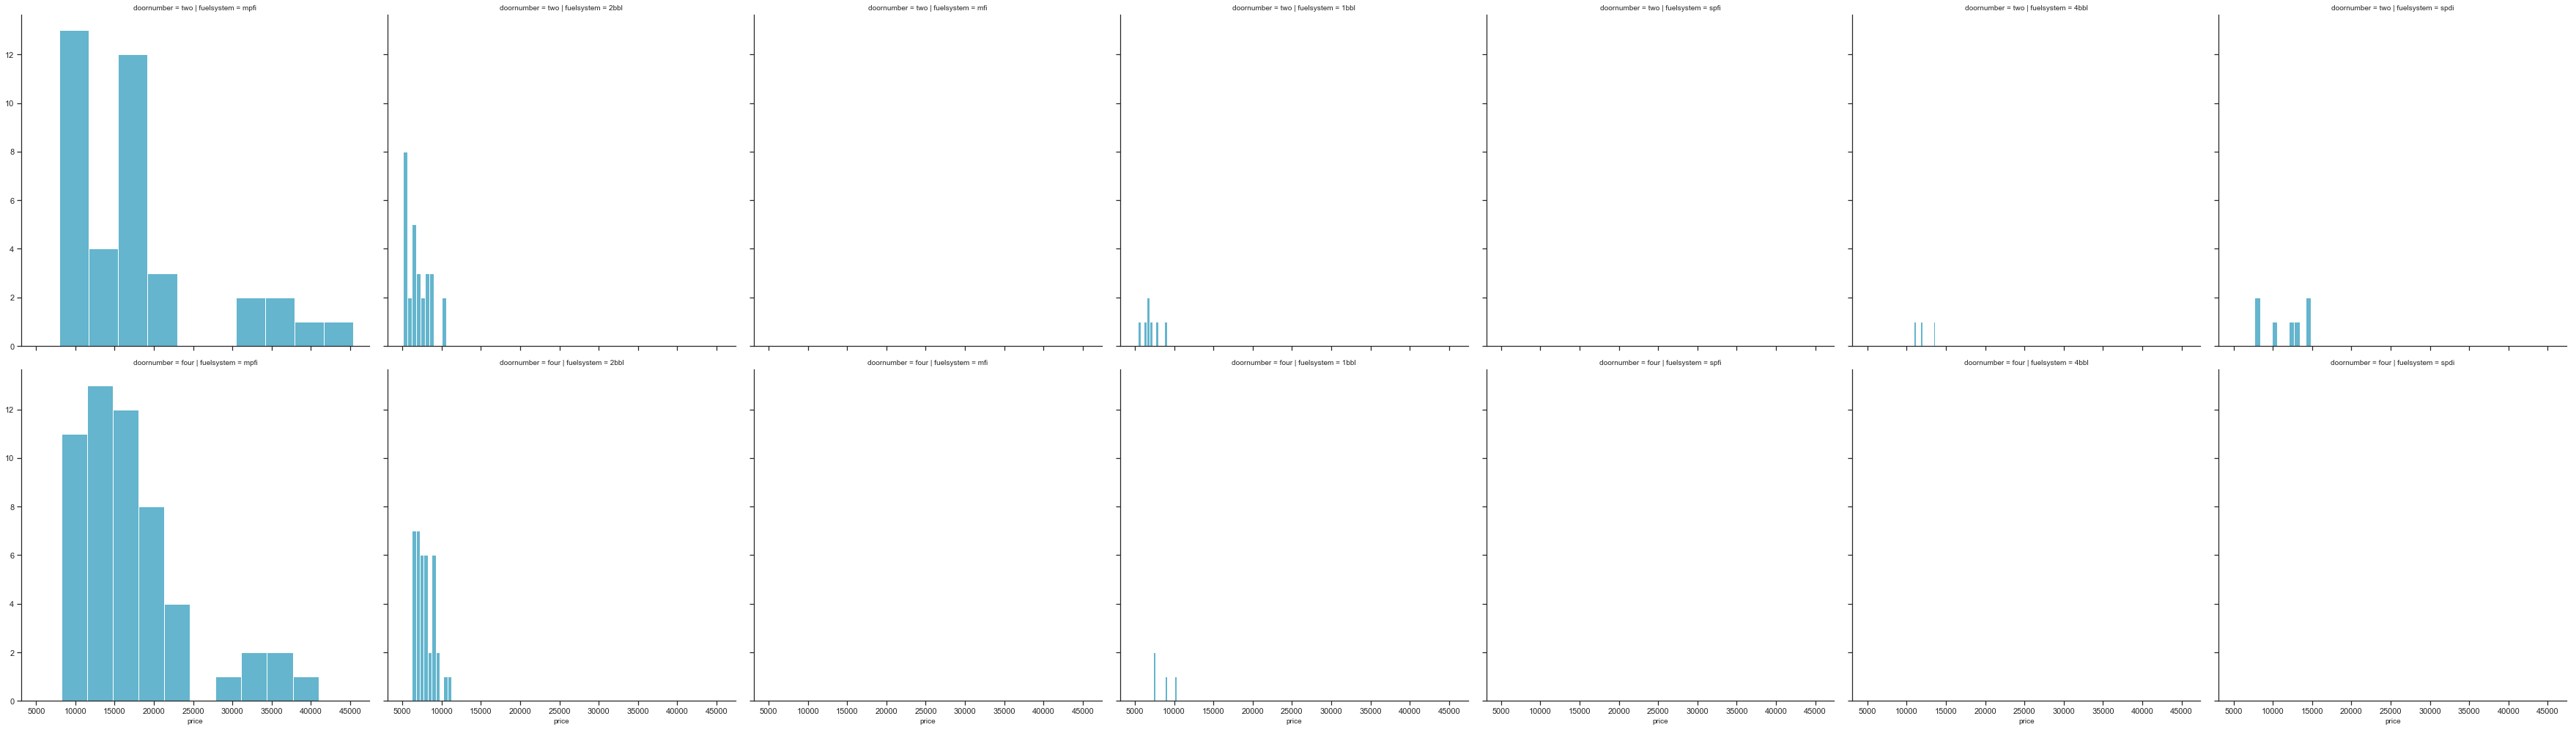

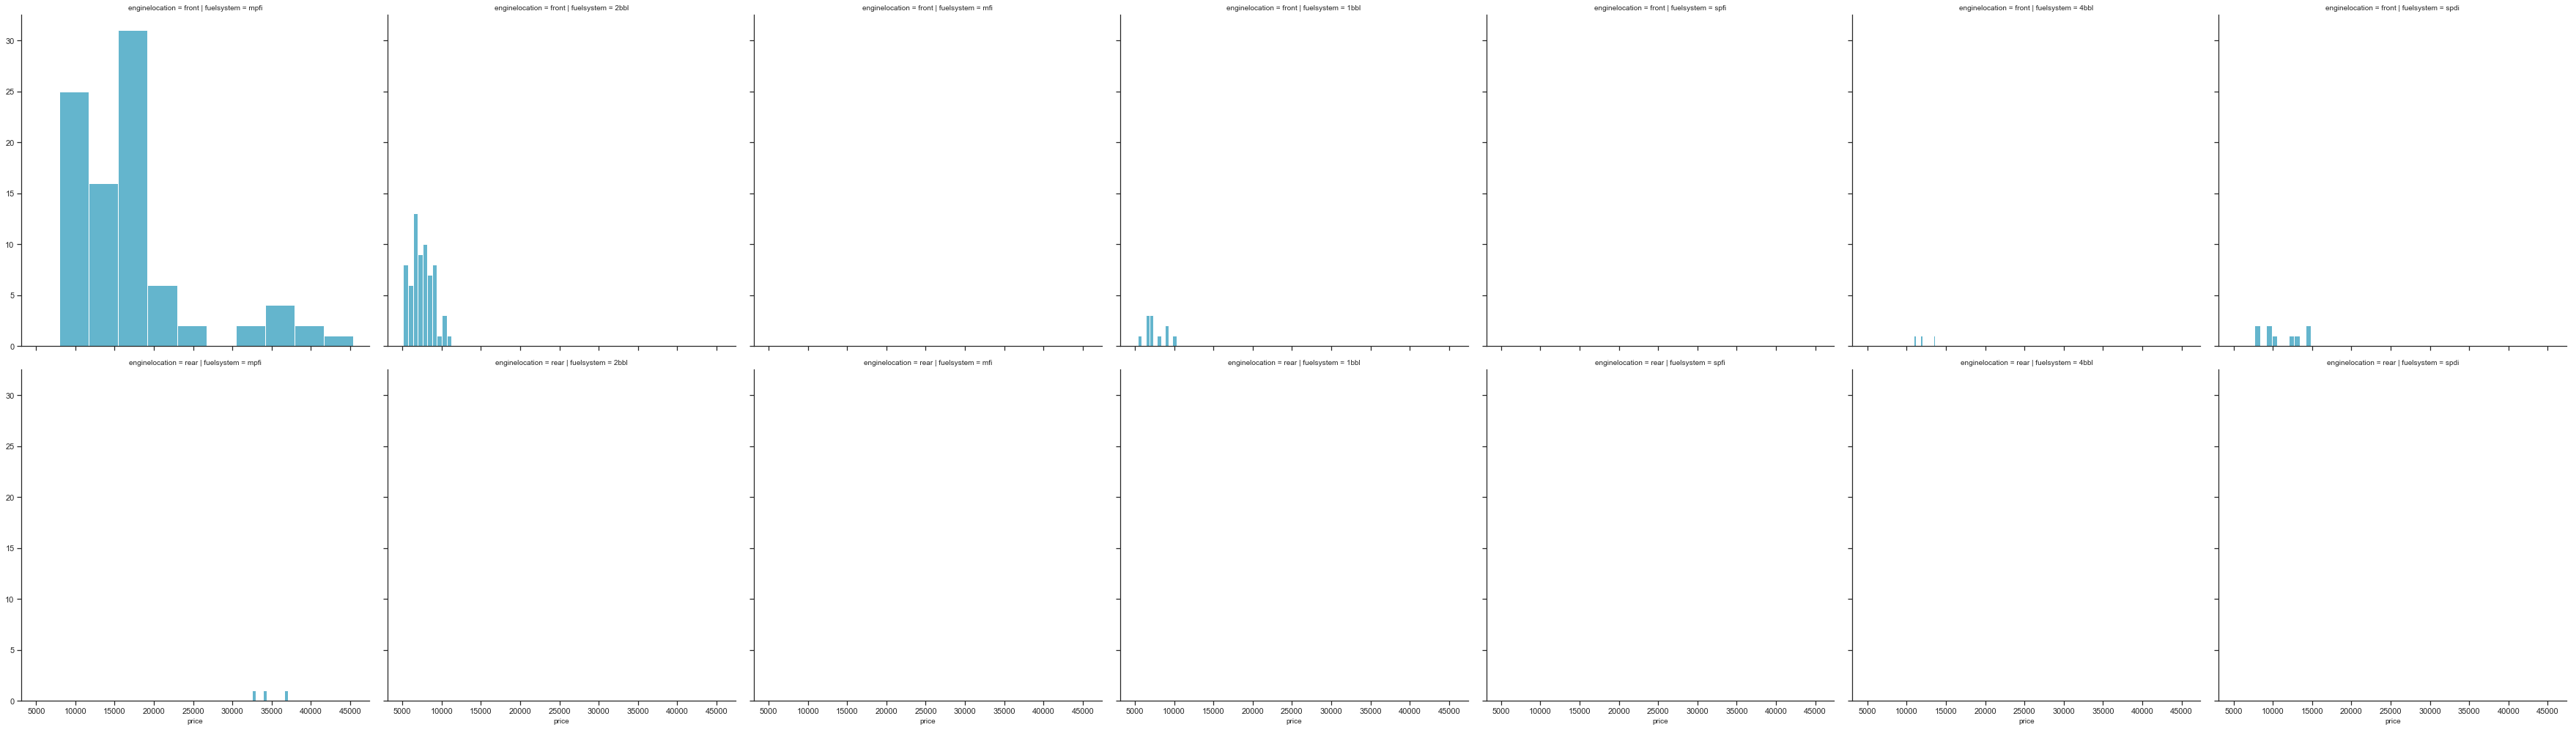

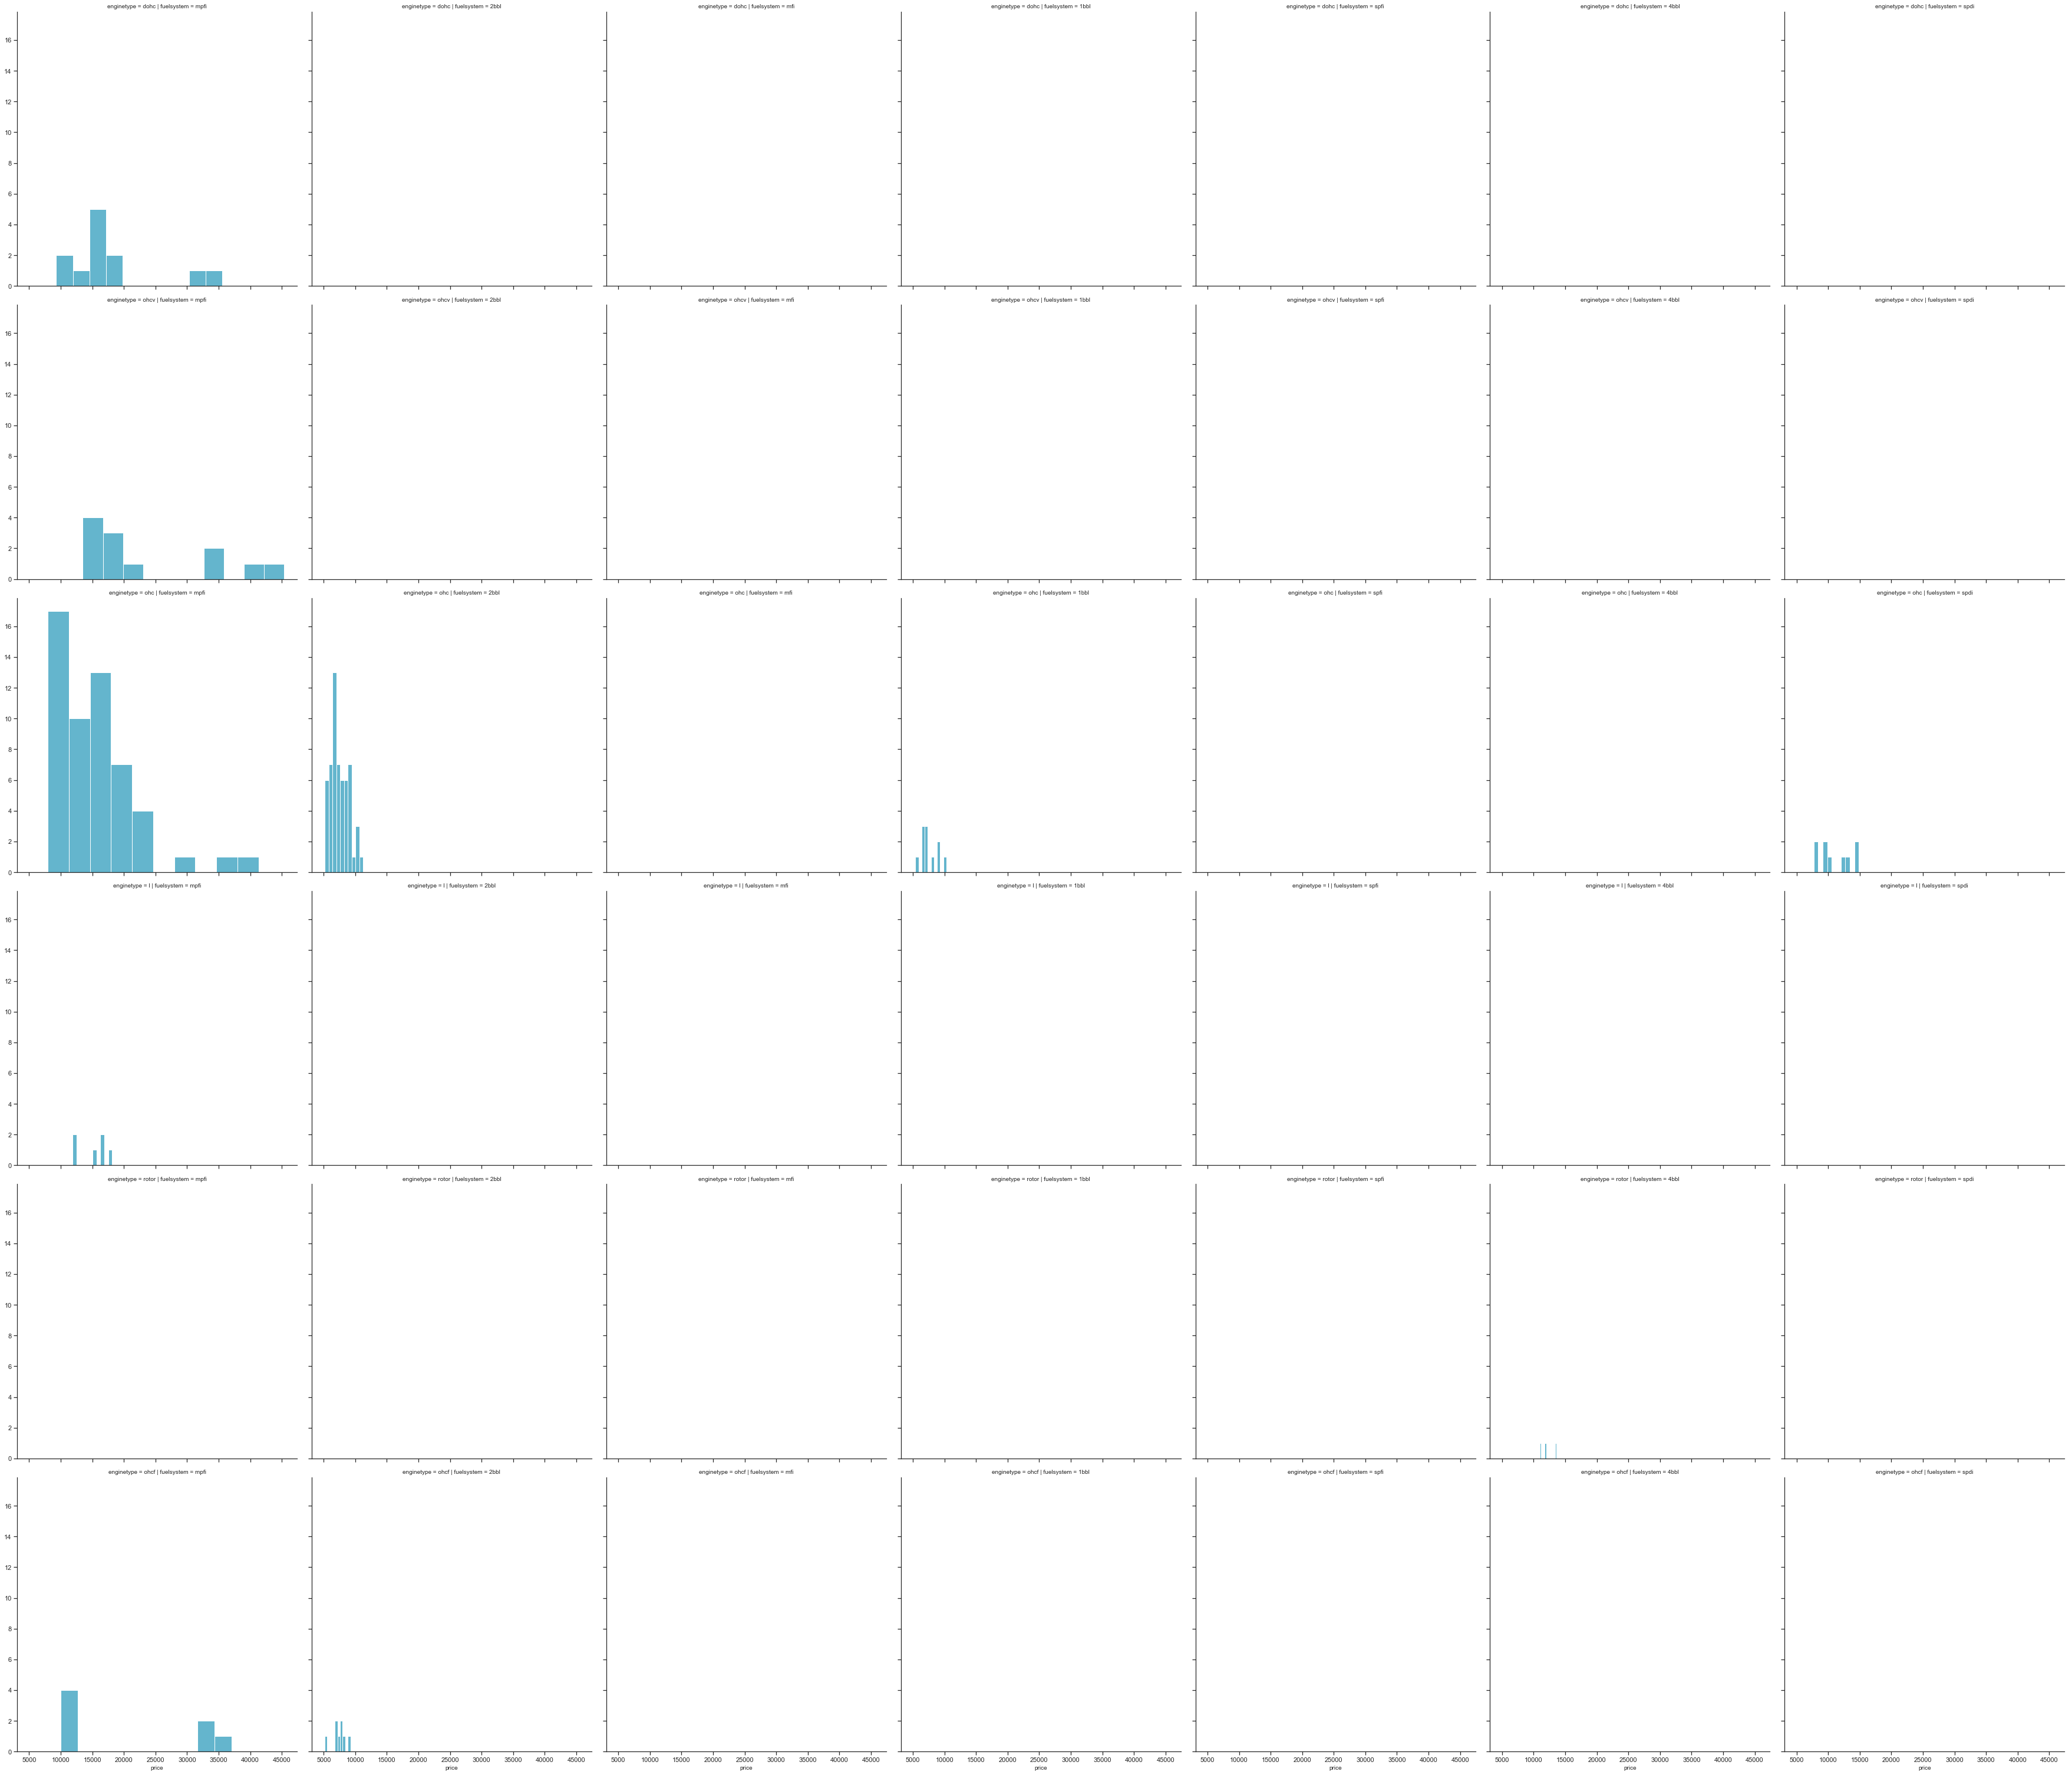

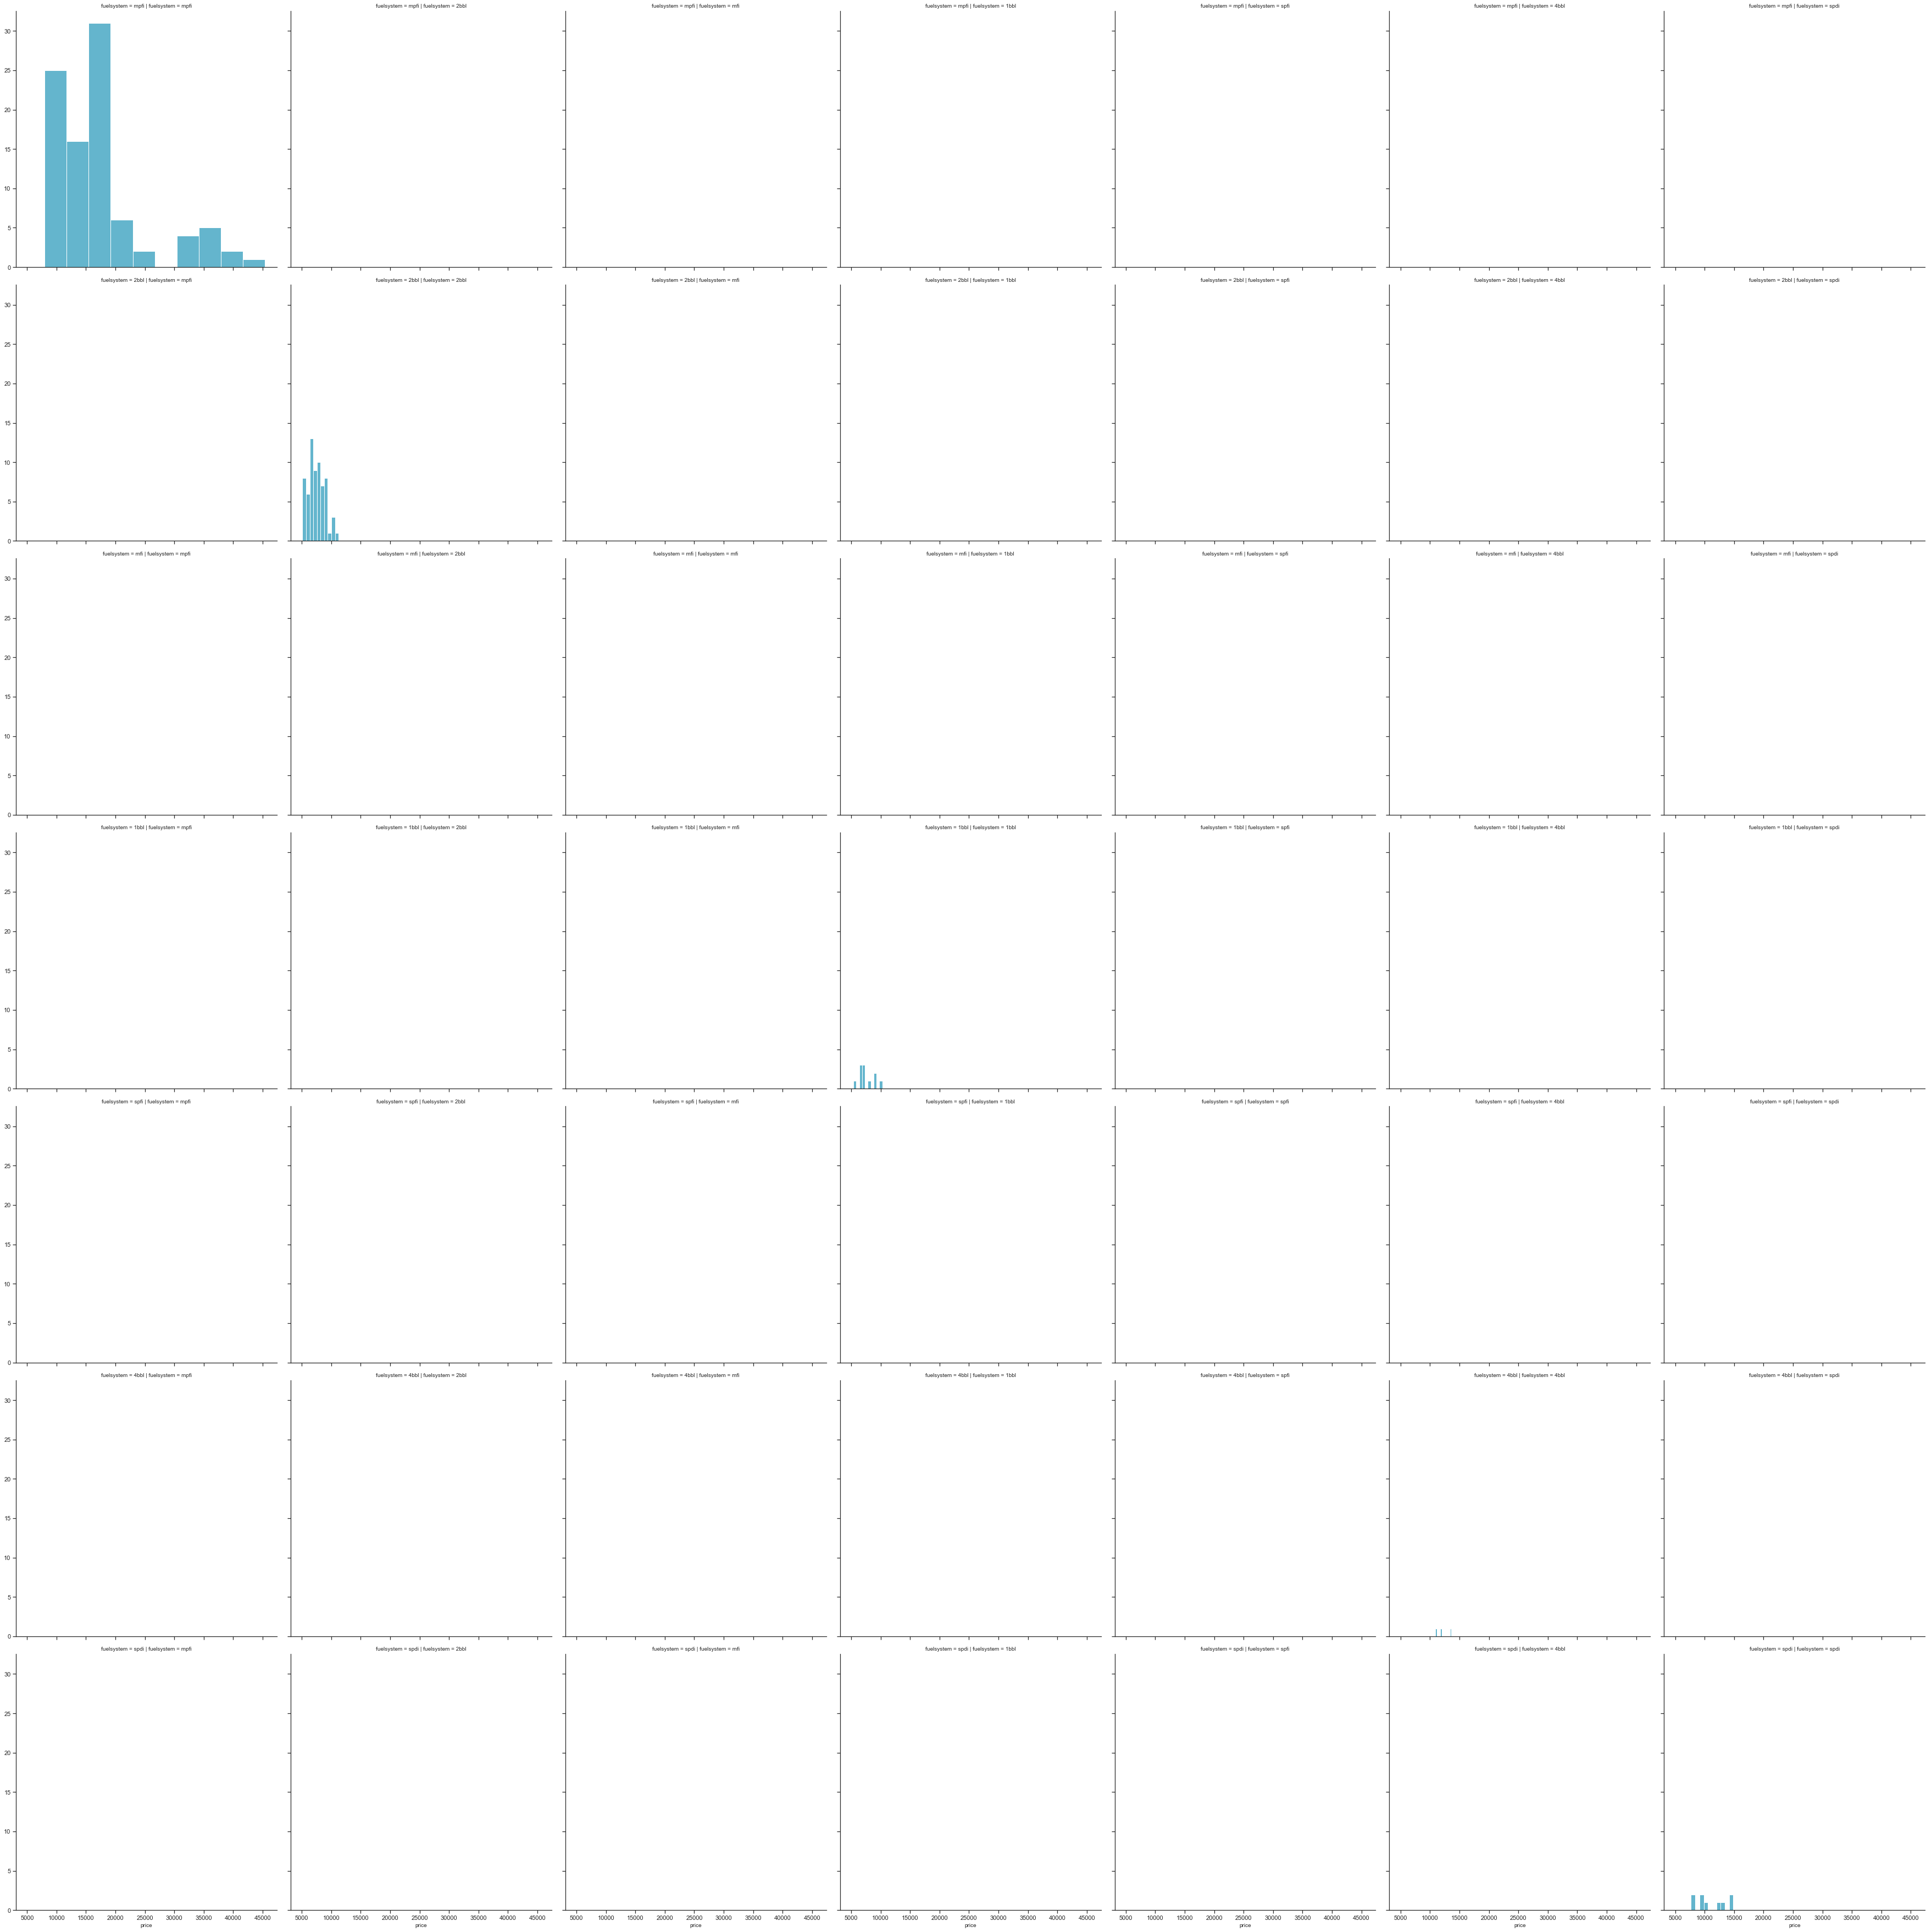

In [26]:
# fuelsystem correlation with other categorical variable
categoricalVaraible = ['fueltype','aspiration','doornumber','carbody','drivewheel',
                       'enginelocation','enginetype','fuelsystem']

#Plotting FacetGrid
for cols in categoricalVaraible:
    g=sns.FacetGrid(dfCarPrice, col="fuelsystem", row=cols, height=7)
    g.map(plt.hist, "price", color="c")


> # <font color=blue> 6. Multiple Linear Regression </font>

 > ## 6.1. Correlations between the Target and Predictor variables

> <font color=Navy>
    <b> Price increases when wheelbase, Carlength, Carwidth, Curbweight, Enginesize, Boreratio, Horsepower increases <br>
        Price decreases when Citympg, highwaympg increases
    </b> <br>
  </font>

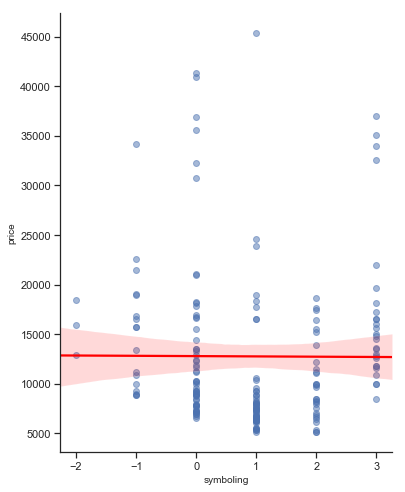

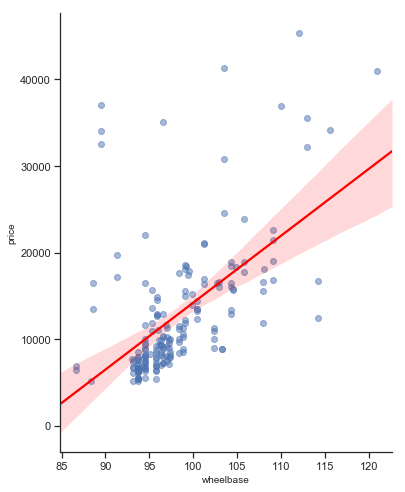

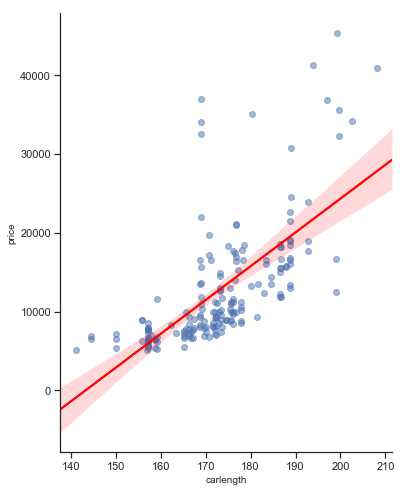

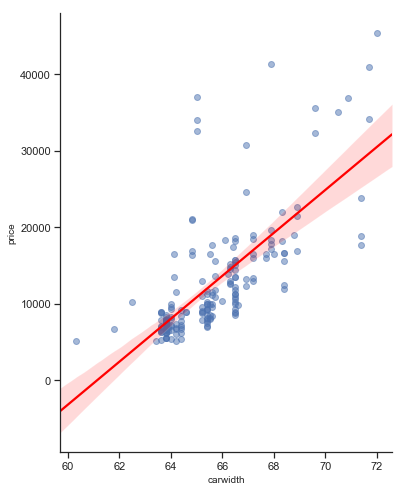

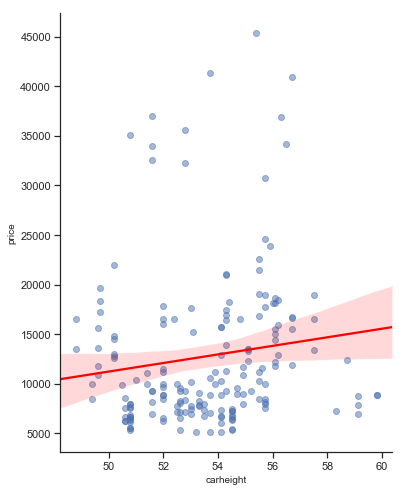

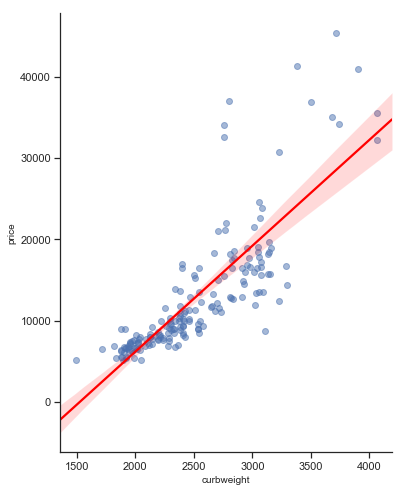

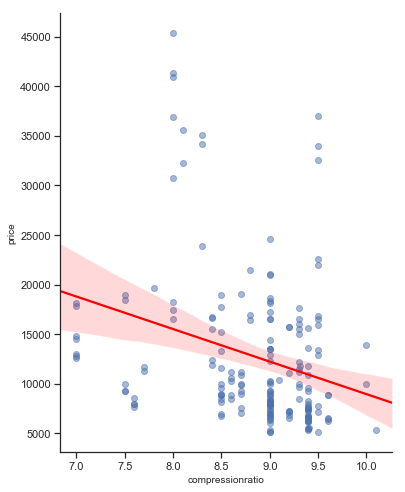

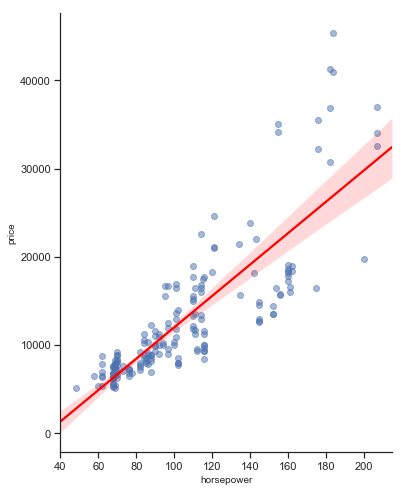

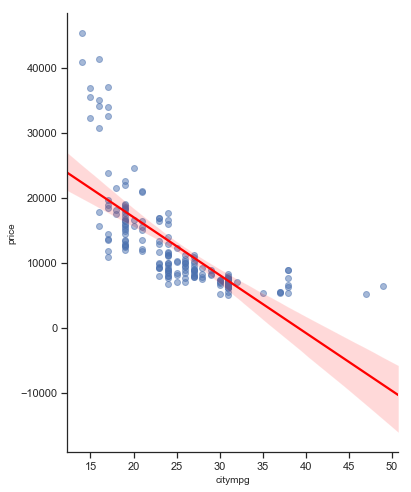

In [27]:
#Predictor Variable List

predictorVariable = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize',
             'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']

for cols in predictorVariable:
    sns.pairplot(data=dfCarPrice, x_vars=cols, y_vars=["price"], height=7, aspect=.8, kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}})
    plt.show()


 > ## 6.2. Preparing the Data for Modeling

> ### 6.2.1. Encoding
> Converting Binary into 0 and 1
> - 1. FuelType
> - 2. Aspiration
> - 3. DoorNumber
> - 4. EngineLocation


In [28]:
# Converting binary Category variables into 0 and 1

dfCarPrice[['fueltype']] = dfCarPrice[['fueltype']].apply(lambda x: x.str.lower().map({'gas':0,"diesel":1 }))
dfCarPrice[['aspiration']] = dfCarPrice[['aspiration']].apply(lambda x: x.str.lower().map({'std':0,"turbo":1 }))
dfCarPrice[['doornumber']] = dfCarPrice[['doornumber']].apply(lambda x: x.str.lower().map({'two':0,"four":1 }))
dfCarPrice[['enginelocation']] = dfCarPrice[['enginelocation']].apply(lambda x: x.str.lower().map({'front':0,"rear":1 }))

dfCarPrice.head()


car_ID  symboling                   CarName   CarCompany      CarModel  \
0       1          3        alfa-romero giulia  alfa-romero        giulia   
1       2          3       alfa-romero stelvio  alfa-romero       stelvio   
2       3          1  alfa-romero Quadrifoglio  alfa-romero  Quadrifoglio   
3       4          2               audi 100 ls         audi         100ls   
4       5          2                audi 100ls         audi         100ls   

   fueltype  aspiration  doornumber      carbody drivewheel  ...  enginesize  \
0         0           0           0  convertible        rwd  ...         130   
1         0           0           0  convertible        rwd  ...         130   
2         0           0           0    hatchback        rwd  ...         152   
3         0           0           1        sedan        fwd  ...         109   
4         0           0           1        sedan        4wd  ...         136   

   fuelsystem  boreratio  stroke  compressionratio  horsepower peakrpm  \
0        mpfi       3.47    2.68               9.0         111    5000   
1        mpfi       3.47    2.68               9.0         111    5000   
2        mpfi       2.68    3.47               9.0         154    5000   
3        mpfi       3.19    3.40              10.0         102    5500   
4        mpfi       3.19    3.40               8.0         115    5500   

  citympg  highwaympg    price  
0      21          27  13495.0  
1      21          27  16500.0  
2      19          26  16500.0  
3      24          30  13950.0  
4      18          22  17450.0  

[5 rows x 28 columns]

> ### 6.2.2. Creating Dummy Variables 
> - 1. CarCompany
> - 2. CarModel
> - 3. carbody
> - 4. drivewheel
> - 5. EngineType
> - 6. CylinderNumber
> - 7. FuelSystem


In [29]:
# Converting non-binary Category variables into Dummy Variables

CarCompany = pd.get_dummies(dfCarPrice['CarCompany'], drop_first=True)
CarModel = pd.get_dummies(dfCarPrice['CarModel'], drop_first=True)
carbody = pd.get_dummies(dfCarPrice['carbody'], drop_first=True)
drivewheel = pd.get_dummies(dfCarPrice['drivewheel'], drop_first=True)
enginetype = pd.get_dummies(dfCarPrice['enginetype'], drop_first=True)
cylindernumber = pd.get_dummies(dfCarPrice['cylindernumber'], drop_first=True)
fuelsystem = pd.get_dummies(dfCarPrice['fuelsystem'], drop_first=True)

#concating the dummy dataframe with the original dataFrame
dfCarPrice = pd.concat([dfCarPrice,CarCompany,CarModel,carbody,drivewheel,enginetype,cylindernumber,fuelsystem], axis=1)
dfCarPrice = dfCarPrice.drop(['CarName','CarCompany','CarModel','carbody','drivewheel','enginetype','cylindernumber','fuelsystem',
                             'fueltype','renault','12tl','145e (sw)','411 (sw)','5 gtl','5000','D-Max ','cayenne',
                              'colt (sw)','corolla 1600 (sw)','dart custom','corolla liftback','corolla tercel',
                              'corona hardtop','corona mark ii','coronet custom (sw)','glc custom l','kicks','macan',
                              'mirage','mirage g4','nv200','opel isuzu deluxe','starlet','stelvio','titan',
                              'vega 2300','versa','x4','mfi','spfi','skylark'], axis=1)

#switch column price for Heatmap creation purpose
col = dfCarPrice['price']
dfCarPrice.pop('price') 
dfCarPrice.insert(0,'price',col)

dfCarPrice.head()


price  car_ID  symboling  aspiration  doornumber  enginelocation  \
0  13495.0       1          3           0           0               0   
1  16500.0       2          3           0           0               0   
2  16500.0       3          1           0           0               0   
3  13950.0       4          2           0           1               0   
4  17450.0       5          2           0           1               0   

   wheelbase  carlength  carwidth  carheight  ...  rotor  five  four  six  \
0       88.6      168.8      64.1       48.8  ...      0     0     1    0   
1       88.6      168.8      64.1       48.8  ...      0     0     1    0   
2       94.5      171.2      65.5       52.4  ...      0     0     0    1   
3       99.8      176.6      66.2       54.3  ...      0     0     1    0   
4       99.4      176.6      66.4       54.3  ...      0     1     0    0   

   three  two  2bbl  4bbl  mpfi  spdi  
0      0    0     0     0     1     0  
1      0    0     0     0     1     0  
2      0    0     0     0     1     0  
3      0    0     0     0     1     0  
4      0    0     0     0     1     0  

[5 rows x 158 columns]

 > ## 6.3. Splitting into test and train
 >
 > - Train we will be working with 70% (i.e. 128 records) and 194 variables
 > - Test we will be working with 30% (i.e. 55 records) and 194 variables
 >

In [30]:
#Code used to split the data set into data set Train and data set test of 70-30

dfCarPrice_train, dfCarPrice_test = train_test_split(dfCarPrice, train_size=0.7, test_size=0.3, random_state =100)
print(dfCarPrice_train.shape)
print(dfCarPrice_test.shape)

(128, 158)
(55, 158)


 > ## 6.4. Rescaling of Variables

In [31]:
#Instantiate scale object
scaler = MinMaxScaler()


#Create list of Numberic Varaibles
toscale = ['price', 'car_ID','symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize',
           'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']

#fit on the dataframe
dfCarPrice_train[toscale]=scaler.fit_transform(dfCarPrice_train[toscale])
dfCarPrice_train.head()


price    car_ID  symboling  aspiration  doornumber  enginelocation  \
148  0.071868  0.732673        0.4           0           1               0   
97   0.071521  0.480198        0.6           0           1               0   
12   0.393526  0.059406        0.4           0           0               0   
16   0.898590  0.079208        0.4           0           0               0   
161  0.080433  0.797030        0.4           0           1               0   

     wheelbase  carlength  carwidth  carheight  ...  rotor  five  four  six  \
148   0.300292   0.485075  0.435897   0.554545  ...      0     0     1    0   
97    0.230321   0.434328  0.299145   0.427273  ...      0     0     1    0   
12    0.425656   0.532836  0.384615   0.500000  ...      0     0     0    1   
16    0.492711   0.786567  0.649573   0.445455  ...      0     0     0    1   
161   0.265306   0.376119  0.350427   0.363636  ...      0     0     1    0   

     three  two  2bbl  4bbl  mpfi  spdi  
148      0    0     1     0     0     0  
97       0    0     1     0     0     0  
12       0    0     0     0     1     0  
16       0    0     0     0     1     0  
161      0    0     1     0     0     0  

[5 rows x 158 columns]

 > ## 6.5. Training the Module

In [32]:
#Generate Headmap on Train dataset
f, ax = plt.subplots(figsize=(150, 150))
sns.heatmap(round(dfCarPrice_train.corr(),2),cmap="vlag", annot=True,)
plt.show()

 > ## 6.6. Adding All Varaibles to the Module

In [33]:
# Step 1: Create train X and y
y_train = dfCarPrice_train.pop('price')
X_train = dfCarPrice_train


In [34]:
# Step 2: Build the Model with all Varaiables

# Removed Variables:
# 'carheight','mercury', 'enginesize', 'boreratio', 'volvo','honda','brz','peakrpm','2bbl', 504 (sw), 'fury iii',
# 'colt hardtop','juke', 'cougar','corona','mazda', 'glc deluxe','coronet custom', 'six', 'panamera','245', 'four',
# '99e','504','244dl', 'civic 1500 gl','ohcf', 'satellite custom (sw)', 'accord cvcc','accord lx','isuzu','rampage',
# 'valiant','mitsubishi','lancer','teana','wheelbase','civic cvcc', 'hatchback','giulia','civic (auto)','outlander',
# '626','glc custom','maxda','stroke','alfa-romero','604sl','z4','x3','x1','mark ii','r2','d200','monaco (sw)','note',
# 'rx2 coupe','prelude','wagon','trezia','carina','curbweight','xj','corolla','corolla 1200','5000s (diesel)','dayz',
# 'accord','otti','dl','fury gran sedan','clipper','rabbit','symboling','diesel','144ea','cricket','plymouth',
# 'challenger se','doornumber','monte carlo','civic 1300','99gle','highwaympg', 'compressionratio','264gl',
# 'volkswagen','leaf','MU-X','rx-4','fuga','latio','rwd','dasher','aspiration','nissan','rogue','dodge','hardtop',
# 'toyota','r1','mpfi','baja','duster','chevrolet','l','carlength','five','fox','rx3','99le','tribeca','pajero',
# 'citympg','civic','impala','three','Quadrifoglio','type 3','sedan','1131 deluxe sedan','g4','century special',
# '4bbl','two','enginelocation','rotor','peugeot','ohcv','glc 4','rx-7 gs','spdi','montero','xf','tercel','car_ID',
# 'celica gt liftback','ohc', 'D-Max V-Cross','carwidth','glc','regal sport coupe (turbo)','boxter','subaru',

X_train = X_train[['horsepower','audi','bmw','buick','jaguar','porsche','saab','320i','4000','corona liftback',
                   'cressida','x5','fwd']]

X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)
lr = sm.OLS(y_train,X_train_sm)

# Step 3: fit model
lr_model = lr.fit()

# Step 4: Summary
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     162.2
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.70e-67
Time:                        05:19:11   Log-Likelihood:                 216.79
No. Observations:                 128   AIC:                            -405.6
Df Residuals:                     114   BIC:                            -365.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0407      0.015      2.669      0.009       0.010       0.071
horsepower          0.3871      0.028     13.665      0.000       0.331       0.443
audi                0.0952      0.022      4.344      0.000       0.052       0.139
bmw                 0.2598      0.025     10.348      0.000       0.210       0.310
buick               0.5731      0.036     15.854      0.000       0.501       0.645
jaguar              0.3622      0.036     10.138      0.000       0.291       0.433
porsche             0.3085      0.038      8.198      0.000       0.234       0.383
saab                0.0733      0.023      3.150      0.002       0.027       0.119
320i               -0.1488      0.053     -2.803      0.006      -0.254      -0.044
4000                0.1534      0.052      2.941      0.004       0.050       0.257
corona liftback    -0.1236      0.048     -2.583      0.011      -0.218      -0.029
cressida            0.1053      0.048      2.201      0.030       0.011       0.200
x5                  0.2718      0.053      5.097      0.000       0.166       0.377
fwd                -0.0476      0.012     -4.075      0.000      -0.071      -0.024
==============================================================================
Omnibus:                       20.165   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.601
Skew:                           0.781   Prob(JB):                     2.27e-07
Kurtosis:                       4.815   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 > ## 6.7. VIF

In [35]:
#VIF dataframe creation
vif = pd.DataFrame()

#Create column Features to assign all columns
vif['Features'] = X_train.columns

#Perform VIF calcualtion and store results in column VIF
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False )
vif


Features   VIF
0        horsepower  2.39
2               bmw  1.69
12              fwd  1.51
1              audi  1.29
7              320i  1.26
11               x5  1.26
5           porsche  1.21
8              4000  1.20
3             buick  1.15
4            jaguar  1.13
6              saab  1.11
9   corona liftback  1.02
10         cressida  1.02

> # <font color=blue> 7. Residual Analysis and Predictions </font>

In [36]:
y_train_pred = lr_model.predict(X_train_sm)



In [37]:
res = y_train - y_train_pred
sns.distplot(res)


> # <font color=blue> 8. Prediction and Evaluation on the Test Set </font>

 > ## 8.1. Creating test Data Frame

In [38]:

#Create list of Numberic Varaibles
toscale = ['price', 'car_ID','symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize',
           'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']

#transfor on the test dataframe
dfCarPrice_test[toscale]=scaler.transform(dfCarPrice_test[toscale])
dfCarPrice_test.head()


price    car_ID  symboling  aspiration  doornumber  enginelocation  \
11   0.293109  0.054455        0.4           0           1               0   
178  0.283998  0.881188        1.0           0           0               0   
15   0.636562  0.074257        0.4           0           1               0   
80   0.120178  0.396040        1.0           1           0               0   
46   0.147212  0.227723        0.8           0           0               0   

     wheelbase  carlength  carwidth  carheight  ...  rotor  five  four  six  \
11    0.425656   0.532836  0.384615   0.500000  ...      0     0     1    0   
178   0.475219   0.632836  0.632479   0.290909  ...      0     0     0    1   
15    0.492711   0.714925  0.564103   0.627273  ...      0     0     0    1   
80    0.282799   0.476119  0.435897   0.054545  ...      0     0     1    0   
46    0.274052   0.470149  0.418803   0.236364  ...      0     0     1    0   

     three  two  2bbl  4bbl  mpfi  spdi  
11       0    0     0     0     1     0  
178      0    0     0     0     1     0  
15       0    0     0     0     1     0  
80       0    0     0     0     0     1  
46       0    0     0     0     0     0  

[5 rows x 158 columns]

 > The Min and Max values of each variables here doen't fit between the scale of 0 to 1 due to test data use the Min and Max values from Train data set  

In [39]:
dfCarPrice_test.describe()

price     car_ID  symboling  aspiration  doornumber  \
count  55.000000  55.000000  55.000000   55.000000   55.000000   
mean    0.189317   0.524662   0.603636    0.090909    0.527273   
std     0.179954   0.295268   0.284125    0.290129    0.503857   
min     0.005710   0.004950   0.000000    0.000000    0.000000   
25%     0.077590   0.262376   0.400000    0.000000    0.000000   
50%     0.118589   0.519802   0.600000    0.000000    1.000000   
75%     0.266273   0.804455   0.800000    0.000000    1.000000   
max     0.743210   1.009901   1.000000    1.000000    1.000000   

       enginelocation  wheelbase  carlength   carwidth  carheight  ...  rotor  \
count       55.000000  55.000000  55.000000  55.000000  55.000000  ...   55.0   
mean         0.018182   0.336602   0.486703   0.468221   0.426446  ...    0.0   
std          0.134840   0.171977   0.173662   0.180252   0.237760  ...    0.0   
min          0.000000   0.000000   0.052239   0.188034   0.000000  ...    0.0   
25%          0.000000   0.230321   0.411940   0.316239   0.254545  ...    0.0   
50%          0.000000   0.276968   0.476119   0.435897   0.409091  ...    0.0   
75%          0.000000   0.443149   0.594030   0.551282   0.609091  ...    0.0   
max          1.000000   0.845481   0.917910   0.974359   1.000000  ...    0.0   

            five       four        six  three   two       2bbl  4bbl  \
count  55.000000  55.000000  55.000000   55.0  55.0  55.000000  55.0   
mean    0.018182   0.836364   0.109091    0.0   0.0   0.345455   0.0   
std     0.134840   0.373355   0.314627    0.0   0.0   0.479899   0.0   
min     0.000000   0.000000   0.000000    0.0   0.0   0.000000   0.0   
25%     0.000000   1.000000   0.000000    0.0   0.0   0.000000   0.0   
50%     0.000000   1.000000   0.000000    0.0   0.0   0.000000   0.0   
75%     0.000000   1.000000   0.000000    0.0   0.0   1.000000   0.0   
max     1.000000   1.000000   1.000000    0.0   0.0   1.000000   0.0   

            mpfi       spdi  
count  55.000000  55.000000  
mean    0.509091   0.054545  
std     0.504525   0.229184  
min     0.000000   0.000000  
25%     0.000000   0.000000  
50%     1.000000   0.000000  
75%     1.000000   0.000000  
max     1.000000   1.000000  

[8 rows x 158 columns]

> ## 8.2. Analyzing Test Model 

In [40]:
# Step 1: Create train X and y
y_test = dfCarPrice_test.pop('price')
X_test = dfCarPrice_test

In [41]:
#Step 2: Add Constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

const    car_ID  symboling  aspiration  doornumber  enginelocation  \
11     1.0  0.054455        0.4           0           1               0   
178    1.0  0.881188        1.0           0           0               0   
15     1.0  0.074257        0.4           0           1               0   
80     1.0  0.396040        1.0           1           0               0   
46     1.0  0.227723        0.8           0           0               0   

     wheelbase  carlength  carwidth  carheight  ...  rotor  five  four  six  \
11    0.425656   0.532836  0.384615   0.500000  ...      0     0     1    0   
178   0.475219   0.632836  0.632479   0.290909  ...      0     0     0    1   
15    0.492711   0.714925  0.564103   0.627273  ...      0     0     0    1   
80    0.282799   0.476119  0.435897   0.054545  ...      0     0     1    0   
46    0.274052   0.470149  0.418803   0.236364  ...      0     0     1    0   

     three  two  2bbl  4bbl  mpfi  spdi  
11       0    0     0     0     1     0  
178      0    0     0     0     1     0  
15       0    0     0     0     1     0  
80       0    0     0     0     0     1  
46       0    0     0     0     0     0  

[5 rows x 158 columns]

In [42]:
#Set 3: Drop Varaibles in test dataset those are droped in train dataset

X_test_sm = X_test_sm.drop(['carheight','mercury', 'enginesize', 'boreratio', 'volvo','honda','brz','peakrpm','2bbl',
                            '504 (sw)', 'fury iii','colt hardtop','juke', 'cougar','corona','mazda', 'glc deluxe',
                            'coronet custom', 'six','panamera','245', 'four','99e','504','244dl', 'civic 1500 gl',
                            'ohcf', 'satellite custom (sw)', 'accord cvcc','accord lx','isuzu','rampage','valiant',
                            'mitsubishi','lancer','teana','wheelbase','civic cvcc', 'hatchback','giulia',
                            'civic (auto)','outlander','626','glc custom','maxda','stroke','alfa-romero','604sl','z4',
                            'x3','x1','mark ii','r2','d200','monaco (sw)','note','rx2 coupe','prelude','wagon',
                            'trezia','carina','curbweight','xj','corolla','corolla 1200','5000s (diesel)','dayz',
                            'accord','otti','dl','fury gran sedan','clipper','rabbit','symboling','diesel','144ea',
                            'cricket','plymouth','challenger se','doornumber','monte carlo','civic 1300','99gle',
                            'highwaympg', 'compressionratio','264gl','volkswagen','leaf','MU-X','rx-4','fuga',
                            'latio','rwd','dasher','aspiration','nissan','rogue','dodge','hardtop','toyota','r1',
                            'mpfi','baja','duster','chevrolet','l','carlength','five','fox','rx3','99le','tribeca',
                            'pajero','citympg','civic','impala','three','Quadrifoglio','type 3','sedan',
                            '1131 deluxe sedan','g4','century special','4bbl','two','enginelocation','rotor',
                            'peugeot','ohcv','glc 4','rx-7 gs','spdi','montero','xf','tercel','car_ID',
                            'celica gt liftback','ohc', 'D-Max V-Cross','carwidth','glc','regal sport coupe (turbo)',
                            'boxter','subaru'], axis=1)


In [43]:
#Set 4: Perform Y-Predict
y_test_pred = lr_model.predict(X_test_sm)


> - The Train dataset R-squared: 0.949 
> - The Test dataset R-Squared: 0.863

In [44]:
#Step 5: Evaluate R-Squared
r2_score(y_true=y_test, y_pred=y_test_pred)

0.863394764781441

> ## The equation of the Best fitted list is 


> $Price = (0.3871  * horsepower) + (0.0952 * audi) + (0.2598 * bmw) + (0.5731 * buick) + (0.3622 * jaguar) + (0.3085 * porsche) + (0.0733 * saab) + (0.1534 * 4000) + (0.1053 * cressida) + (0.2718 * x5) - (0.1488 * 320i) - (0.1236 * corona liftback)  $

> Overall its an decent model, also acknowledge that we can do better